# T cells mapped to T2T version 2.0
# Pipeline to Extract and Analyze mC profiles from BAM files and look at Forward & Reverse strands

Modify the window of the input size

In [1]:
import sys
from pathlib import Path
from datetime import datetime

# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated
    # main,
)

modkit found with expected version 0.2.4


In [2]:
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline

## Extract Extranded window around the 30 bp ROI of unedited primary T cells from Elain ES from nCATs nanopore experiment using P2 on 2004-12-16

## Setting mC threshold in methylation calling confidance to 0.7

# Expend window size

In [3]:
system_info()

experiment_name = "unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2"
threshold_mC =  0.7 #  0.9 #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
#  "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')

# Make sure to use UpperCase fasta in the Reference genome, so that the mapping of the sequence is got giving erorrs
# awk '{if ($0 ~ /^>/) print $0; else print toupper($0)}' /home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa > /home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta
# samtools faidx /home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta')
# '/home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa')
reg_genome_version = "t2t_v2_0"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
region_chr = 'chr1'

# region_start = 206586162
# region_end = 206586192

# # Expend window size
# expand_window_size = 50 # 500 #500 #1500 # 0 
# expand_window_size
# print("Expend window size by 2 * ", expand_window_size)
# region_start = 206586162 - expand_window_size
# region_end = 206586192 + expand_window_size + 1

# FULL 7 KB WINDOW: 1:206583000-206590000
region_start = 206583000   # 206586162
region_end = 206590000 # 20658619

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)

print('region_chr', region_chr)
print('region_start', region_start)
print('region_end', region_end)
print(f'{region_chr}:{region_start}-{region_end}')

System: Linux
Release: 6.8.0-52-generic
Version: #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 7000
GCCATTGCCTCAATTCAGTTCTCCATACTCTCCCTAAACTAAACTCCTTACTATTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCATCTCTTTTCCTATTTTTGCCCTATTGCATTGACACTTGTCATATTTAGTTGAATCACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCCTTCTTTCCTTTCTGAAGCCCCATACCACTTTGGTTGTGATATTTGTATAGCATTTATCATGGAAAACCTCCCTACTAGATTGTAGATTCTCAAACACAAGTATTGACACTTAGTGGGTTTCTGTATACTAGGGAAGTTTATTAAACAGTCTTTGATTTAGTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGA

No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.…

          |    0%

          | Transferring 3574 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3574   0% | 00:00<…

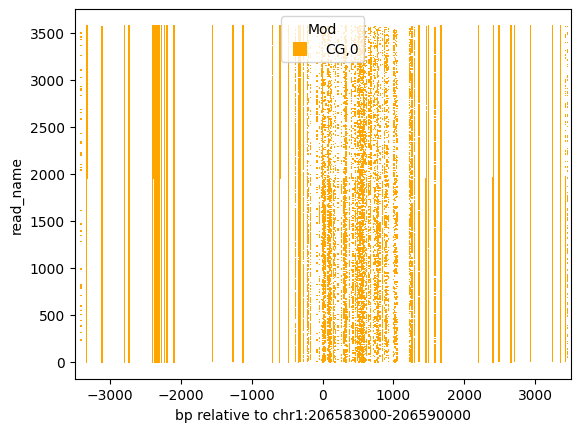

In [4]:
extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

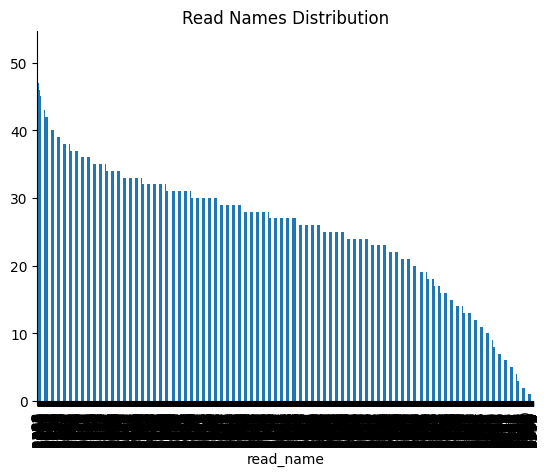

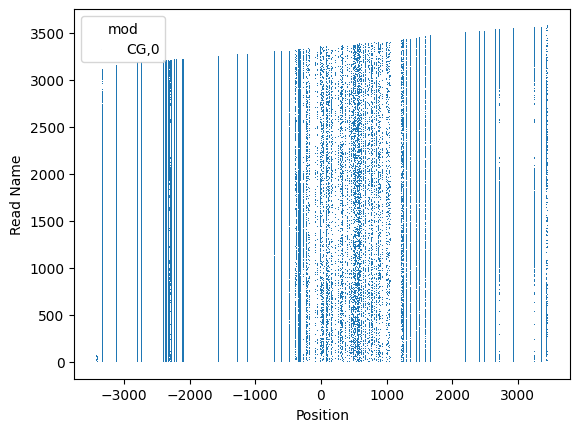

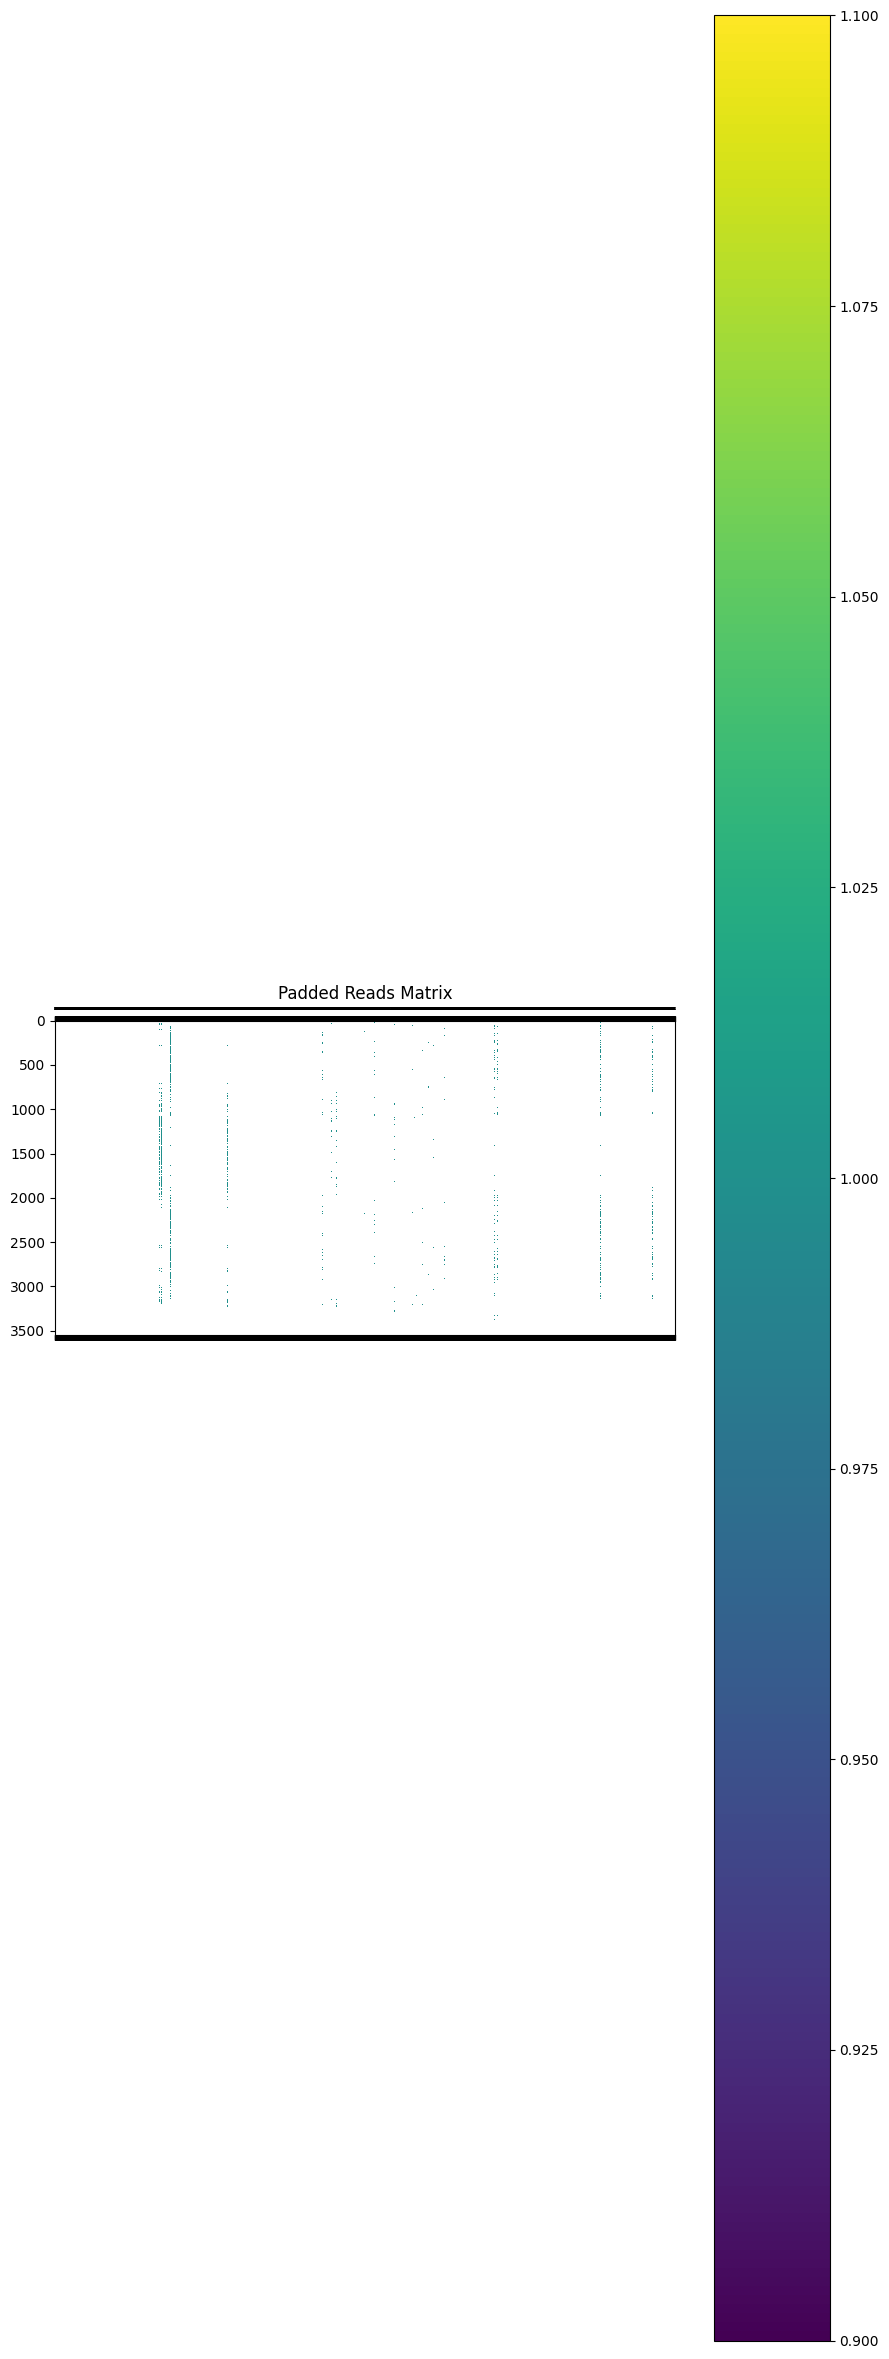

Padded reads saved to padded_reads_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy


In [5]:
keep_unmethylated_reads = False

if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# if extract_file:
#     reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
#     visualize_data(reads_df)

#     padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
#     if padded_reads is not None:
#         plot_padded_reads(padded_reads, ref_seq_list)
#         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

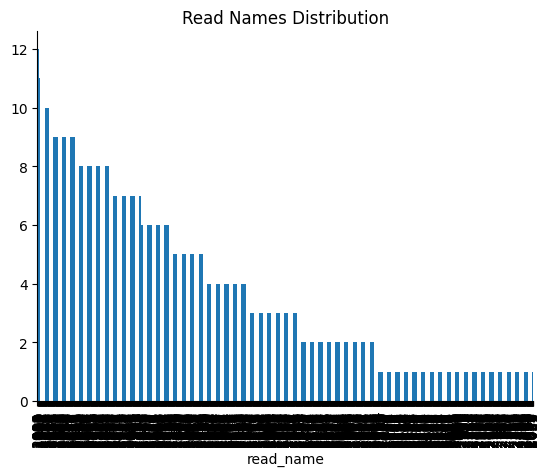

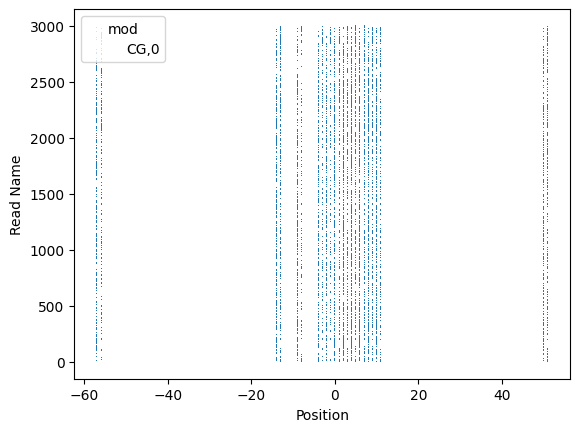

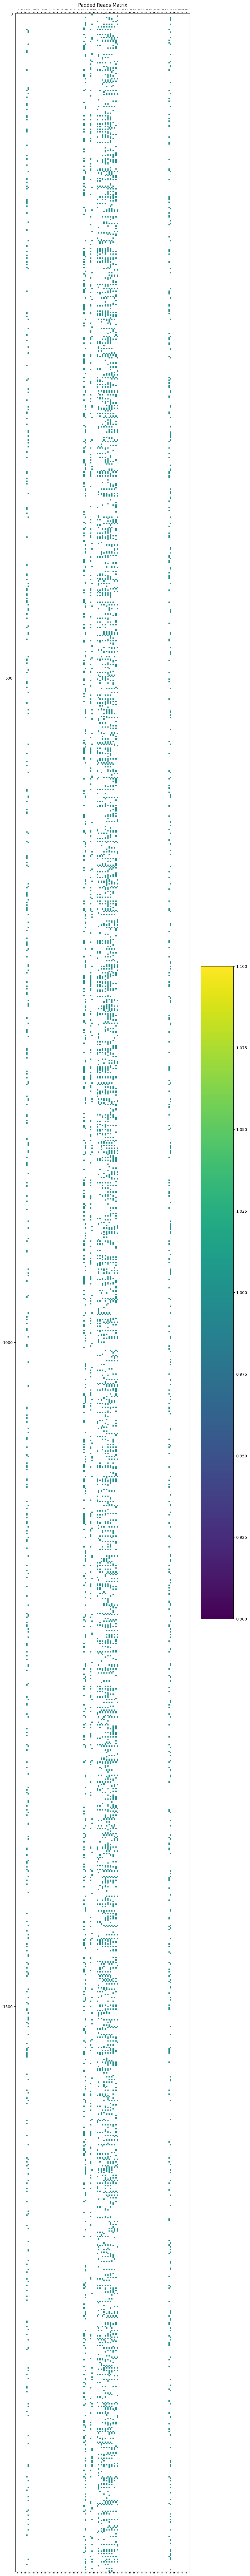

Padded reads saved to padded_reads_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-18.npy


In [ ]:
# keep_unmethylated_reads = False

# if extract_file:
#     if keep_unmethylated_reads:
#         reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
#         visualize_data(reads_df)

#         padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
#     else:
#         reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
#         visualize_data(reads_df)
#         padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
#     if padded_reads is not None:
#         plot_padded_reads(padded_reads, ref_seq_list)
#         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# # if extract_file:
# #     reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
# #     visualize_data(reads_df)

# #     padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
# #     if padded_reads is not None:
# #         plot_padded_reads(padded_reads, ref_seq_list)
# #         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

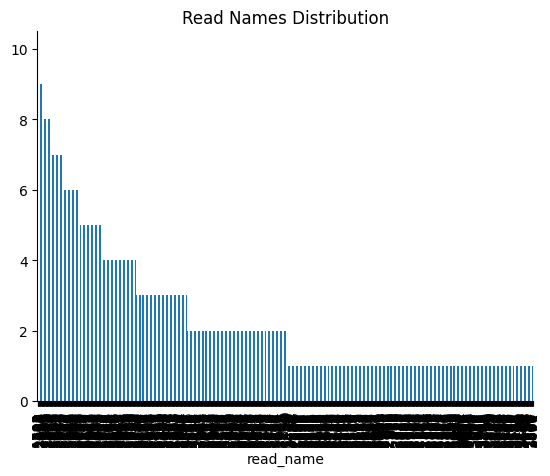

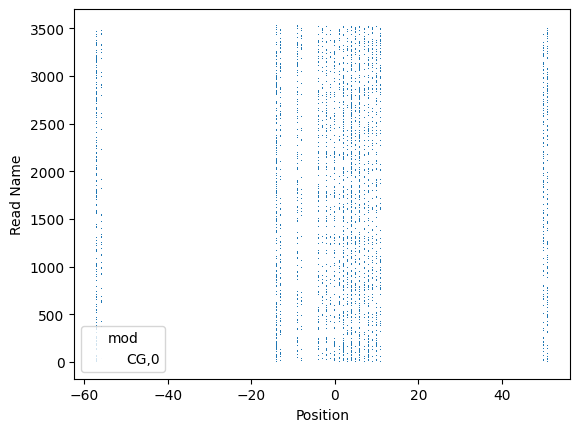

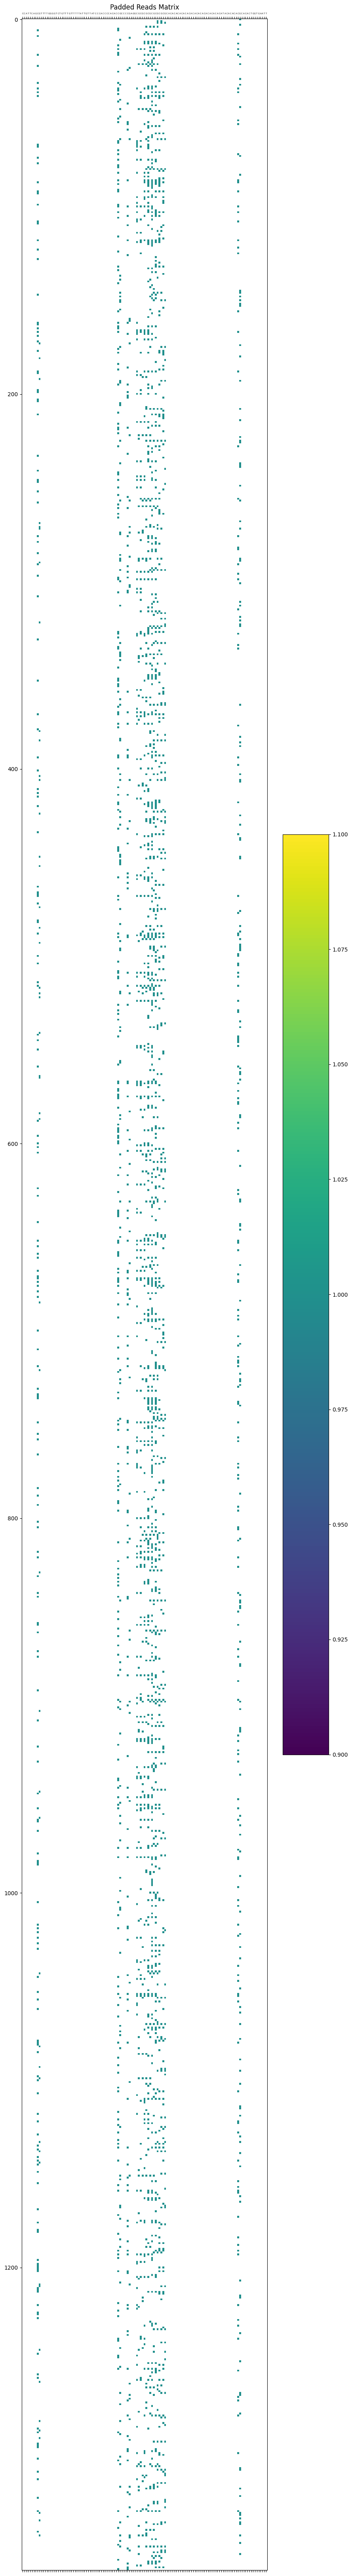

Padded reads saved to padded_reads_K562_ZFPOFFpostSort_LOW70_Thr0.7_NoFullyUnmethylated_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy


In [ ]:
# keep_unmethylated_reads = False

# if extract_file:
#     if keep_unmethylated_reads:
#         reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
#         visualize_data(reads_df)

#         padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
#     else:
#         reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
#         visualize_data(reads_df)
#         padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
#     if padded_reads is not None:
#         plot_padded_reads(padded_reads, ref_seq_list)
#         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# # if extract_file:
# #     reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
# #     visualize_data(reads_df)

# #     padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
# #     if padded_reads is not None:
# #         plot_padded_reads(padded_reads, ref_seq_list)
# #         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

Padded reads loaded successfully.


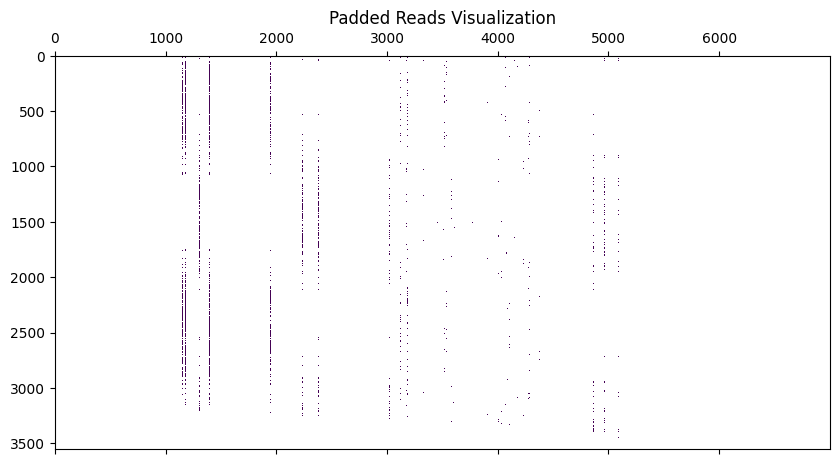

Visualization completed.
Region length: 7000
GCCATTGCCTCAATTCAGTTCTCCATACTCTCCCTAAACTAAACTCCTTACTATTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCATCTCTTTTCCTATTTTTGCCCTATTGCATTGACACTTGTCATATTTAGTTGAATCACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCCTTCTTTCCTTTCTGAAGCCCCATACCACTTTGGTTGTGATATTTGTATAGCATTTATCATGGAAAACCTCCCTACTAGATTGTAGATTCTCAAACACAAGTATTGACACTTAGTGGGTTTCTGTATACTAGGGAAGTTTATTAAACAGTCTTTGATTTAGTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATAT

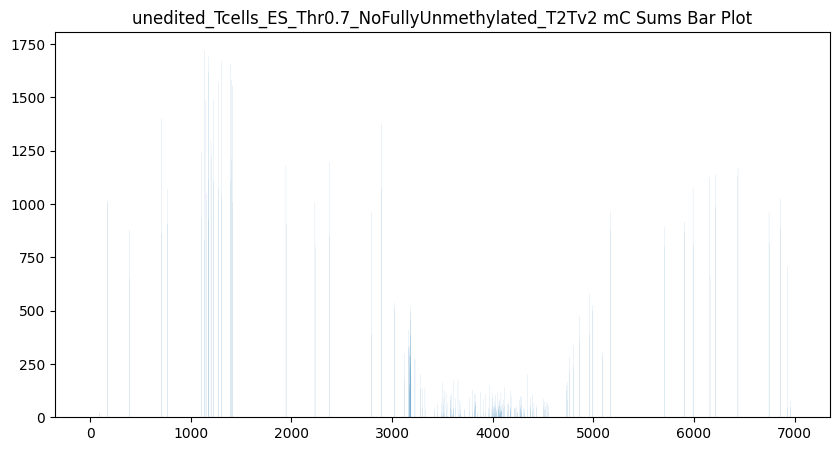

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


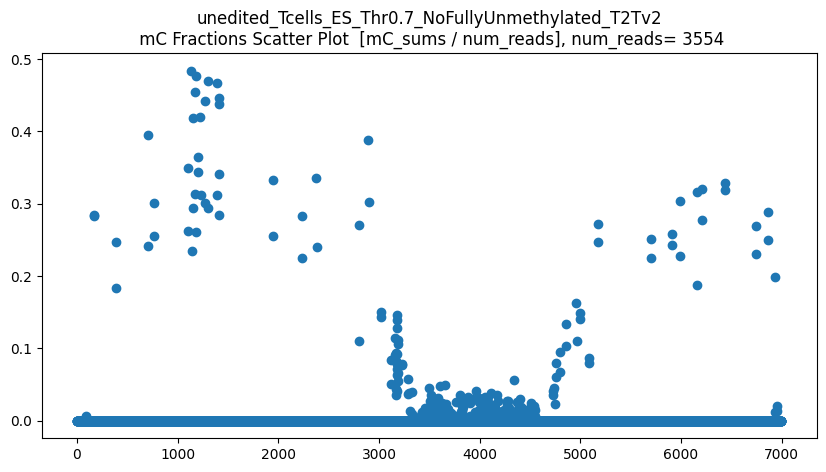

CGs_all_sums  = [  41. 2019. 1529. 2263. 1975. 2174. 2551. 2536. 2730. 2619. 2519. 2601.
 2639. 2715. 2766. 2793. 2565. 2087. 1806. 2046. 1354. 2455. 1046.  480.
  730.  458.  452.  431.  555.  711.  803.  773.  631.  572.  550.  336.
  184.  174.   72.   85.   85.  184.  110.   67.  149.  150.   73.  150.
  109.  149.   26.  212.   65.  133.  199.   92.   25.   92.   70.  116.
  152.  153.   79.  128.  177.   34.  128.  107.  126.   62.  182.   48.
  136.  145.   76.   47.   88.   89.  128.  105.   55.   57.  151.   89.
   90.   82.   63.  105.   68.   62.  140.   80.   65.   94.  126.  191.
   90.  121.  172.   77.  121.   86.   82.   75.   43.  103.   94.  139.
  130.   84.   59.   62.  234.  118.  103.  139.  109.   98.  139.  108.
   89.  134.   79.  276.  245.  497.  576.  845.  970. 1030.  591. 1843.
 1693. 1783. 1888. 1792. 2126. 2300. 1777. 1911.  750.  121.]


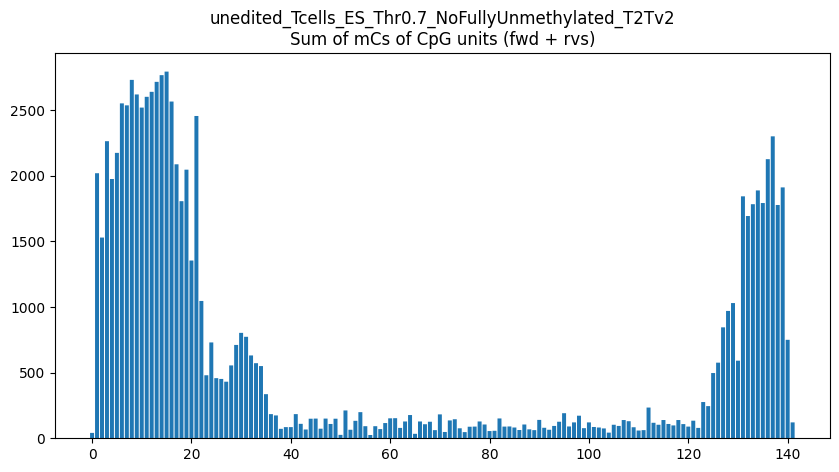

CGs_all_sums / len(CGs_all) = [0.0115363  0.56809229 0.43021947 0.63674733 0.55571187 0.61170512
 0.71778278 0.71356218 0.76814856 0.73691615 0.70877884 0.73185144
 0.74254361 0.76392797 0.778278   0.78587507 0.721722   0.58722566
 0.50815982 0.57568936 0.38097918 0.69077096 0.29431626 0.13505909
 0.20540236 0.12886888 0.12718064 0.12127181 0.15616207 0.20005627
 0.2259426  0.21750141 0.17754643 0.16094541 0.15475521 0.09454136
 0.05177265 0.04895892 0.02025886 0.02391671 0.02391671 0.05177265
 0.03095104 0.018852   0.04192459 0.04220597 0.02054024 0.04220597
 0.03066967 0.04192459 0.0073157  0.0596511  0.01828925 0.03742262
 0.05599325 0.02588633 0.00703433 0.02588633 0.01969612 0.03263928
 0.04276871 0.04305008 0.02222847 0.03601576 0.04980304 0.00956669
 0.03601576 0.03010692 0.03545301 0.01744513 0.0512099  0.01350591
 0.03826674 0.0407991  0.02138436 0.01322454 0.02476083 0.02504221
 0.03601576 0.02954418 0.01547552 0.01603827 0.04248734 0.02504221
 0.02532358 0.02307259 0.0177265

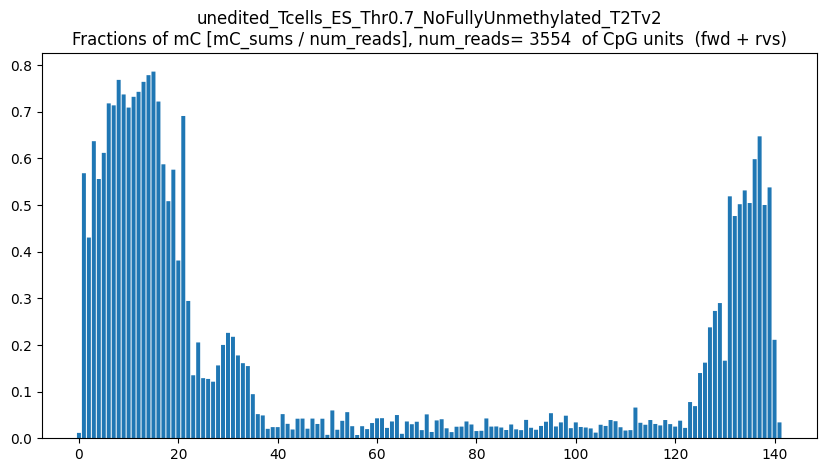

CGs_all_on_fwd_C_sums = [0. 0. 0. ... 0. 0. 0.]


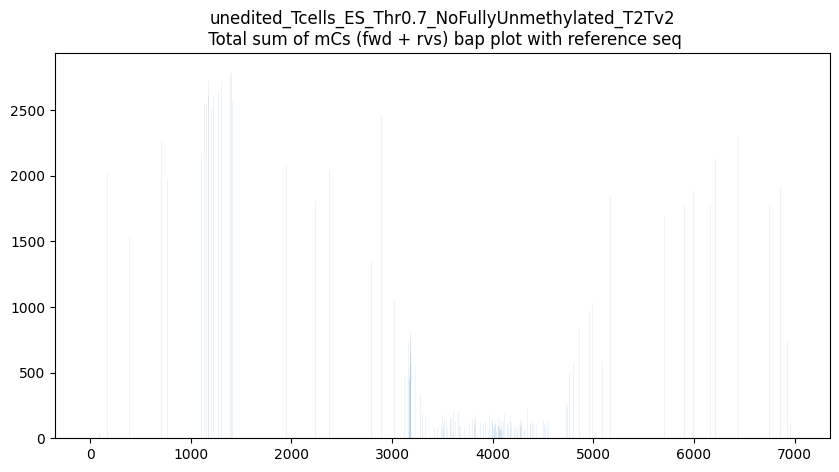

len(CGs_all) = 3554
CGs_all_on_fwd_C_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


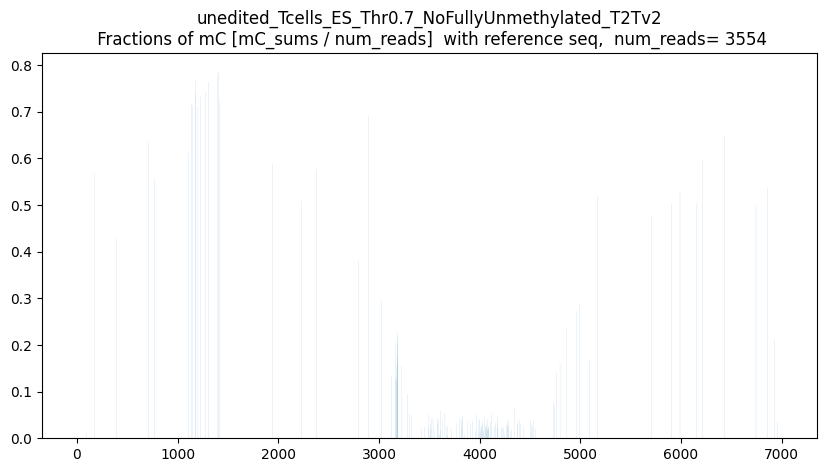

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



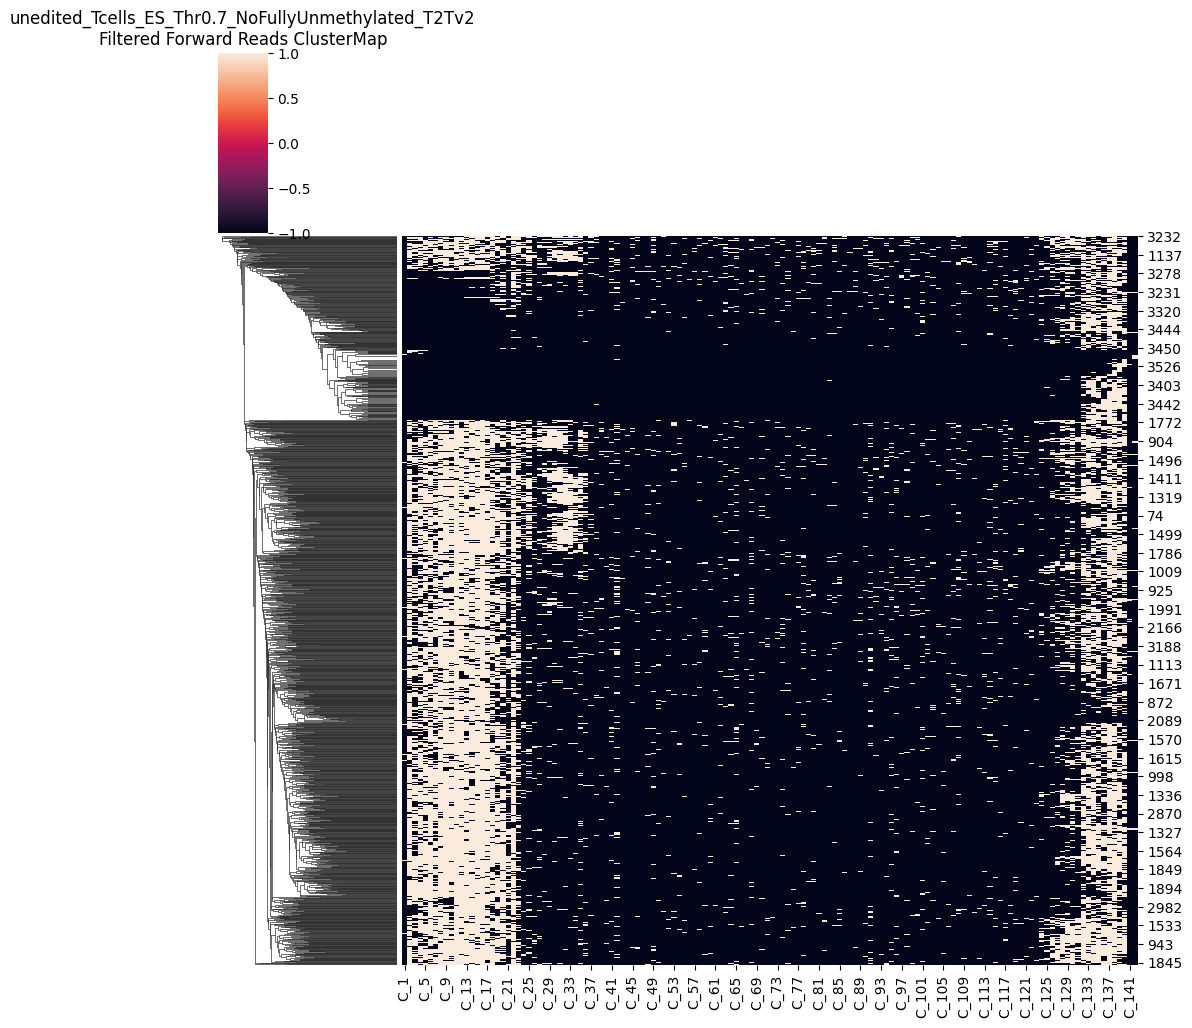

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



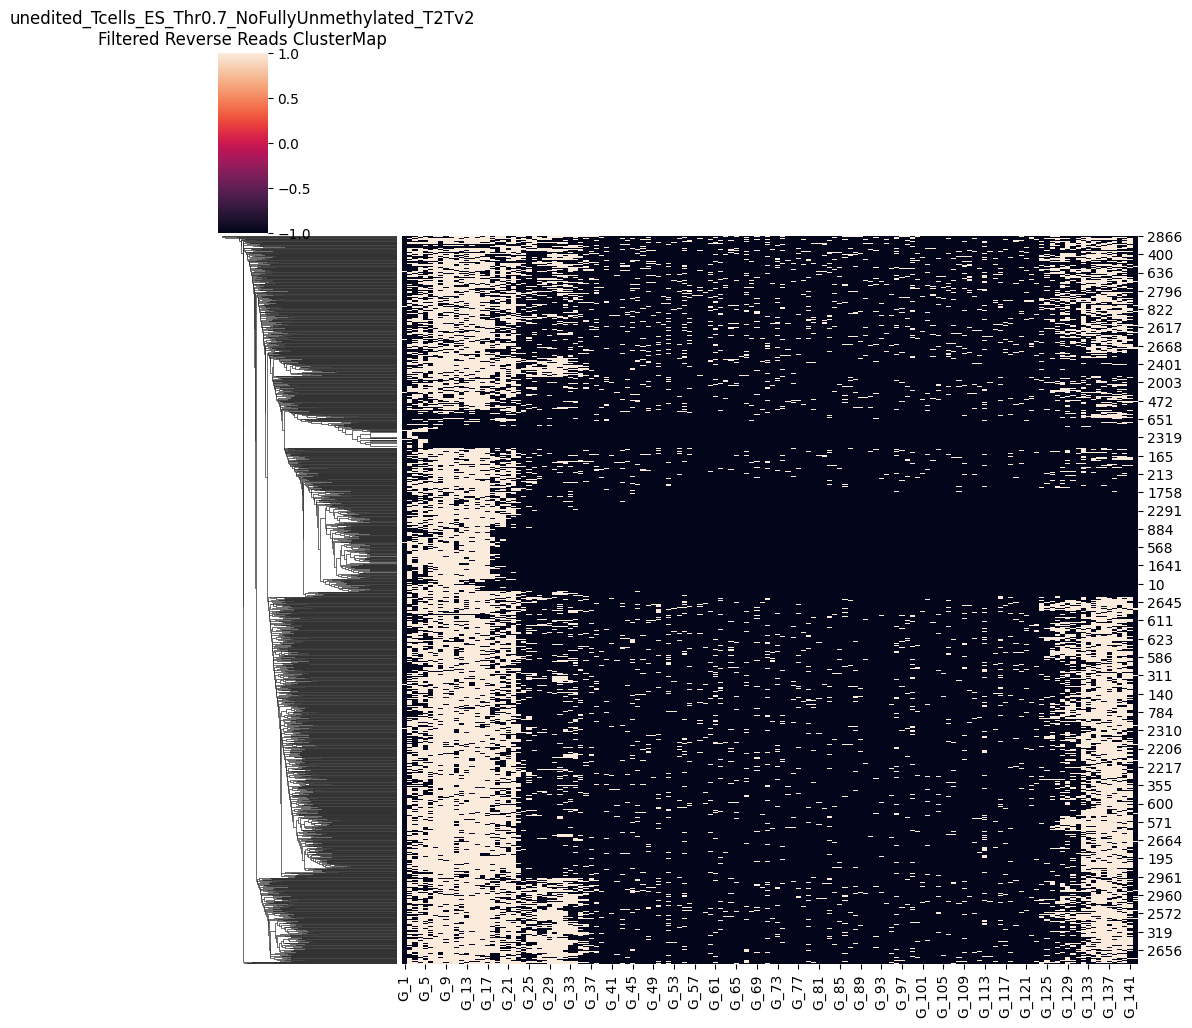

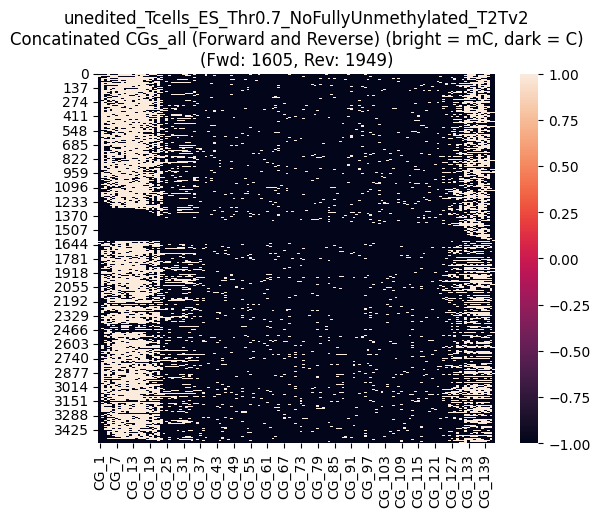

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



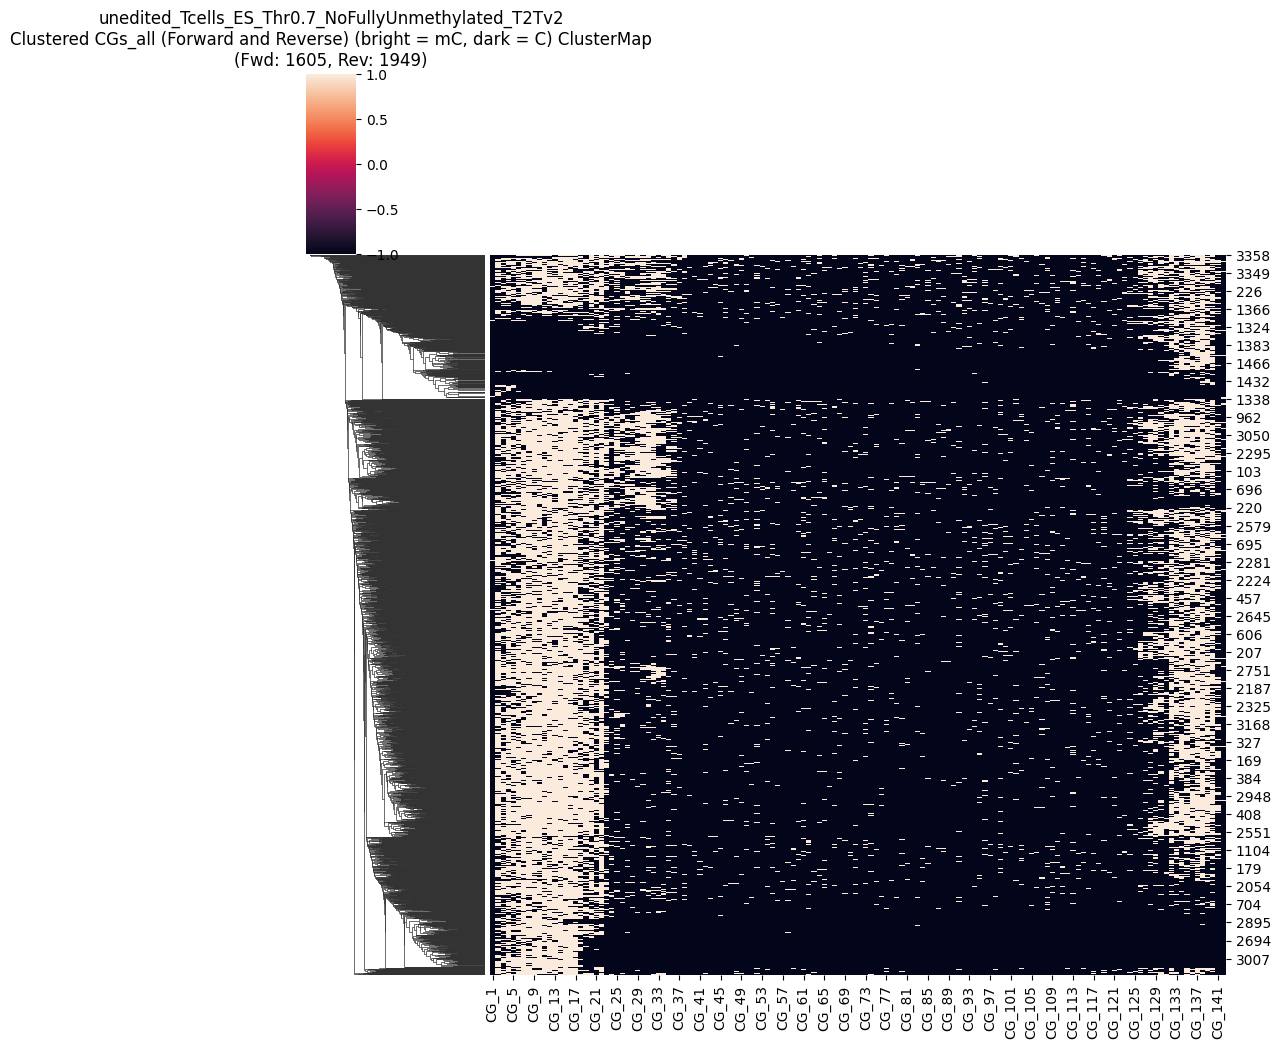

CGs_all saved as CG_142_units_combined_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD1605_numRVS1949_padded_reads_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [6]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [7]:
CG_coordinates

[206583090,
 206583174,
 206583388,
 206583708,
 206583767,
 206584105,
 206584138,
 206584152,
 206584177,
 206584179,
 206584202,
 206584228,
 206584273,
 206584305,
 206584396,
 206584408,
 206584412,
 206584947,
 206585235,
 206585380,
 206585798,
 206585897,
 206586021,
 206586121,
 206586164,
 206586169,
 206586174,
 206586176,
 206586178,
 206586180,
 206586182,
 206586184,
 206586186,
 206586188,
 206586228,
 206586287,
 206586304,
 206586328,
 206586423,
 206586454,
 206586495,
 206586497,
 206586509,
 206586511,
 206586519,
 206586537,
 206586547,
 206586579,
 206586581,
 206586592,
 206586600,
 206586608,
 206586612,
 206586628,
 206586656,
 206586667,
 206586679,
 206586684,
 206586719,
 206586770,
 206586803,
 206586818,
 206586823,
 206586830,
 206586833,
 206586847,
 206586881,
 206586907,
 206586929,
 206586958,
 206586966,
 206586989,
 206586994,
 206586998,
 206587005,
 206587013,
 206587018,
 206587021,
 206587029,
 206587032,
 206587035,
 206587037,
 206587053,
 206

In [9]:
CG_coordinates[68], CG_coordinates[69]

(206586929, 206586958)

Padded reads loaded successfully.


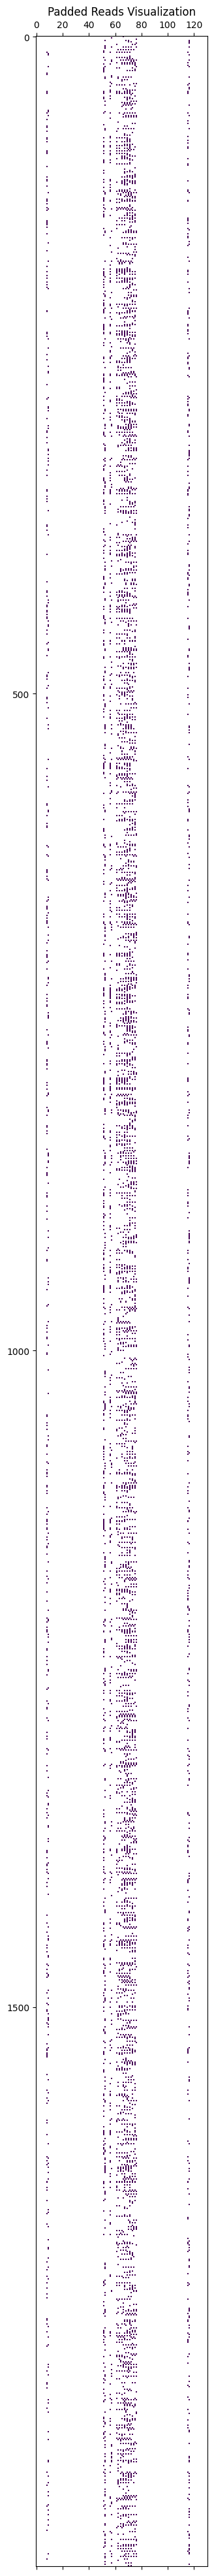

Visualization completed.
Region length: 131
CCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [8, 51, 56, 61, 63, 65, 67, 69, 71, 73, 75, 115]
CG_1 at index 8 has genomic coordinate: chr1:206586120
CG_2 at index 51 has genomic coordinate: chr1:206586163
CG_3 at index 56 has genomic coordinate: chr1:206586168
CG_4 at index 61 has genomic coordinate: chr1:206586173
CG_5 at index 63 has genomic coordinate: chr1:206586175
CG_6 at index 65 has genomic coordinate: chr1:206586177
CG_7 at index 67 has genomic coordinate: chr1:206586179
CG_8 at index 69 has genomic coordinate: chr1:206586181
CG_9 at index 71 has genomic coordinate: chr1:206586183
CG_10 at index 73 has genomic coordinate: chr1:206586185
CG_11 at index 75 has genomic coordinate: chr1:206586187
CG_12 at index 115 has genomic coordinate: chr1:206586227
Forward reads: 11

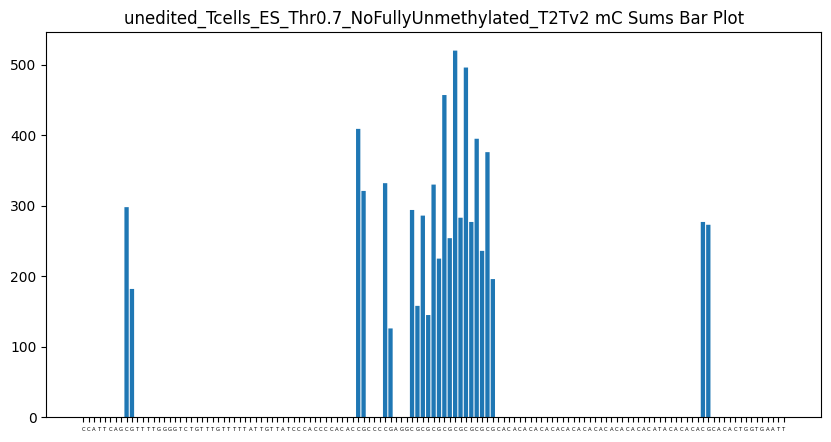

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.15472482 0.09449637 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.21235722 0.16666667 0.
 0.         0.         0.17237799 0.06542056 0.         0.
 0.         0.15264798 0.08203531 0.14849429 0.07528557 0.17133956
 0.11682243 0.23727934 0.13187954 0.26998962 0.14693666 0.25752856
 0.14382139 0.20508827 0.12253375 0.19522326 0.10176532 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.

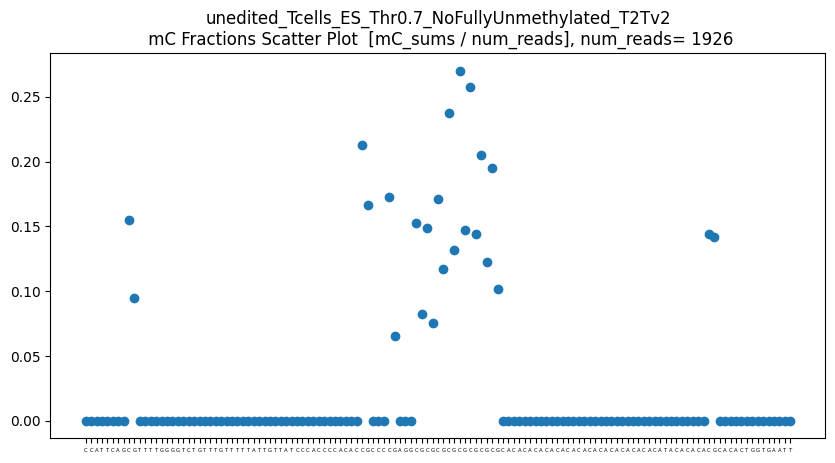

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums  = [480. 730. 458. 452. 431. 555. 711. 803. 773. 631. 572. 550.]


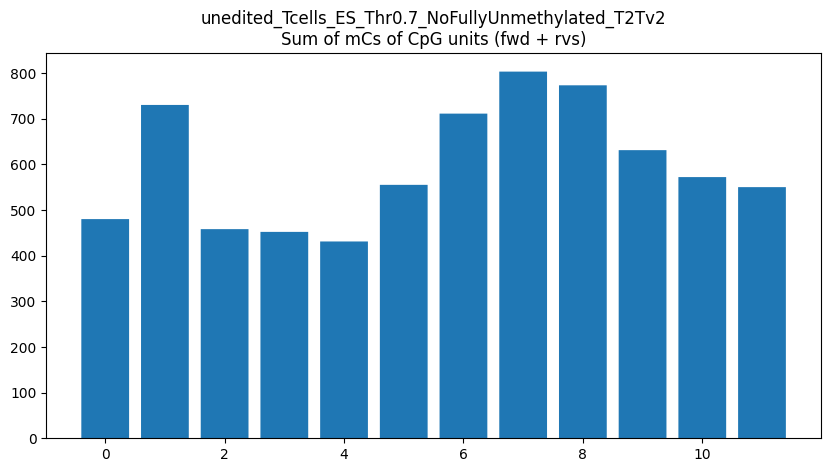

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums / len(CGs_all) = [0.24922118 0.37902388 0.23779855 0.23468328 0.22377985 0.28816199
 0.36915888 0.41692627 0.40134995 0.32762201 0.29698858 0.28556594]


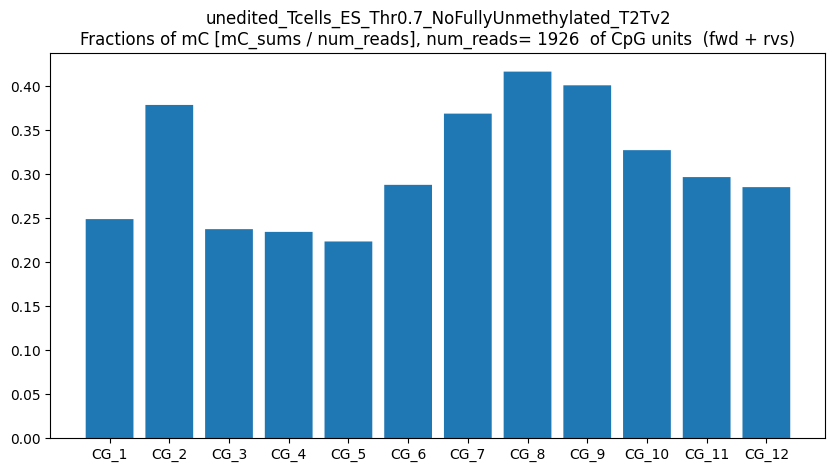

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_on_fwd_C_sums = [  0.   0.   0.   0.   0.   0.   0.   0. 480.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 730.   0.   0.   0.   0.
 458.   0.   0.   0.   0. 452.   0. 431.   0. 555.   0. 711.   0. 803.
   0. 773.   0. 631.   0. 572.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 550.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.]


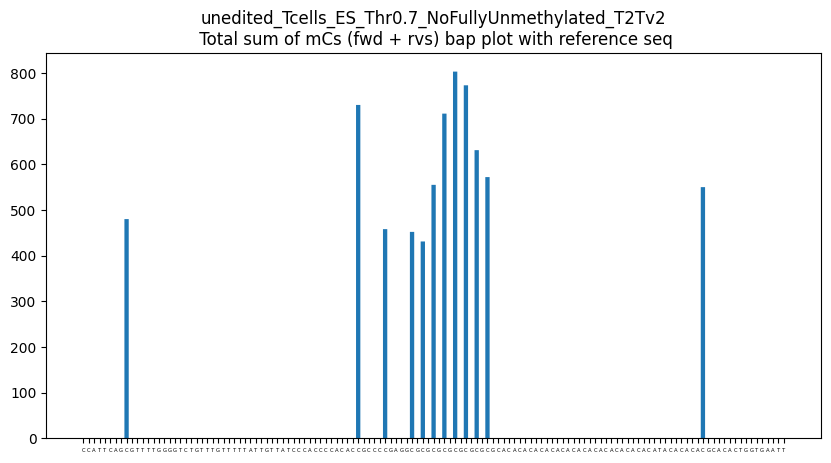

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


len(CGs_all) = 1926
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.24922118 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.37902388 0.         0.
 0.         0.         0.23779855 0.         0.         0.
 0.         0.23468328 0.         0.22377985 0.         0.28816199
 0.         0.36915888 0.         0.41692627 0.         0.40134995
 0.         0.32762201 0.         0.29698858 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

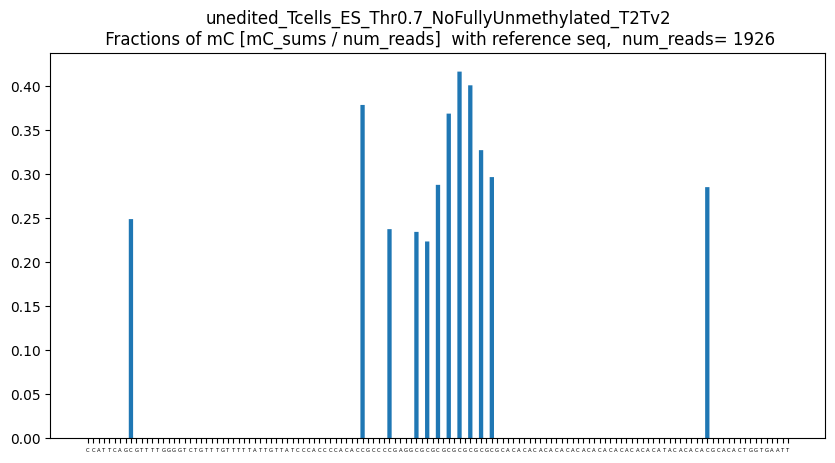

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



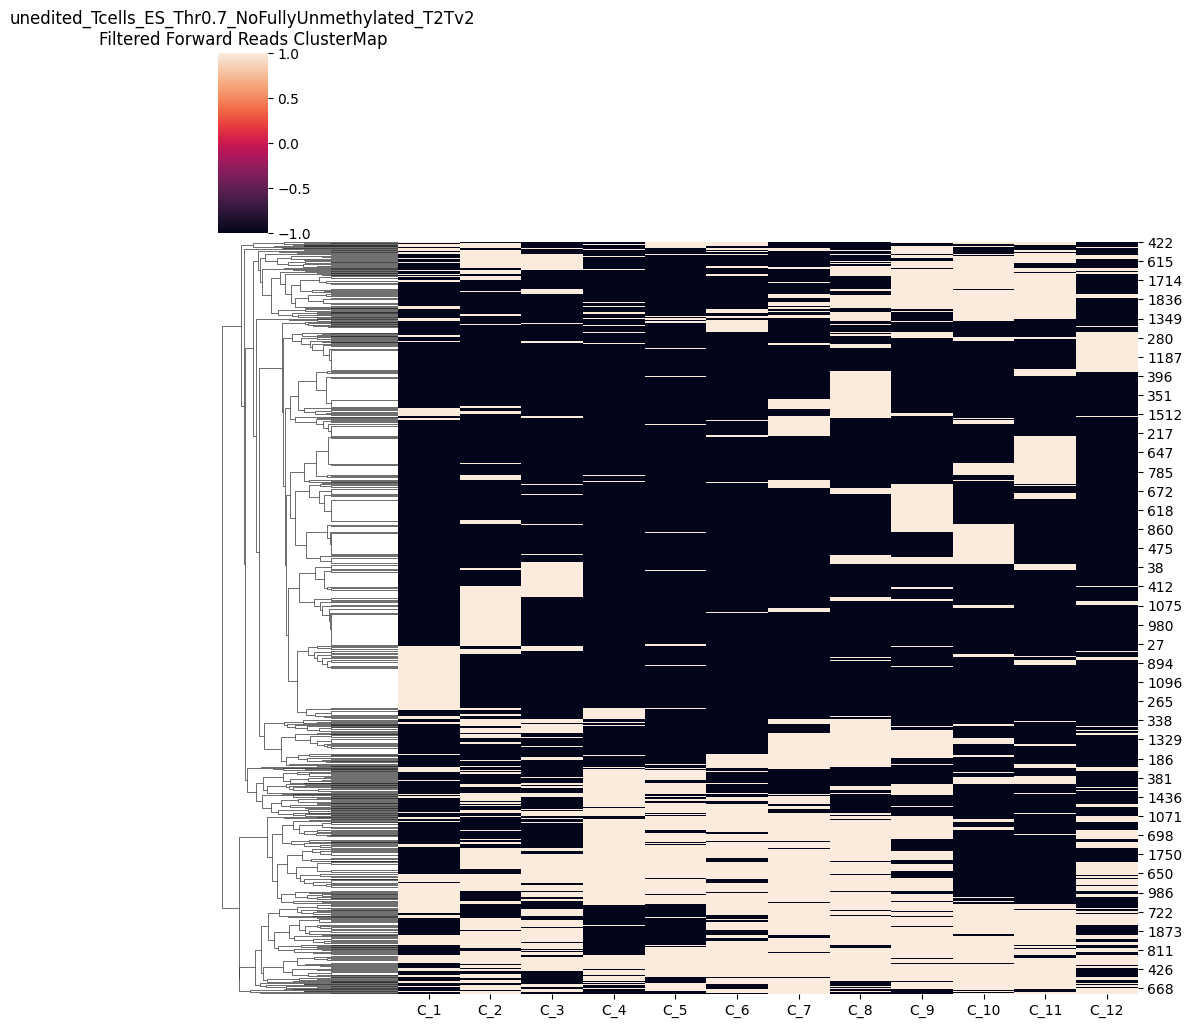

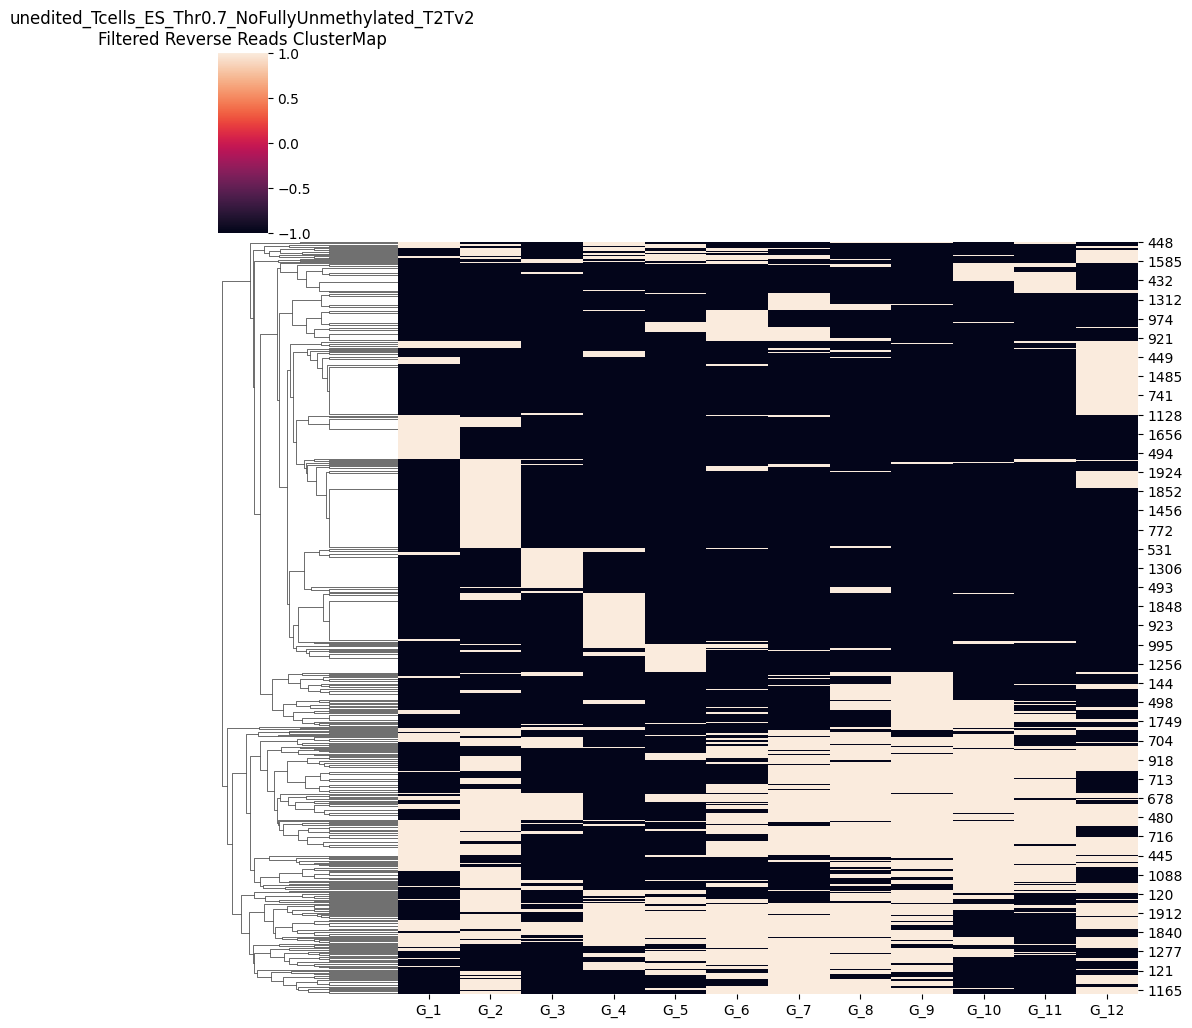

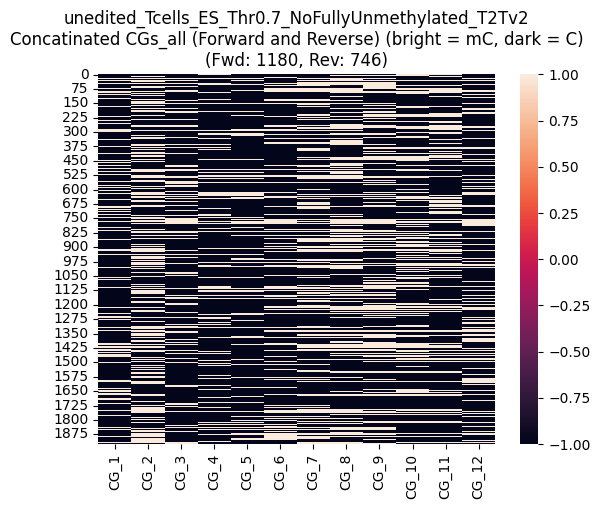

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



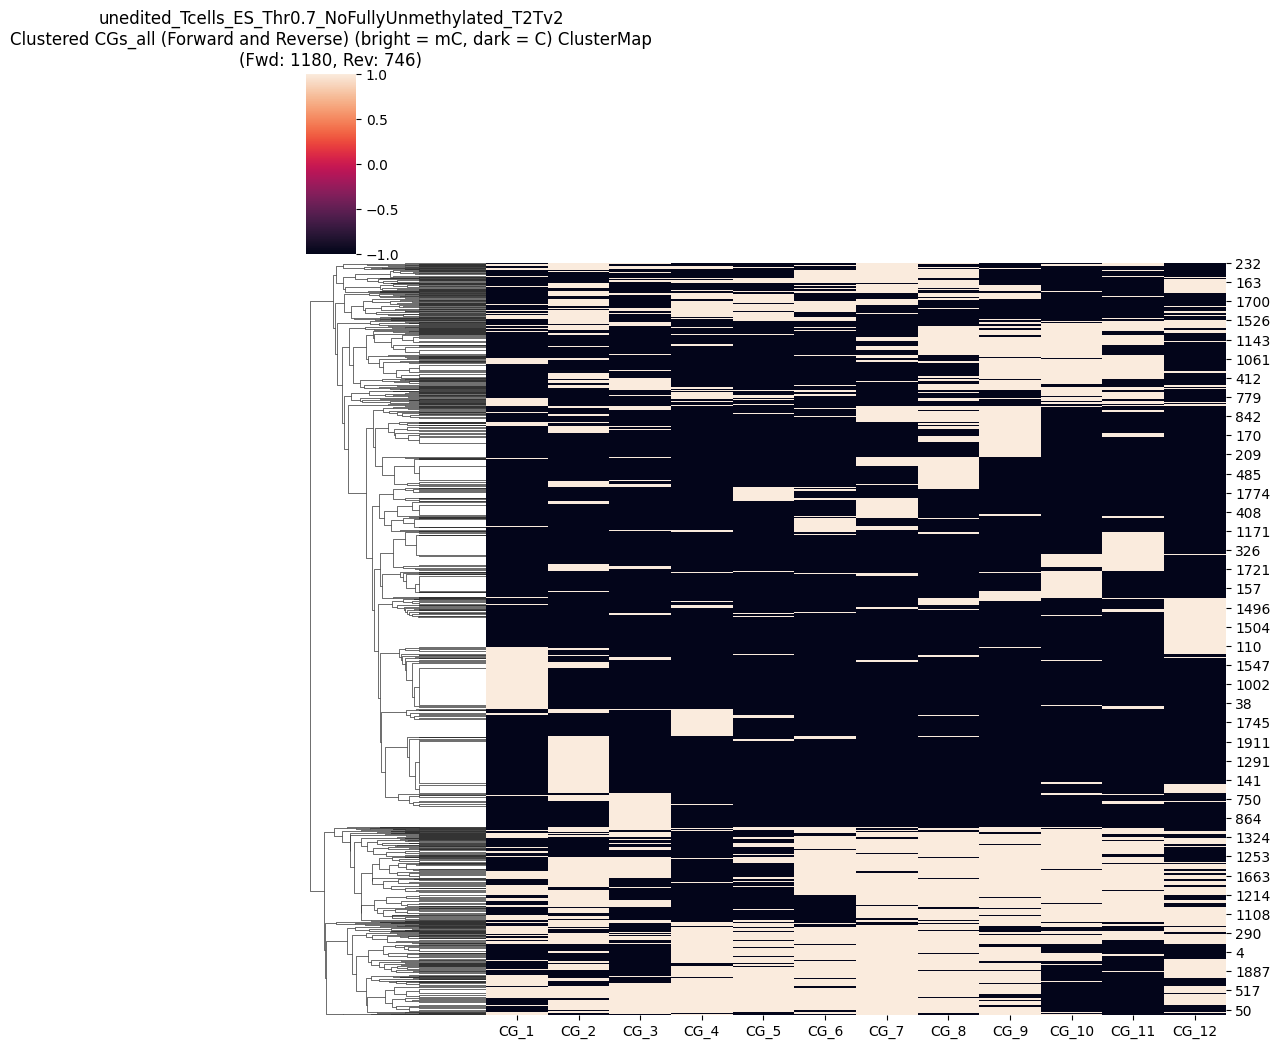

CGs_all saved as CG_12_units_combined_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD1180_numRVS746_padded_reads_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-18.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [ ]:
# """
# Main pipeline for processing and visualizing CpG units on forward and reverse strands 
# """
# try:
#     # Define constants
#     # experiment_name = "unedited_T_primerES_nCATS"
#     # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
#     # save_padded_reads_name_np = "padded_reads.npy"
#     # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
#     # region_chr = "chr1"
#     # region_start = 206586162
#     # region_end = 206586192

#     # Process pipeline
#     CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates = analize_forward_reverse_CGs_pipeline(
#         experiment_name=experiment_name, save_folder_path=output_dir, 
#         save_padded_reads_name_np=save_padded_reads_name_np, 
#         ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
#     )

#     print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
#     # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

# except Exception as e:
#     print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


In [7]:
ref_seq_list

['A',
 'C',
 'C',
 'A',
 'T',
 'T',
 'C',
 'A',
 'G',
 'C',
 'G',
 'T',
 'T',
 'T',
 'T',
 'G',
 'G',
 'G',
 'G',
 'T',
 'C',
 'T',
 'G',
 'T',
 'T',
 'T',
 'G',
 'T',
 'T',
 'T',
 'T',
 'T',
 'A',
 'T',
 'T',
 'G',
 'T',
 'T',
 'A',
 'T',
 'C',
 'C',
 'C',
 'A',
 'C',
 'C',
 'C',
 'C',
 'A',
 'C',
 'A',
 'C',
 'C',
 'G',
 'C',
 'C',
 'C',
 'C',
 'G',
 'A',
 'G',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'G',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'T',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'A',
 'C',
 'G',
 'C',
 'A',
 'C',
 'A',
 'C',
 'T',
 'G',
 'G',
 'T',
 'G',
 'A',
 'A',
 'T']

In [10]:
CG_pair_idx

[90,
 174,
 388,
 708,
 767,
 1105,
 1138,
 1152,
 1177,
 1179,
 1202,
 1228,
 1273,
 1305,
 1396,
 1408,
 1412,
 1947,
 2235,
 2380,
 2798,
 2897,
 3021,
 3121,
 3164,
 3169,
 3174,
 3176,
 3178,
 3180,
 3182,
 3184,
 3186,
 3188,
 3228,
 3287,
 3304,
 3328,
 3423,
 3454,
 3495,
 3497,
 3509,
 3511,
 3519,
 3537,
 3547,
 3579,
 3581,
 3592,
 3600,
 3608,
 3612,
 3628,
 3656,
 3667,
 3679,
 3684,
 3719,
 3770,
 3803,
 3818,
 3823,
 3830,
 3833,
 3847,
 3881,
 3907,
 3929,
 3958,
 3966,
 3989,
 3994,
 3998,
 4005,
 4013,
 4018,
 4021,
 4029,
 4032,
 4035,
 4037,
 4053,
 4056,
 4058,
 4067,
 4070,
 4072,
 4074,
 4078,
 4082,
 4088,
 4090,
 4093,
 4106,
 4119,
 4150,
 4154,
 4175,
 4178,
 4182,
 4217,
 4231,
 4242,
 4245,
 4271,
 4273,
 4277,
 4286,
 4289,
 4311,
 4314,
 4345,
 4374,
 4377,
 4398,
 4410,
 4434,
 4506,
 4513,
 4526,
 4540,
 4553,
 4731,
 4745,
 4762,
 4799,
 4863,
 4963,
 4996,
 5089,
 5174,
 5705,
 5909,
 5991,
 6159,
 6213,
 6437,
 6746,
 6862,
 6931,
 6956]

In [11]:
region_start

206583000

In [12]:
9 + region_start

206583009

In [13]:
CG_coordinates

[206583090,
 206583174,
 206583388,
 206583708,
 206583767,
 206584105,
 206584138,
 206584152,
 206584177,
 206584179,
 206584202,
 206584228,
 206584273,
 206584305,
 206584396,
 206584408,
 206584412,
 206584947,
 206585235,
 206585380,
 206585798,
 206585897,
 206586021,
 206586121,
 206586164,
 206586169,
 206586174,
 206586176,
 206586178,
 206586180,
 206586182,
 206586184,
 206586186,
 206586188,
 206586228,
 206586287,
 206586304,
 206586328,
 206586423,
 206586454,
 206586495,
 206586497,
 206586509,
 206586511,
 206586519,
 206586537,
 206586547,
 206586579,
 206586581,
 206586592,
 206586600,
 206586608,
 206586612,
 206586628,
 206586656,
 206586667,
 206586679,
 206586684,
 206586719,
 206586770,
 206586803,
 206586818,
 206586823,
 206586830,
 206586833,
 206586847,
 206586881,
 206586907,
 206586929,
 206586958,
 206586966,
 206586989,
 206586994,
 206586998,
 206587005,
 206587013,
 206587018,
 206587021,
 206587029,
 206587032,
 206587035,
 206587037,
 206587053,
 206

In [14]:
# Calculate the genomic coordinates of the CGs
cg_coordinates = [(region_start + idx) for idx in CG_pair_idx]

# Print the genomic coordinates with CG order number
for order, (idx, coord) in enumerate(zip(CG_pair_idx, cg_coordinates), start=1):
    print(f"CG_{order} at index {idx} has genomic coordinate: {region_chr}:{coord}")

CG_1 at index 90 has genomic coordinate: chr1:206583090
CG_2 at index 174 has genomic coordinate: chr1:206583174
CG_3 at index 388 has genomic coordinate: chr1:206583388
CG_4 at index 708 has genomic coordinate: chr1:206583708
CG_5 at index 767 has genomic coordinate: chr1:206583767
CG_6 at index 1105 has genomic coordinate: chr1:206584105
CG_7 at index 1138 has genomic coordinate: chr1:206584138
CG_8 at index 1152 has genomic coordinate: chr1:206584152
CG_9 at index 1177 has genomic coordinate: chr1:206584177
CG_10 at index 1179 has genomic coordinate: chr1:206584179
CG_11 at index 1202 has genomic coordinate: chr1:206584202
CG_12 at index 1228 has genomic coordinate: chr1:206584228
CG_13 at index 1273 has genomic coordinate: chr1:206584273
CG_14 at index 1305 has genomic coordinate: chr1:206584305
CG_15 at index 1396 has genomic coordinate: chr1:206584396
CG_16 at index 1408 has genomic coordinate: chr1:206584408
CG_17 at index 1412 has genomic coordinate: chr1:206584412
CG_18 at ind

In [16]:
cg_coordinates[22 - 1], cg_coordinates[23 - 1]

(206585897, 206586021)

In [ ]:
#206586929, 206586958)

Padded reads loaded successfully.


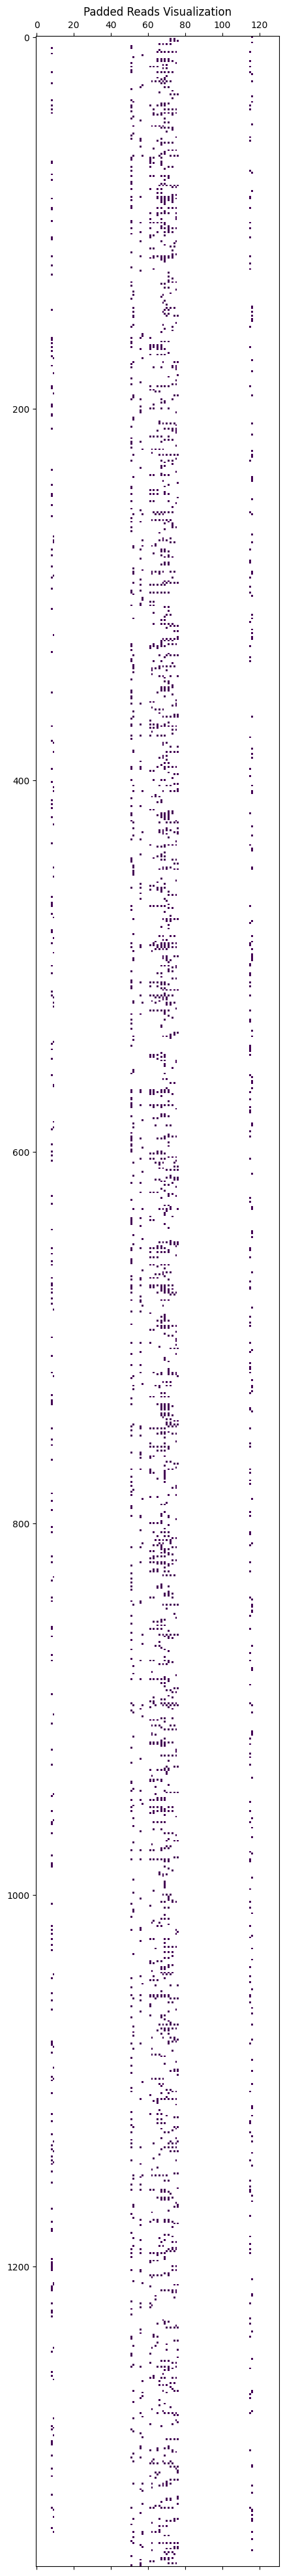

Visualization completed.
Region length: 131
CCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [8, 51, 56, 61, 63, 65, 67, 69, 71, 73, 75, 115]
Forward reads: 903
Reverse reads: 459
DataFrame shape: (1362, 131)
         C    C    A    T    T    C    A    G      C     G  ...    C    T  \
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  192.0  49.0  ...  0.0  0.0   
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    0.0   0.0  ...  NaN  NaN   
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
max    Na

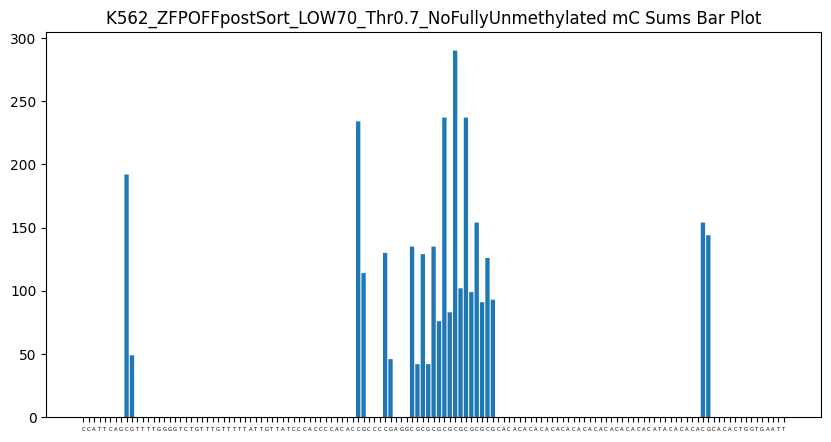

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.14096916 0.03597651 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.17180617 0.08370044 0.
 0.         0.         0.09544787 0.03377386 0.         0.
 0.         0.09911894 0.030837   0.09471366 0.030837   0.09911894
 0.05580029 0.17400881 0.06093979 0.21292217 0.07488987 0.17400881
 0.07268722 0.11306902 0.06681351 0.09251101 0.06828194 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.

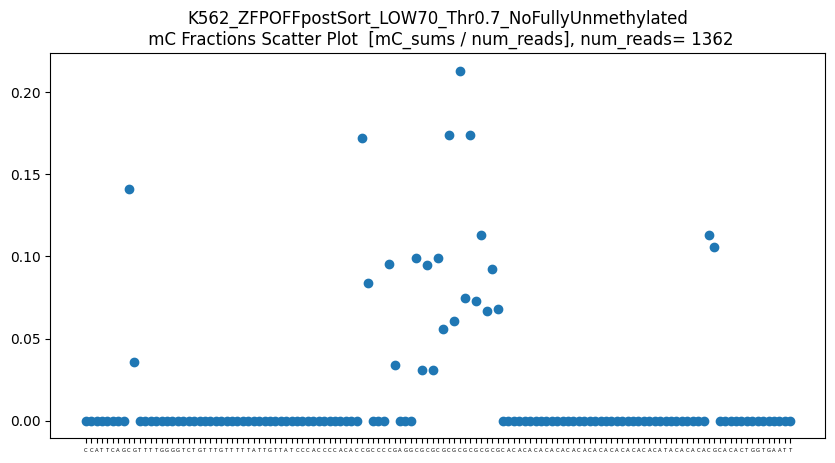

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums  = [241. 348. 176. 177. 171. 211. 320. 392. 336. 245. 219. 298.]


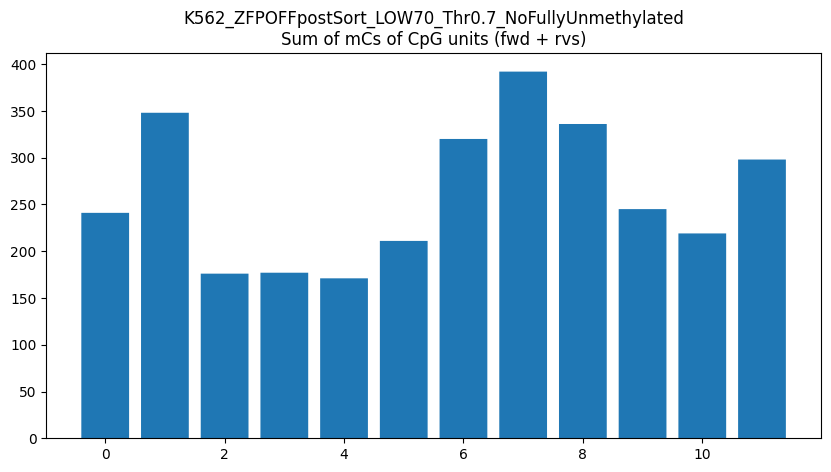

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums / len(CGs_all) = [0.17694567 0.25550661 0.12922173 0.12995595 0.12555066 0.15491924
 0.2349486  0.28781204 0.24669604 0.17988253 0.16079295 0.21879589]


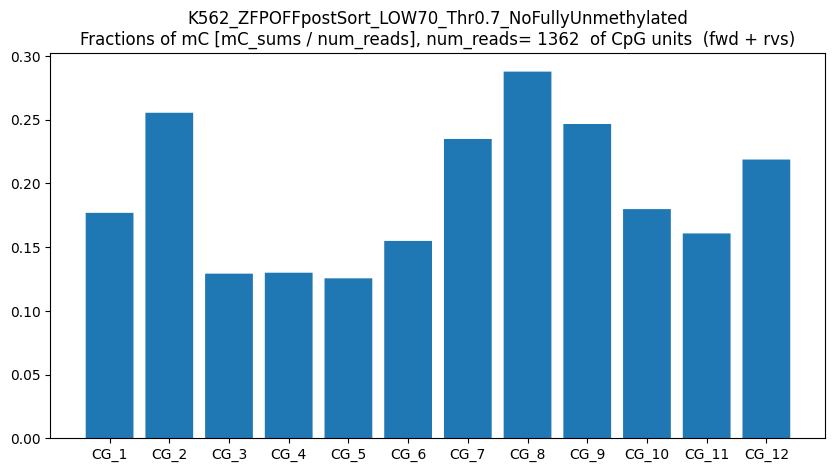

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_on_fwd_C_sums = [  0.   0.   0.   0.   0.   0.   0.   0. 241.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 348.   0.   0.   0.   0.
 176.   0.   0.   0.   0. 177.   0. 171.   0. 211.   0. 320.   0. 392.
   0. 336.   0. 245.   0. 219.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 298.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.]


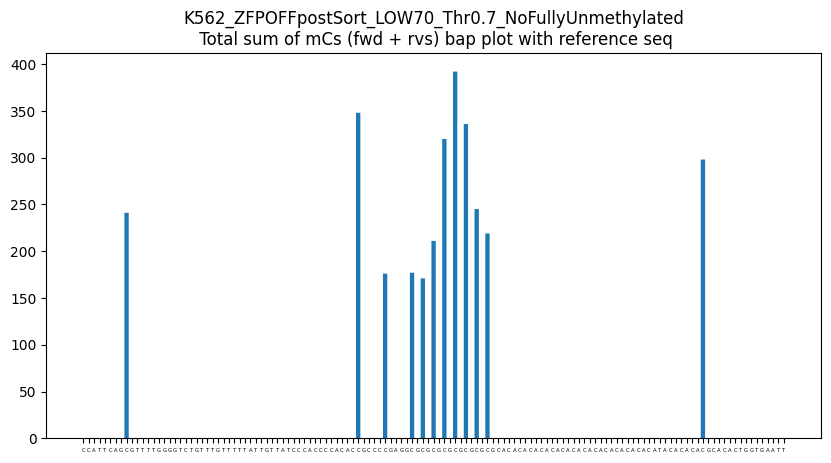

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


len(CGs_all) = 1362
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.17694567 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.25550661 0.         0.
 0.         0.         0.12922173 0.         0.         0.
 0.         0.12995595 0.         0.12555066 0.         0.15491924
 0.         0.2349486  0.         0.28781204 0.         0.24669604
 0.         0.17988253 0.         0.16079295 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

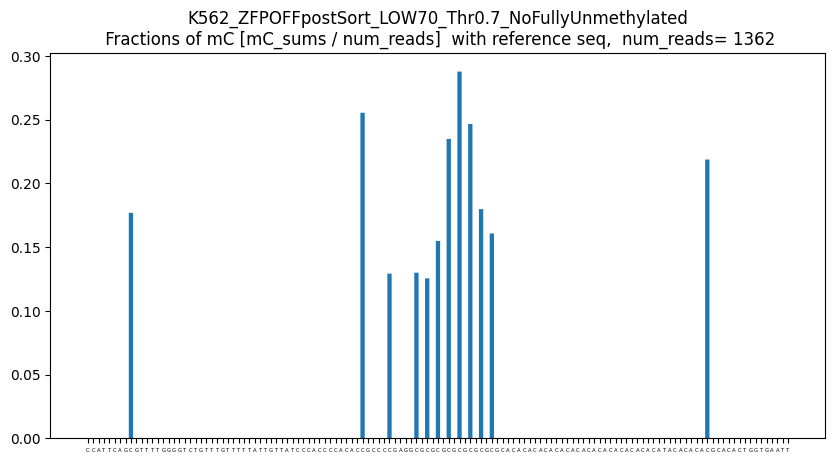

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



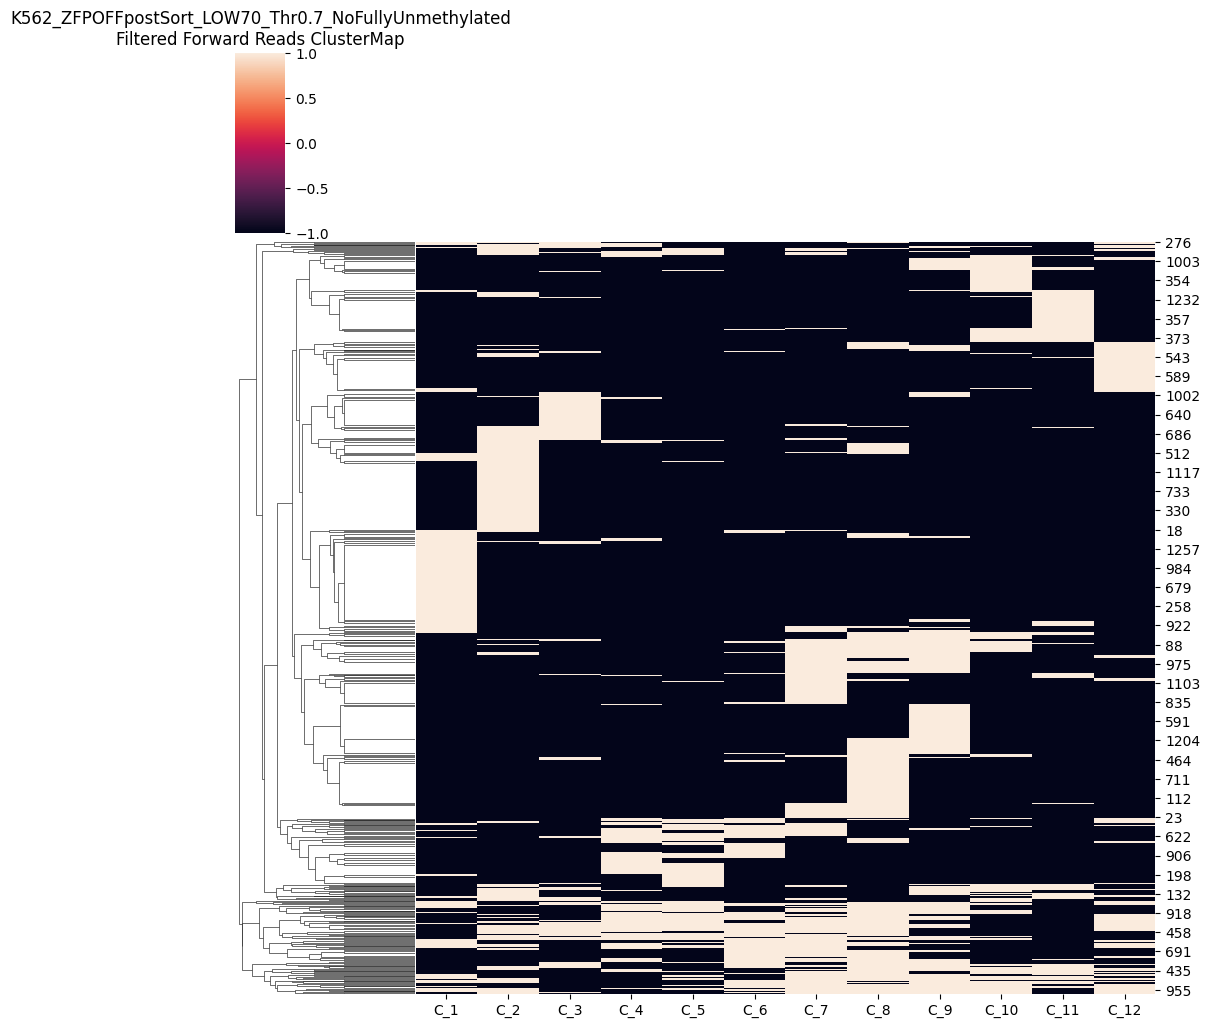

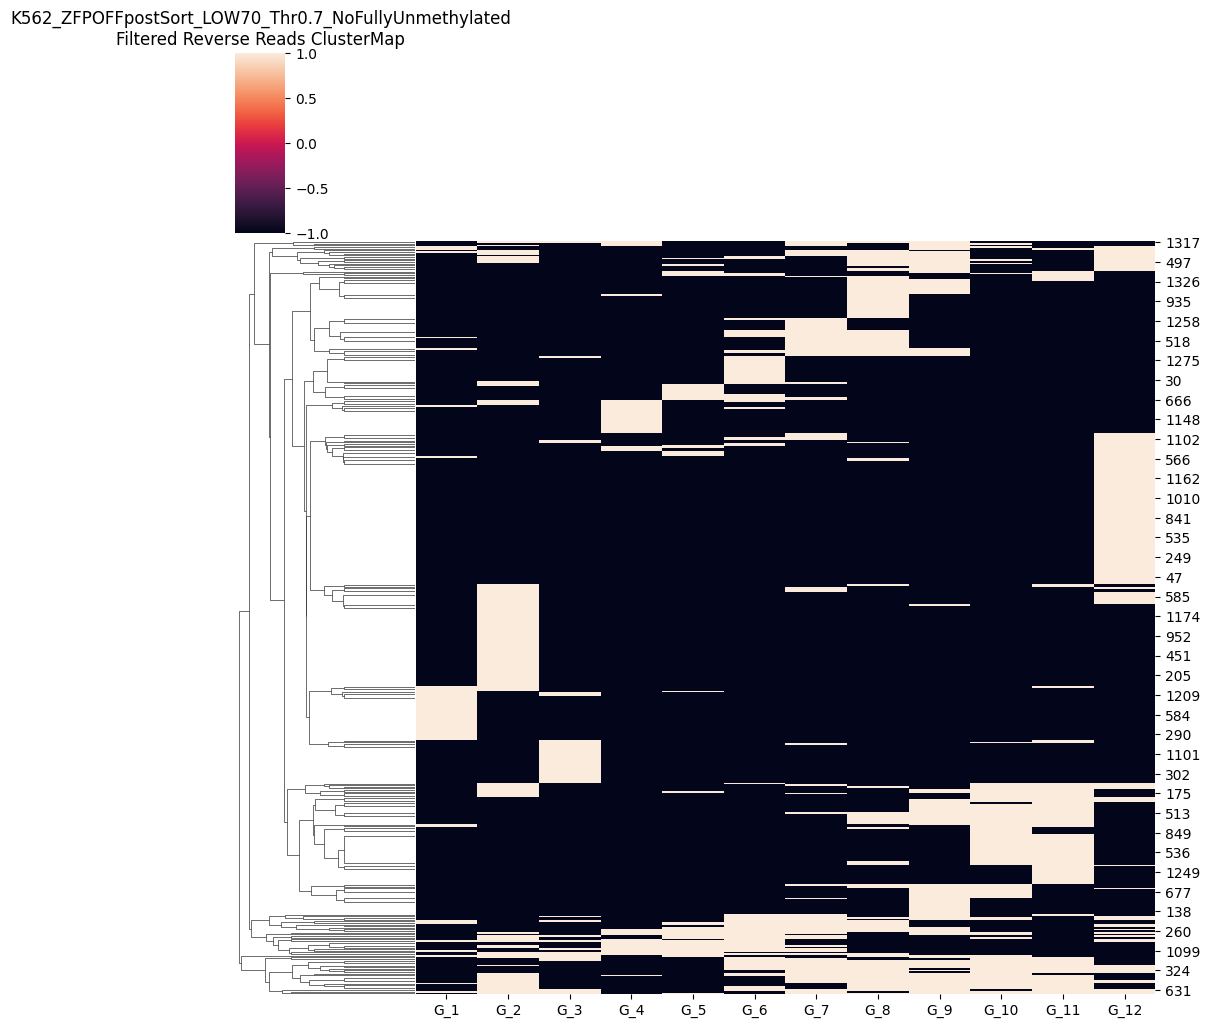

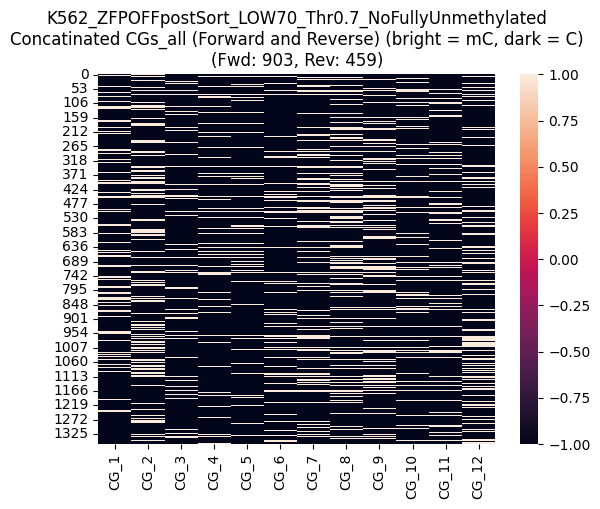

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



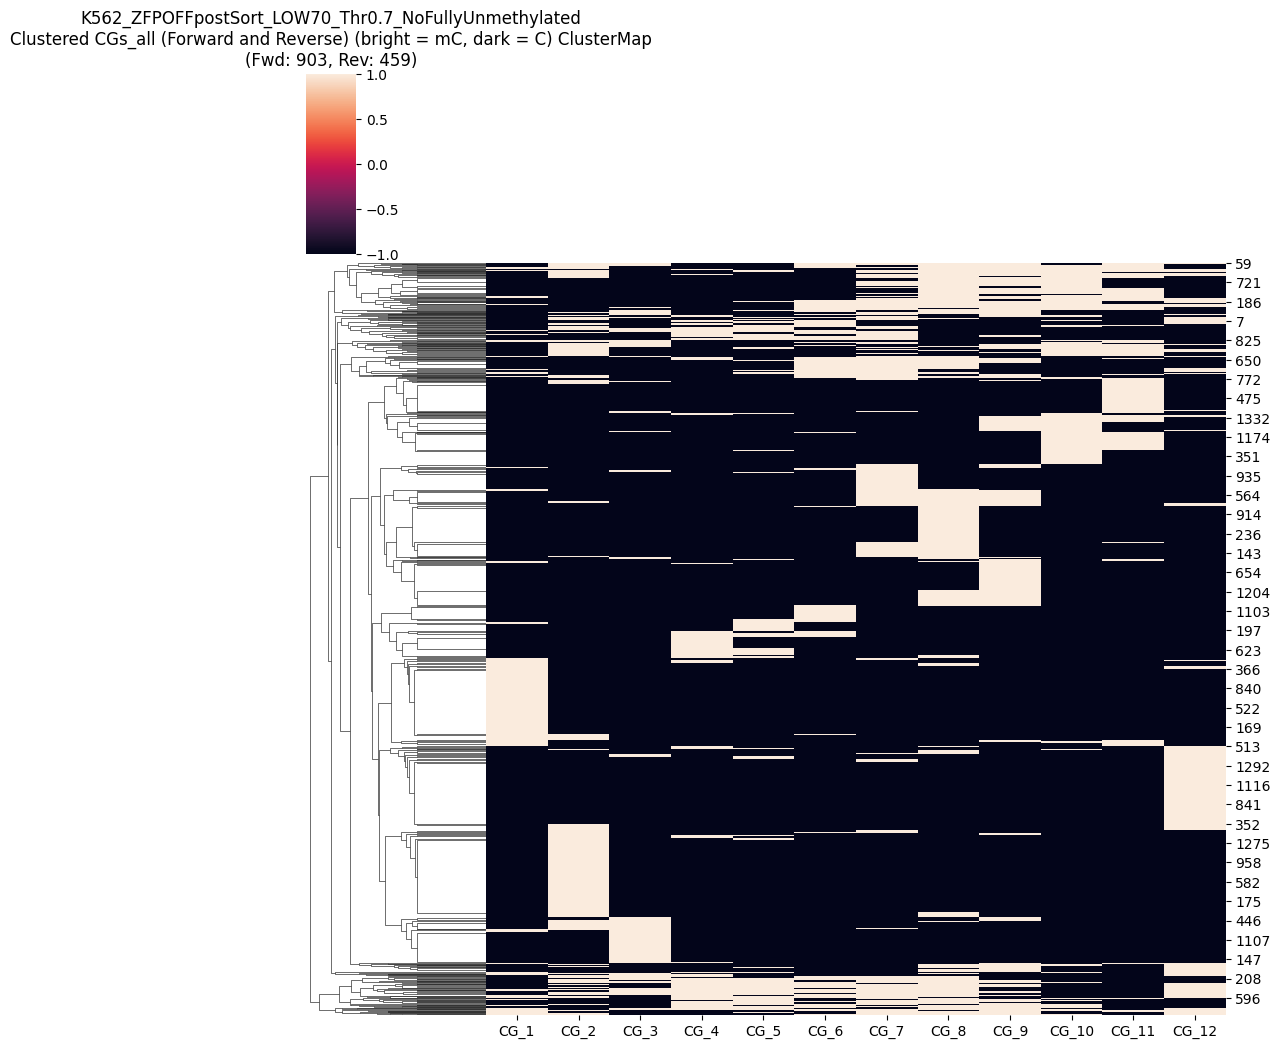

CGs_all saved as CG_12_units_combined_K562_ZFPOFFpostSort_LOW70_Thr0.7_NoFullyUnmethylated_numFWD903_numRVS459_padded_reads_K562_ZFPOFFpostSort_LOW70_Thr0.7_NoFullyUnmethylated_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [ ]:
# """
# Main pipeline for processing and visualizing CpG units on forward and reverse strands 
# """
# try:
#     # Define constants
#     # experiment_name = "unedited_T_primerES_nCATS"
#     # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
#     # save_padded_reads_name_np = "padded_reads.npy"
#     # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
#     # region_chr = "chr1"
#     # region_start = 206586162
#     # region_end = 206586192

#     # Process pipeline
#     CGs_all, C_fwd_df, G_revs_df, padded_reads_df = analize_forward_reverse_CGs_pipeline(
#         experiment_name=experiment_name, save_folder_path=output_dir, 
#         save_padded_reads_name_np=save_padded_reads_name_np, 
#         ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
#     )

#     print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
#     # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

# except Exception as e:
#     print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### Results for ROI Extraction from Unedited cells:
From around   reads located near the ROI, 

only ~   reads have non-zery mC

(with 70% confidance at least one methylated C  in the mC call) 

Forward reads:   

Reverse reads: 

# Analyze the Edited cells from the same cells other sorted part 

System: Linux
Release: 6.8.0-52-generic
Version: #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.…

          |    0%

          | Transferring 10199 from reads.CG,0.txt into reads.combined_basemods.h5, new size 10199   0% | 00:0…

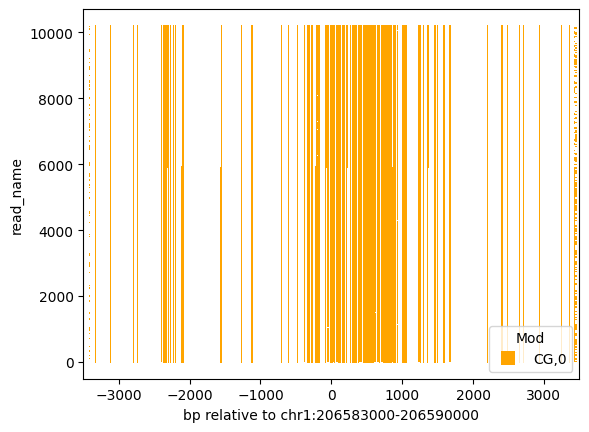

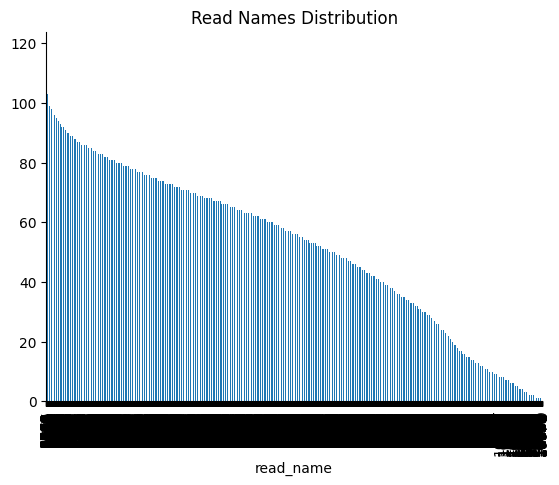

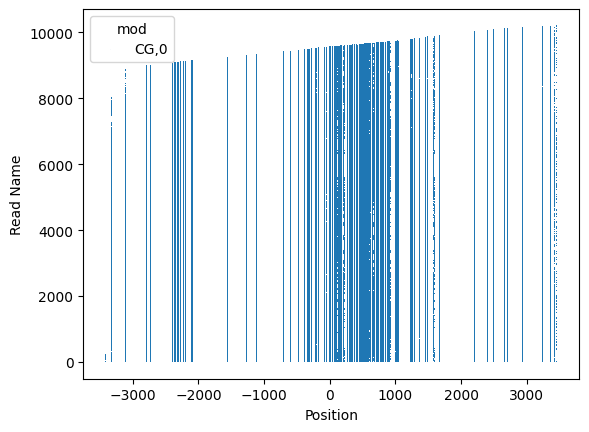

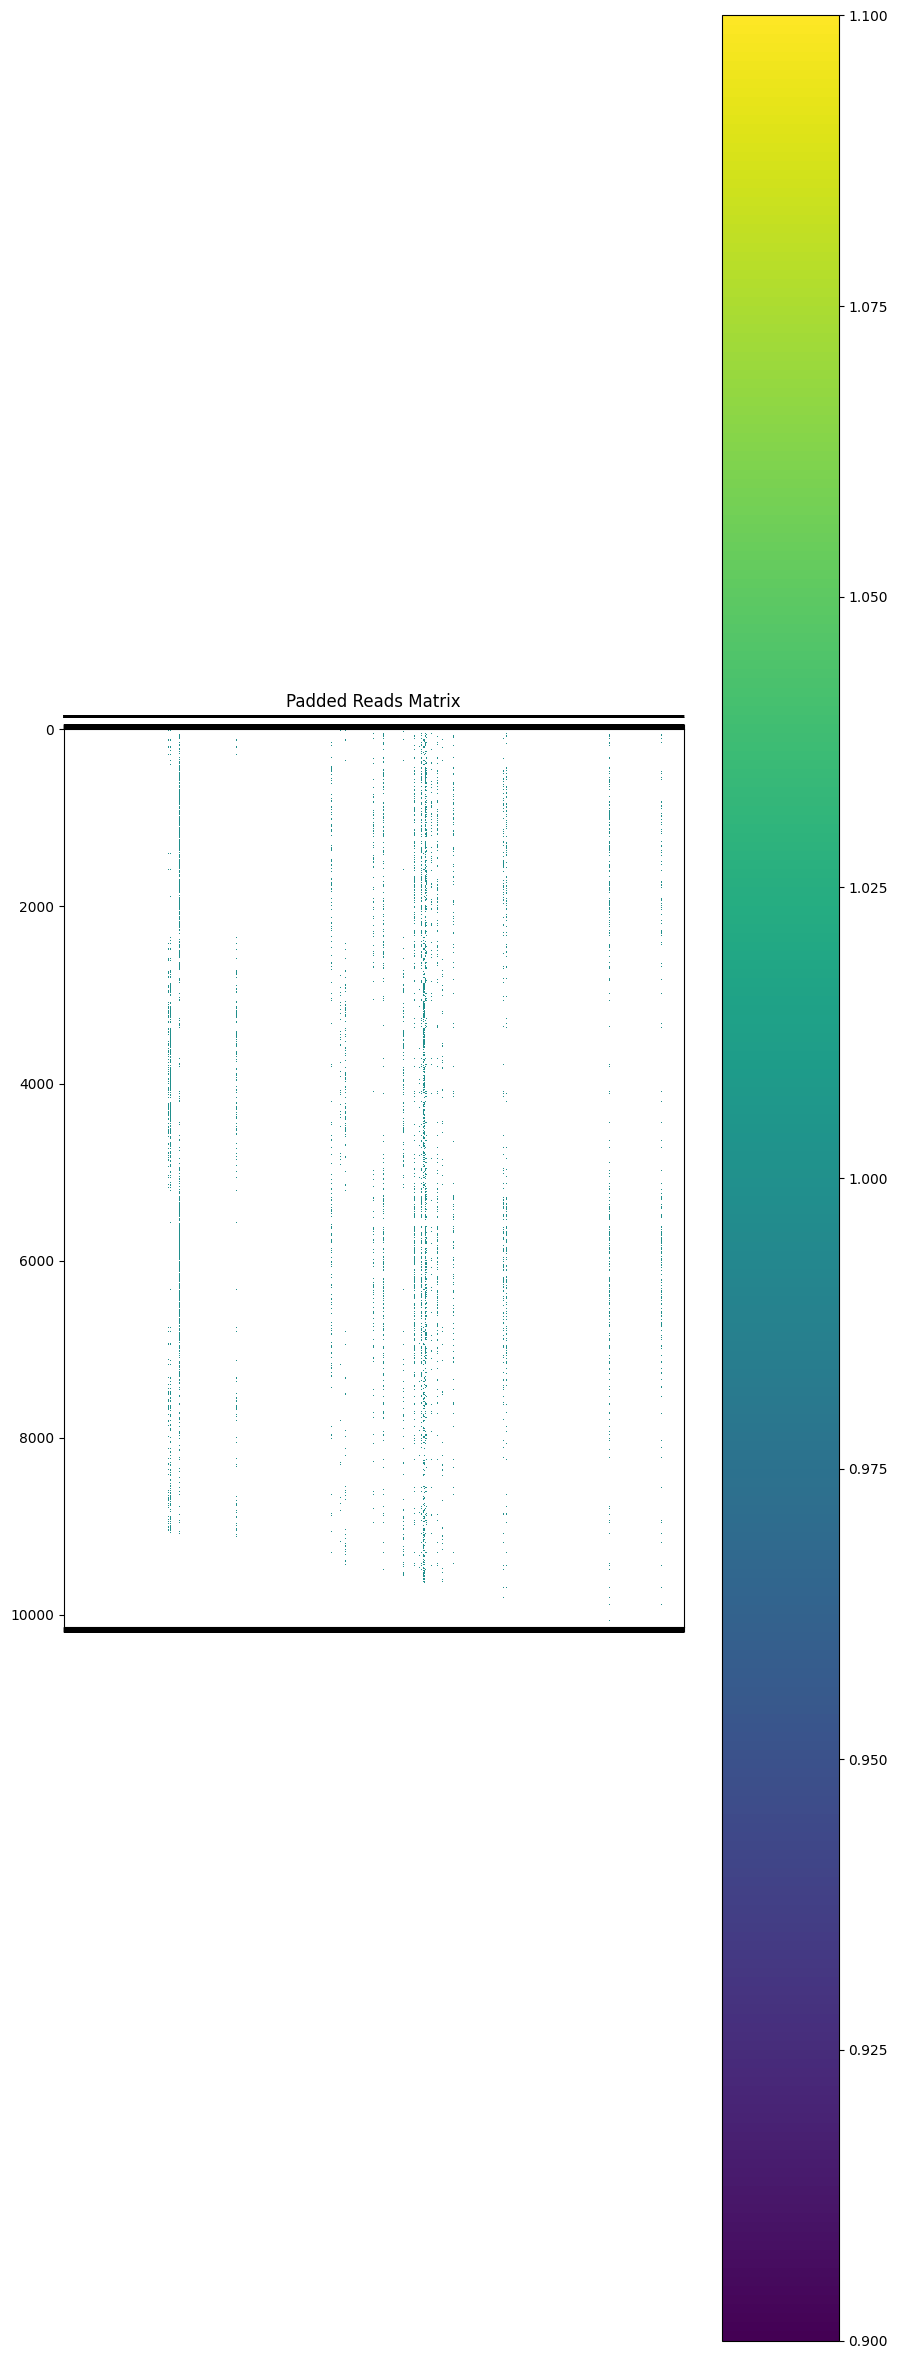

Padded reads saved to padded_reads_CROFF90prD6_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy


In [17]:
system_info()

experiment_name = "CROFF90prD6_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2" 

# threshold_mC = 0.9 # 0.75 # 0.99
bam_path ="/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

#  "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# date_today = datetime.today().strftime('%Y-%m-%d')
# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# # region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
# print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

# if extract_file:
#     reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
#     visualize_data(reads_df)

#     padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
#     if padded_reads is not None:
#         plot_padded_reads(padded_reads, ref_seq_list)
#         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

keep_unmethylated_reads = False
if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

In [18]:
save_padded_reads_name_np

'padded_reads_CROFF90prD6_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy'

Padded reads loaded successfully.


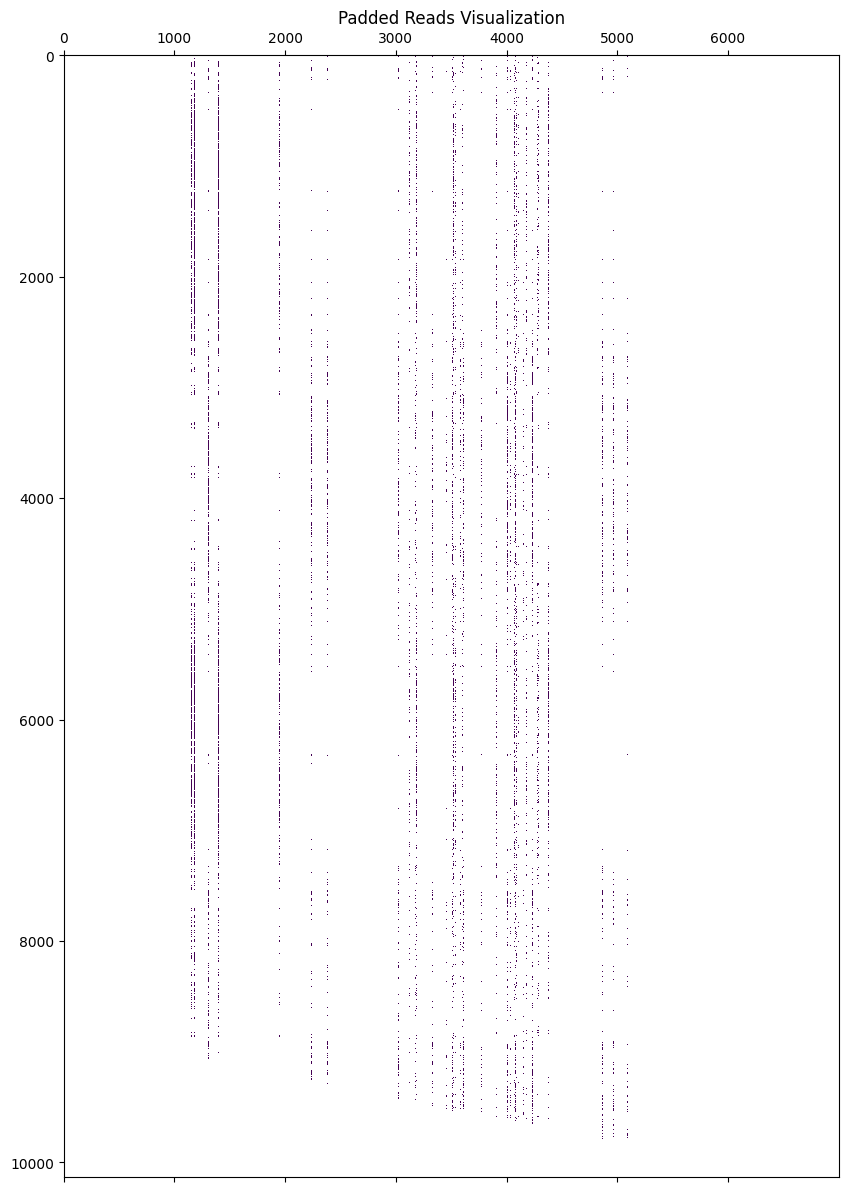

Visualization completed.
Region length: 7000
GCCATTGCCTCAATTCAGTTCTCCATACTCTCCCTAAACTAAACTCCTTACTATTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCATCTCTTTTCCTATTTTTGCCCTATTGCATTGACACTTGTCATATTTAGTTGAATCACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCCTTCTTTCCTTTCTGAAGCCCCATACCACTTTGGTTGTGATATTTGTATAGCATTTATCATGGAAAACCTCCCTACTAGATTGTAGATTCTCAAACACAAGTATTGACACTTAGTGGGTTTCTGTATACTAGGGAAGTTTATTAAACAGTCTTTGATTTAGTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATAT

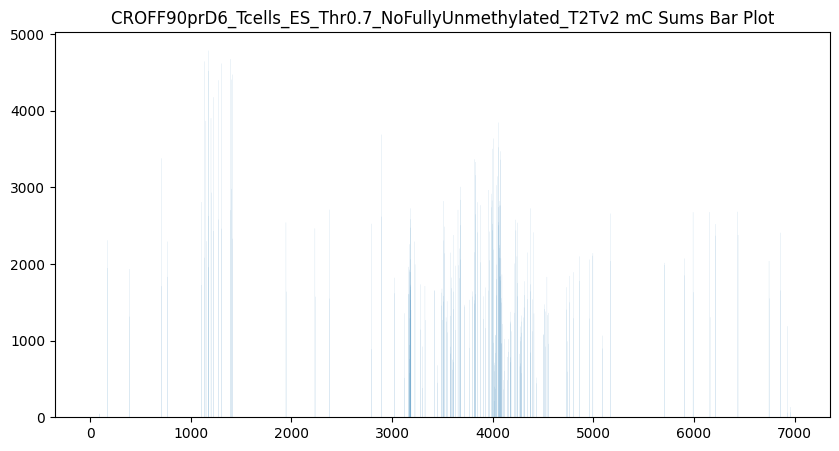

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


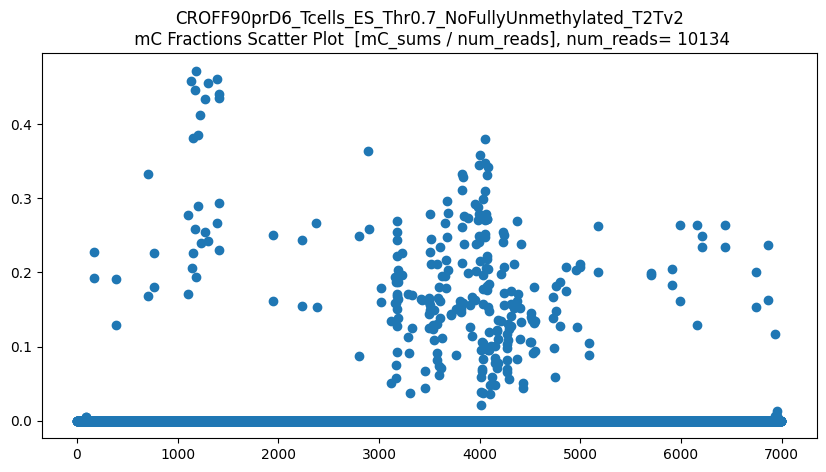

CGs_all_sums  = [  91. 4256. 3247. 5088. 4123. 4534. 6724. 6164. 7144. 6741. 6832. 6606.
 6977. 7075. 7375. 7384. 6800. 4180. 4037. 4257. 3413. 6305. 3438. 1871.
 3571. 2181. 2661. 2868. 3548. 4116. 4454. 4178. 3722. 3294. 4287. 2878.
 1304. 2981. 3307. 1127. 3080. 2946. 3889. 4330. 4626. 2552. 2621. 3067.
 2152. 3506. 1371. 3789. 2357. 3114. 4689. 4015. 5512. 4893. 2910. 2437.
 3217. 3011. 5519. 5807. 4936. 5217. 4788. 2861. 2857. 4617. 4470. 5656.
 5266. 6024. 5824. 1184.  999. 1391. 1447. 1908. 3394. 5019. 5689. 6264.
 6349. 4902. 4454. 4597. 5144. 4601. 5545. 2518. 2460. 3081.  849. 1627.
 1272. 1872. 1965. 2006. 2496. 3368. 5014. 3676. 4290. 1490. 1886. 2043.
 2429. 1824. 2733. 3369. 3690. 2487. 4459. 2660. 3767.  961. 2156. 2886.
 2301. 3164. 2319. 3101. 1585. 3344. 3185. 3878. 3345. 4249. 1962. 4695.
 4001. 3923. 4308. 3982. 4890. 5059. 3590. 4061. 1249.  198.]


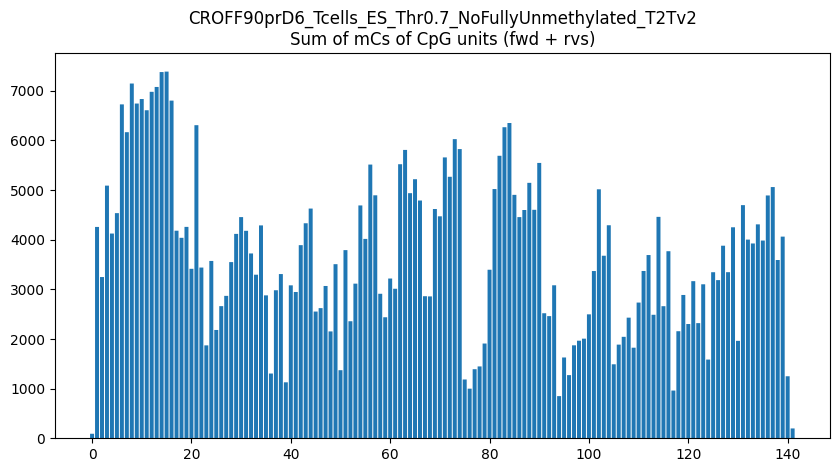

CGs_all_sums / len(CGs_all) = [0.00897967 0.41997237 0.32040655 0.50207223 0.40684823 0.44740478
 0.66350898 0.60824946 0.70495362 0.6651865  0.67416617 0.65186501
 0.68847444 0.69814486 0.72774817 0.72863627 0.67100849 0.41247286
 0.39836195 0.42007105 0.33678705 0.62216302 0.339254   0.18462601
 0.35237813 0.2152161  0.26258141 0.2830077  0.35010855 0.40615749
 0.43951056 0.41227551 0.36727847 0.3250444  0.42303138 0.28399447
 0.12867575 0.29415828 0.32632722 0.11120979 0.30392737 0.29070456
 0.38375765 0.42727452 0.45648313 0.25182554 0.2586343  0.30264456
 0.21235445 0.34596408 0.13528715 0.37388988 0.23258338 0.30728242
 0.46269982 0.39619104 0.54391158 0.48283008 0.28715216 0.2404776
 0.31744622 0.29711861 0.54460233 0.57302151 0.48707322 0.51480166
 0.47246892 0.28231695 0.28192224 0.45559503 0.4410894  0.55812118
 0.51963687 0.59443458 0.57469903 0.11683442 0.09857904 0.13726071
 0.14278666 0.18827709 0.33491218 0.49526347 0.56137754 0.61811723
 0.62650484 0.48371818 0.43951056

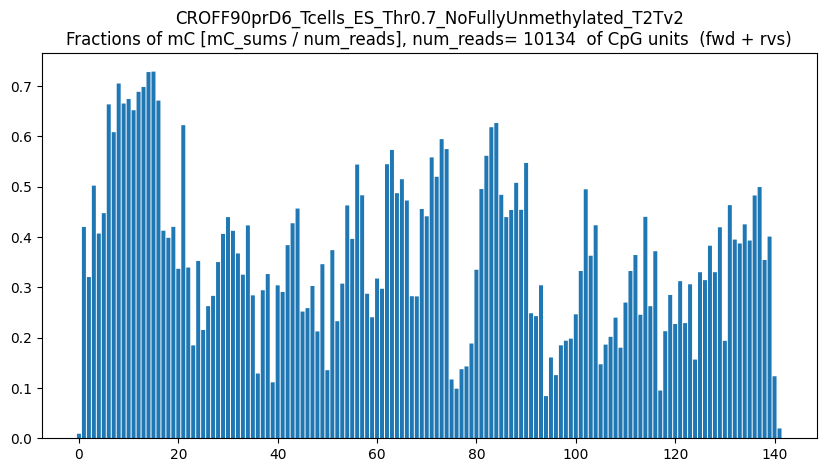

CGs_all_on_fwd_C_sums = [0. 0. 0. ... 0. 0. 0.]


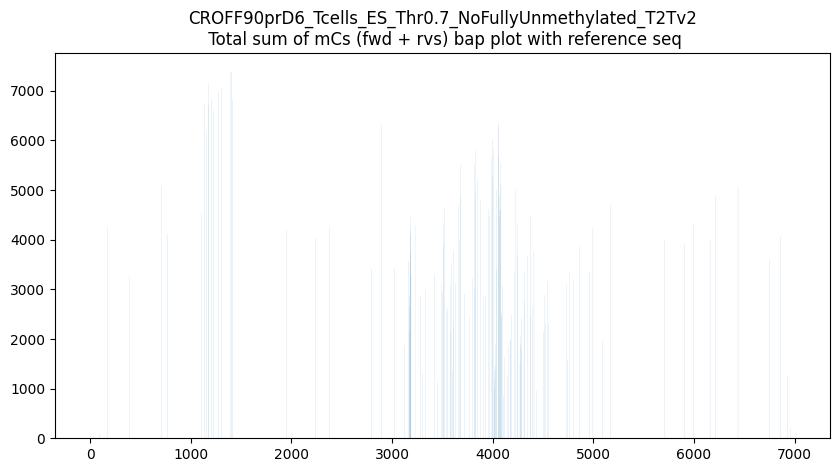

len(CGs_all) = 10134
CGs_all_on_fwd_C_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


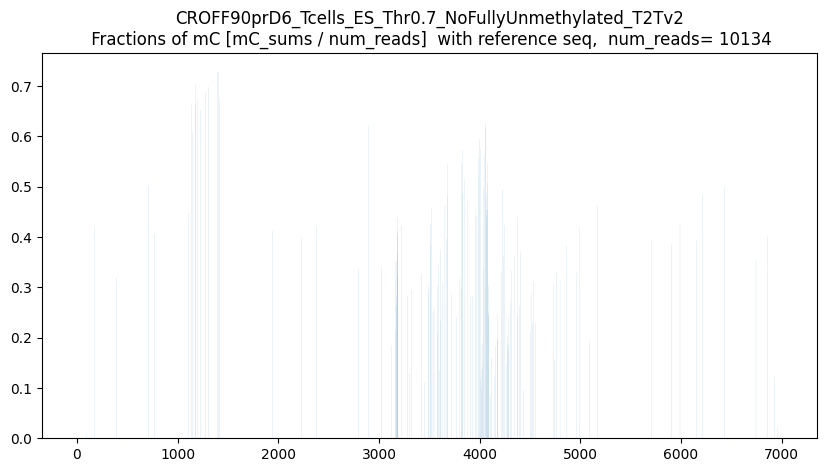

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



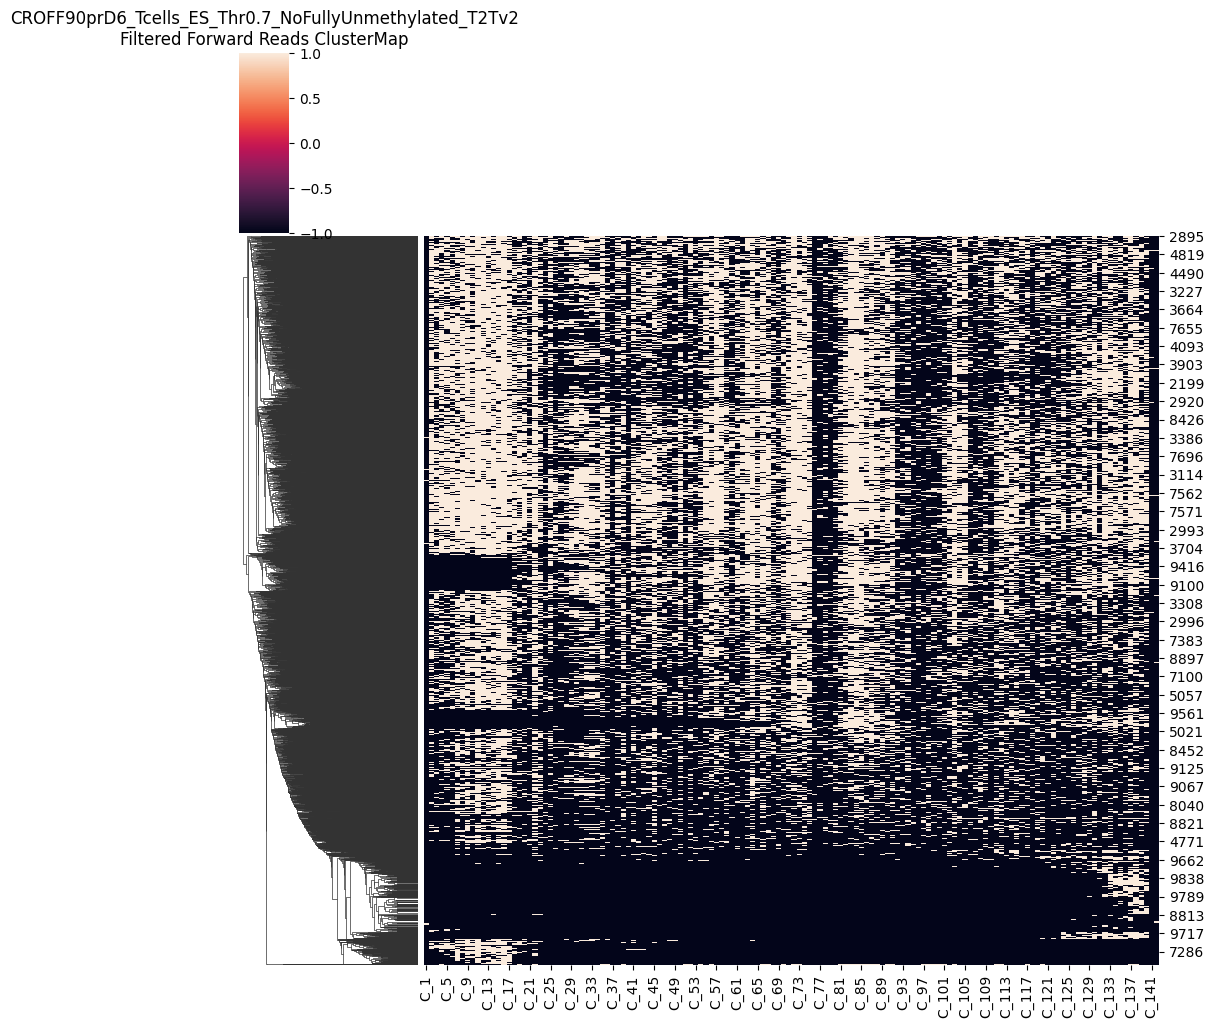

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



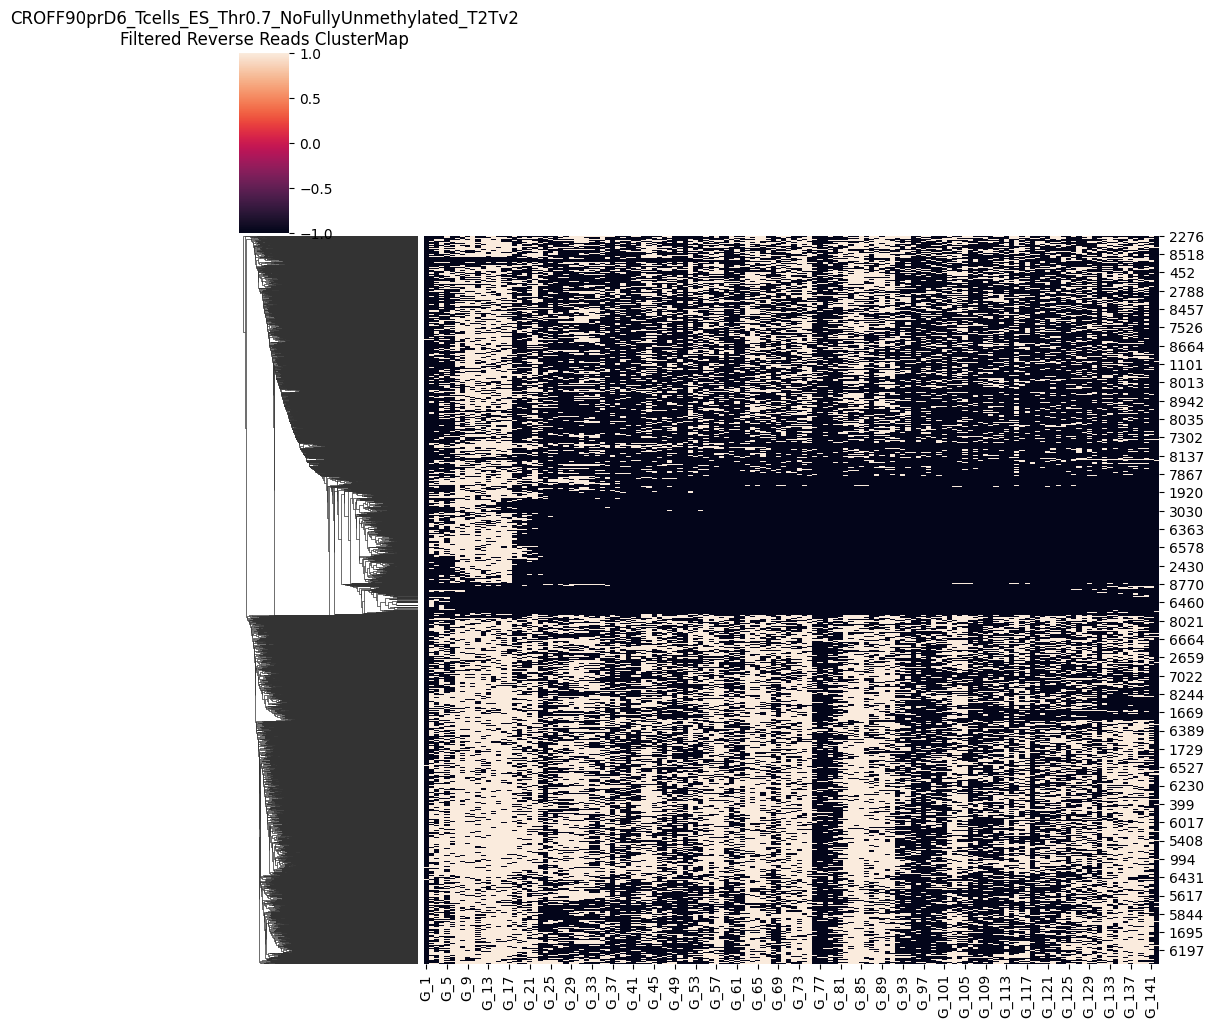

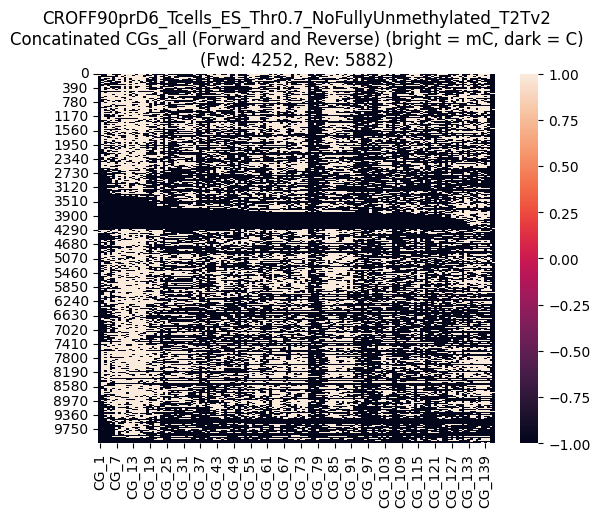

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



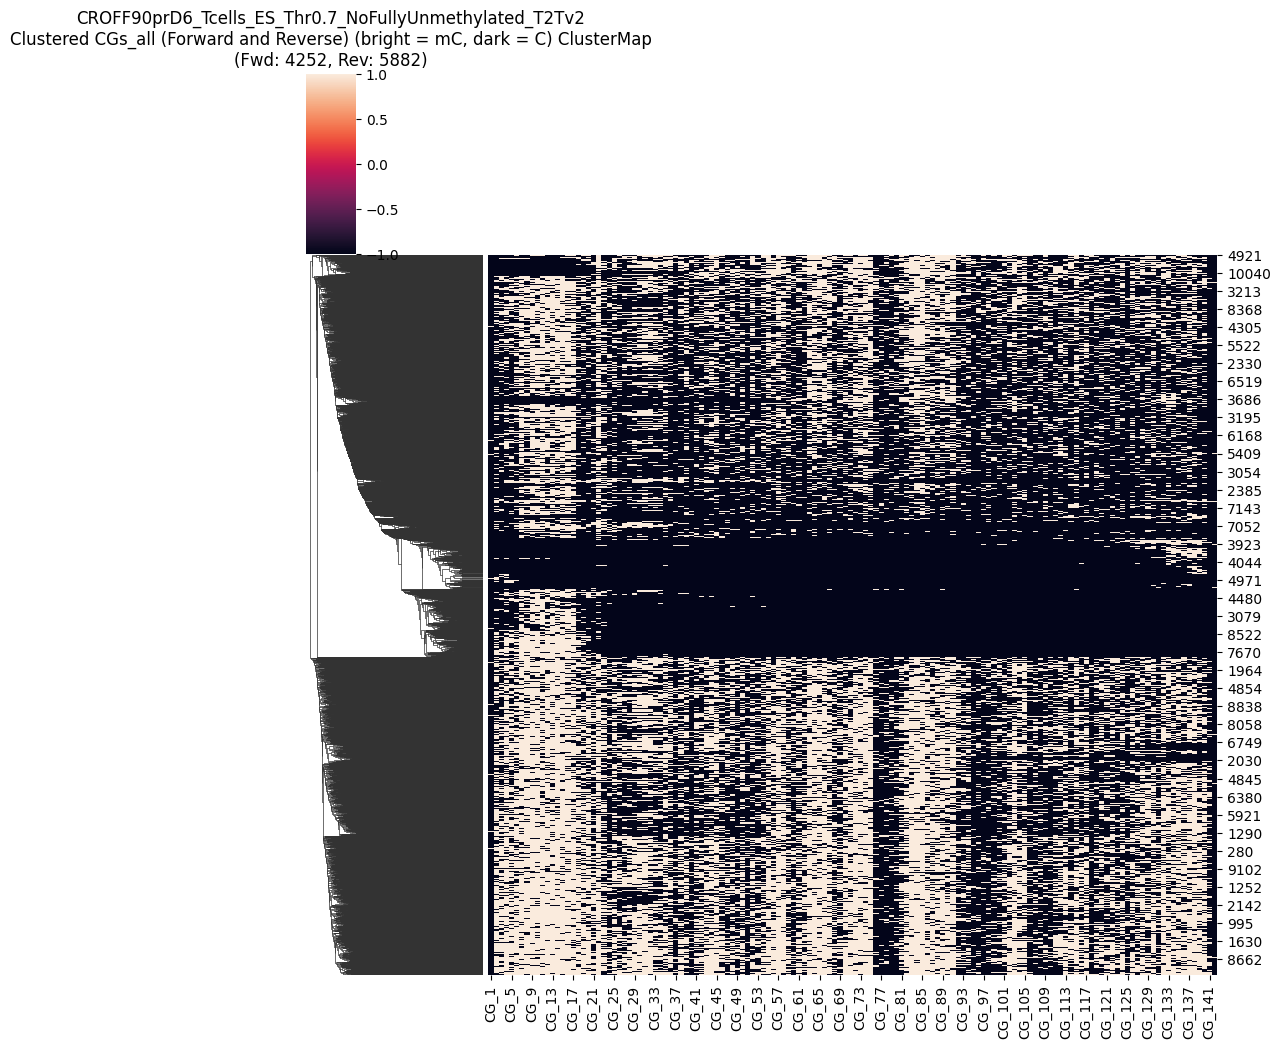

CGs_all saved as CG_142_units_combined_CROFF90prD6_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD4252_numRVS5882_padded_reads_CROFF90prD6_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [19]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


Padded reads loaded successfully.


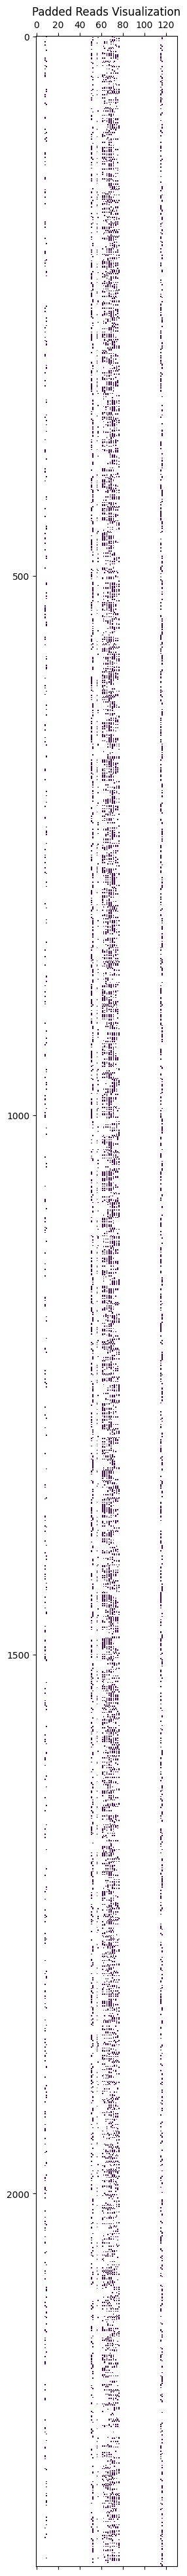

Visualization completed.
Region length: 131
CCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [8, 51, 56, 61, 63, 65, 67, 69, 71, 73, 75, 115]
Forward reads: 1299
Reverse reads: 1047
DataFrame shape: (2346, 131)
         C    C    A    T    T    C    A    G      C      G  ...    C    T  \
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  297.0  180.0  ...  0.0  0.0   
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    0.0    0.0  ...  NaN  NaN   
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   

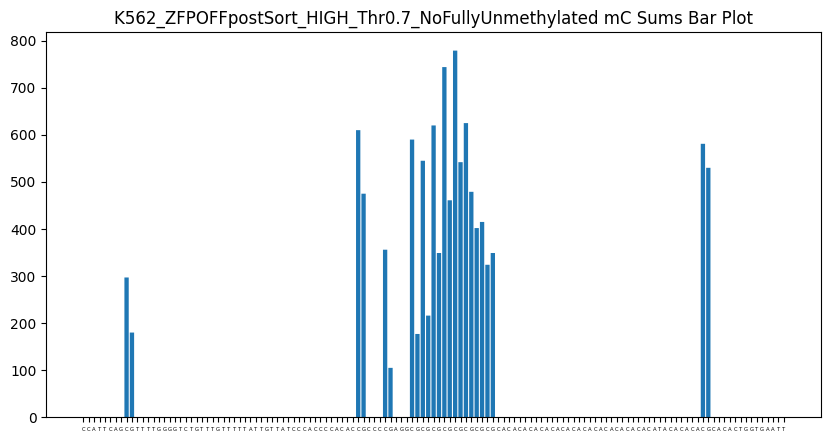

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.12659847 0.07672634 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.26001705 0.20247229 0.
 0.         0.         0.15174766 0.04475703 0.         0.
 0.         0.2514919  0.07544757 0.23231032 0.09207161 0.26427962
 0.14876385 0.31713555 0.19650469 0.33205456 0.23103154 0.26641091
 0.20417732 0.1713555  0.17689685 0.13810742 0.14876385 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.

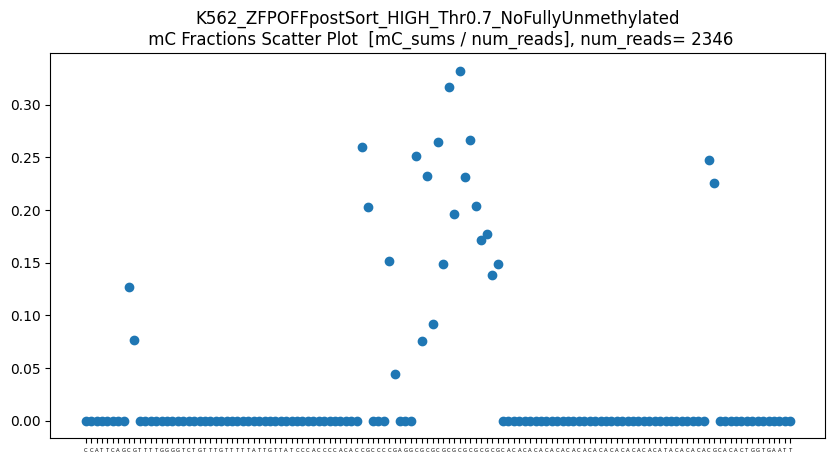

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums  = [ 477. 1085.  461.  767.  761.  969. 1205. 1321. 1104.  817.  673. 1111.]


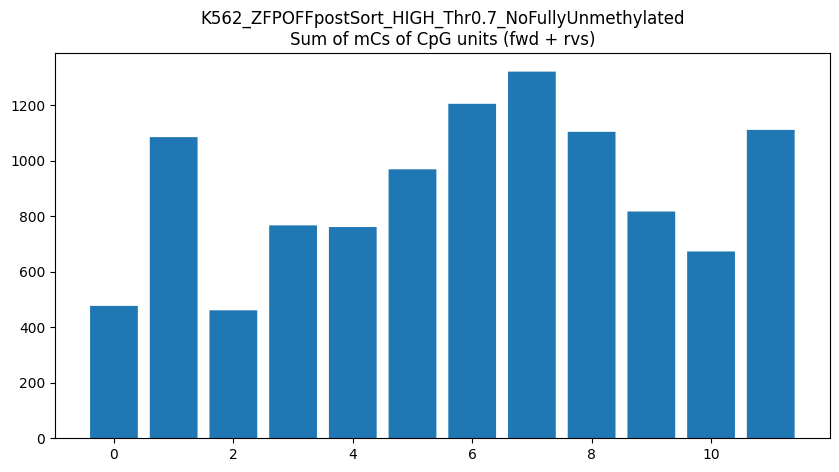

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums / len(CGs_all) = [0.20332481 0.46248934 0.19650469 0.32693947 0.32438193 0.41304348
 0.51364024 0.5630861  0.47058824 0.34825234 0.28687127 0.47357204]


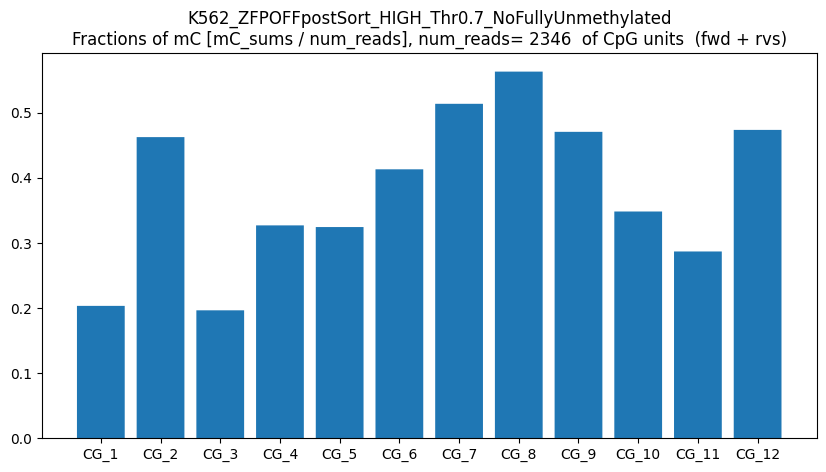

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_on_fwd_C_sums = [   0.    0.    0.    0.    0.    0.    0.    0.  477.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0. 1085.    0.    0.    0.    0.  461.    0.    0.    0.
    0.  767.    0.  761.    0.  969.    0. 1205.    0. 1321.    0. 1104.
    0.  817.    0.  673.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0. 1111.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]


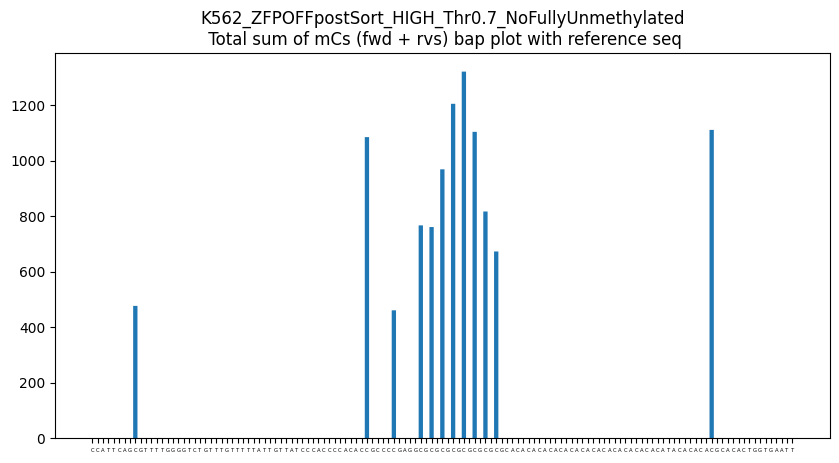

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


len(CGs_all) = 2346
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.20332481 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.46248934 0.         0.
 0.         0.         0.19650469 0.         0.         0.
 0.         0.32693947 0.         0.32438193 0.         0.41304348
 0.         0.51364024 0.         0.5630861  0.         0.47058824
 0.         0.34825234 0.         0.28687127 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

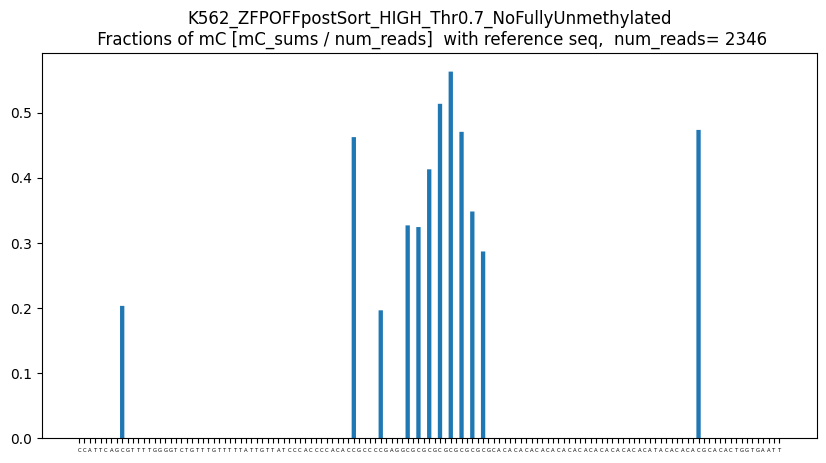

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



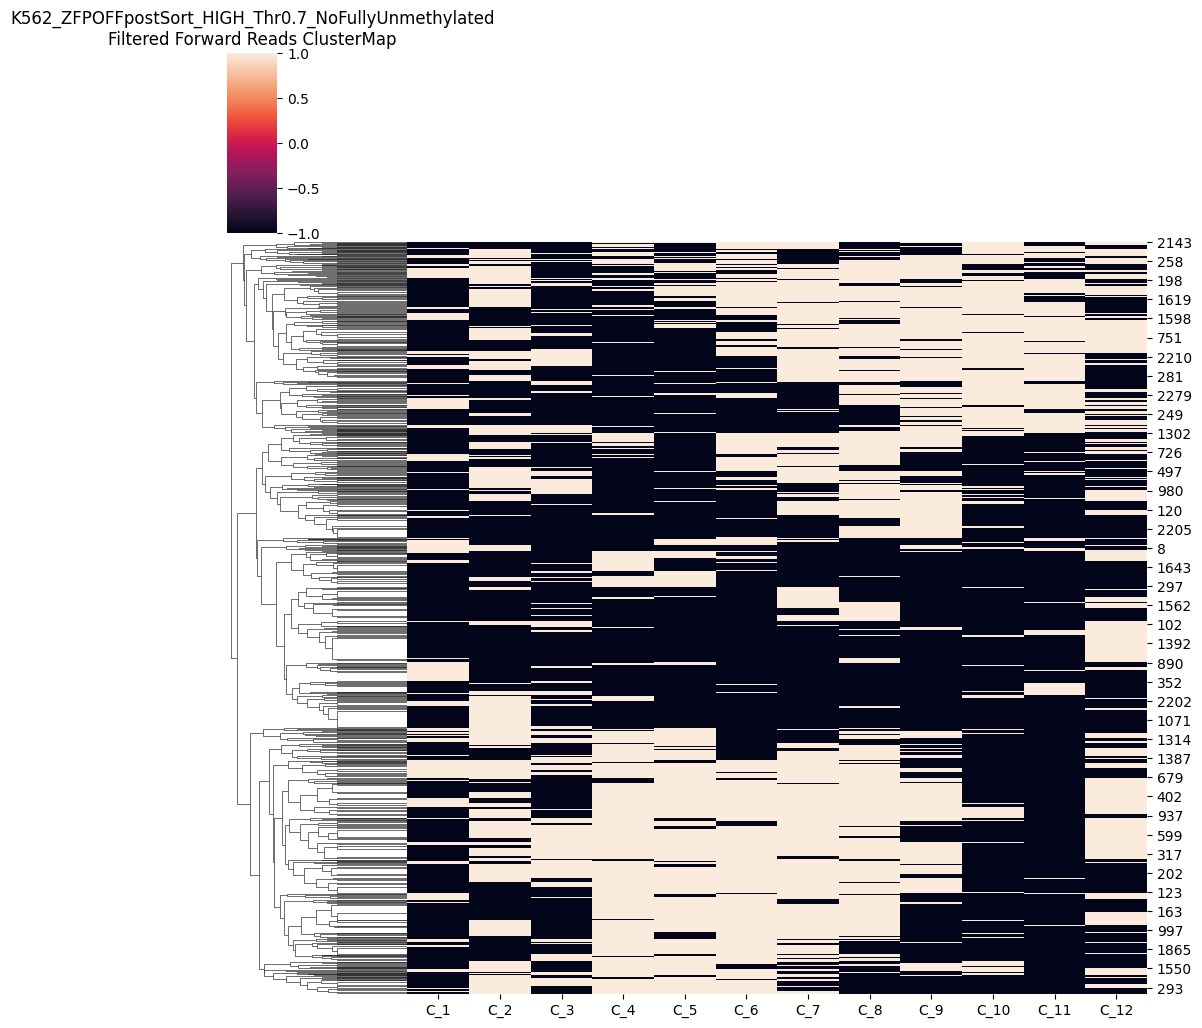

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



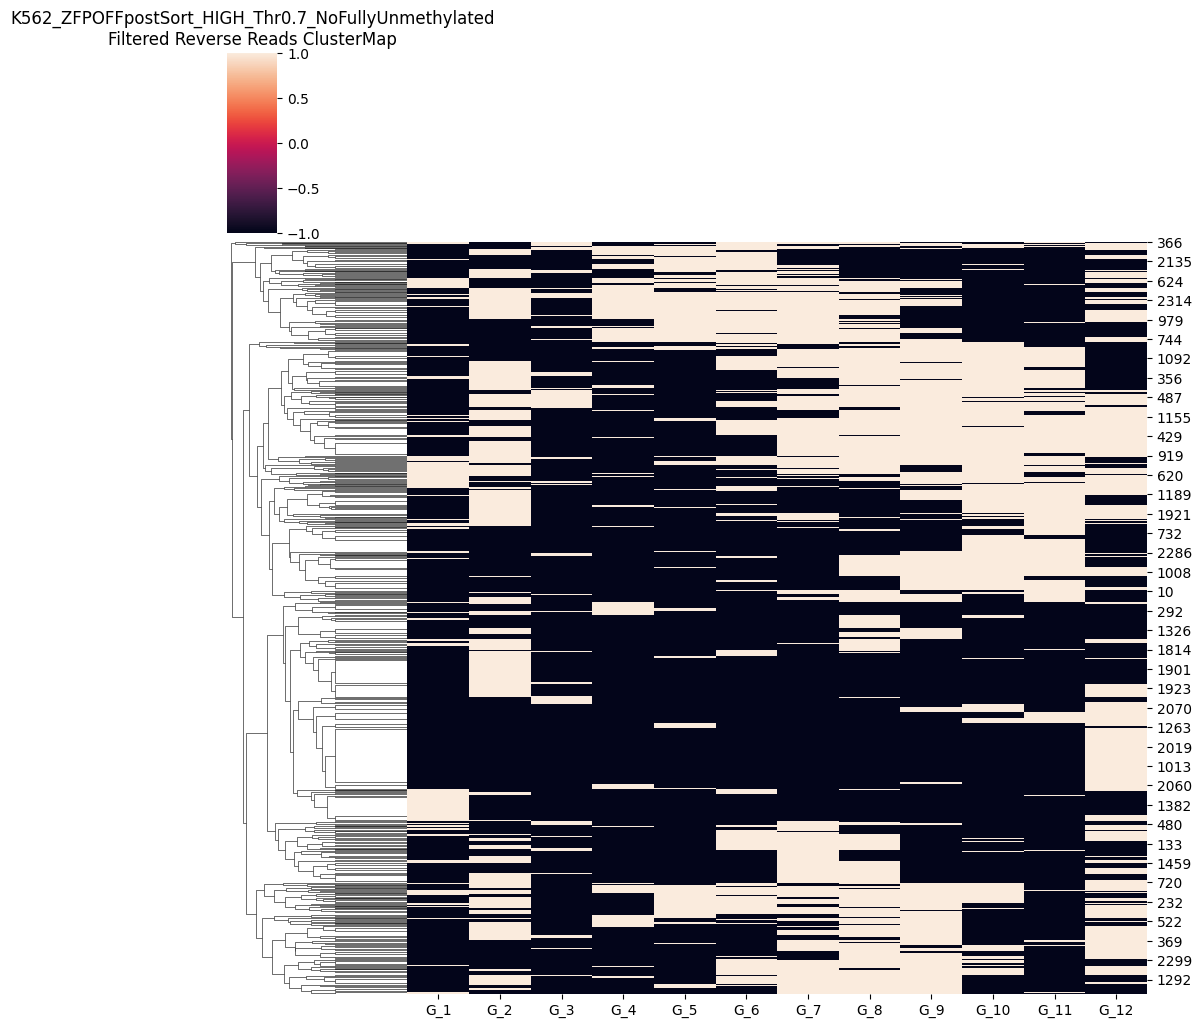

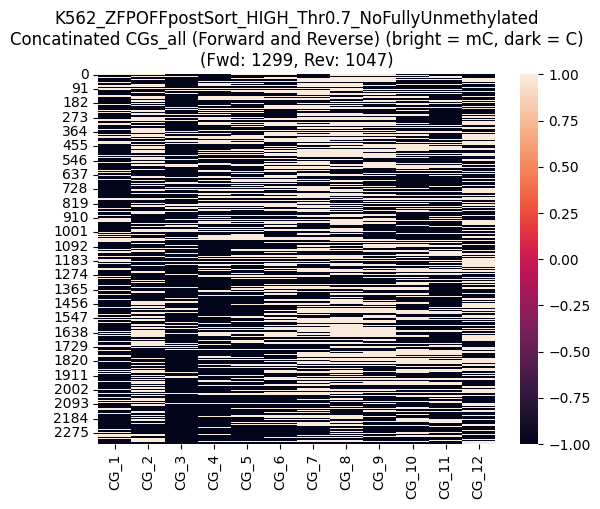

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



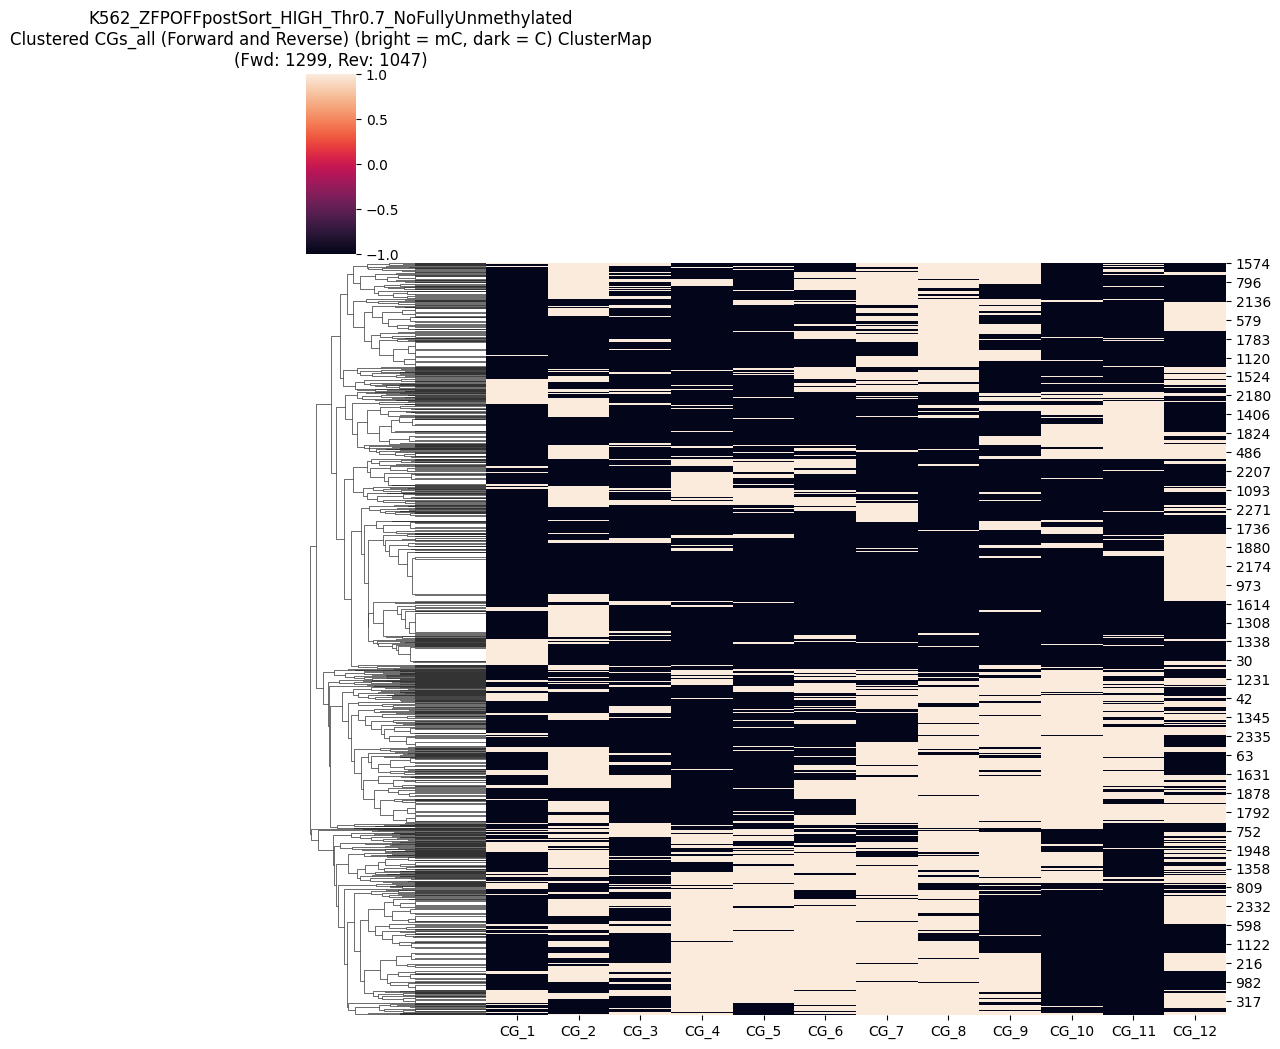

CGs_all saved as CG_12_units_combined_K562_ZFPOFFpostSort_HIGH_Thr0.7_NoFullyUnmethylated_numFWD1299_numRVS1047_padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.7_NoFullyUnmethylated_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [ ]:
# """
# Main pipeline for processing and visualizing CpG units on forward and reverse strands 
# """
# try:
#     # Define constants
#     # experiment_name = "unedited_T_primerES_nCATS"
#     # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
#     # save_padded_reads_name_np = "padded_reads.npy"
#     # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
#     # region_chr = "chr1"
#     # region_start = 206586162
#     # region_end = 206586192

#     # Process pipeline
#     CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced = analize_forward_reverse_CGs_pipeline(
#         experiment_name=experiment_name, save_folder_path=output_dir, 
#         save_padded_reads_name_np=save_padded_reads_name_np, 
#         ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
#     )

#     print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
#     # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

# except Exception as e:
#     print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### ROI Extraction Results from  Silenced sorted cells :
From around   reads located near the ROI, 

 ~  reads have non-zery mC 
 
 (with 70% confidance in at least one methylated C the mC calls ) 

Forward reads:  

Reverse reads:  


# Change the mC threshold to 0.9 - only keep very confident mC values


System: Linux
Release: 6.8.0-52-generic
Version: #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 7000
GCCATTGCCTCAATTCAGTTCTCCATACTCTCCCTAAACTAAACTCCTTACTATTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCATCTCTTTTCCTATTTTTGCCCTATTGCATTGACACTTGTCATATTTAGTTGAATCACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCCTTCTTTCCTTTCTGAAGCCCCATACCACTTTGGTTGTGATATTTGTATAGCATTTATCATGGAAAACCTCCCTACTAGATTGTAGATTCTCAAACACAAGTATTGACACTTAGTGGGTTTCTGTATACTAGGGAAGTTTATTAAACAGTCTTTGATTTAGTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGA

          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.…

          |    0%

          | Transferring 3574 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3574   0% | 00:00<…

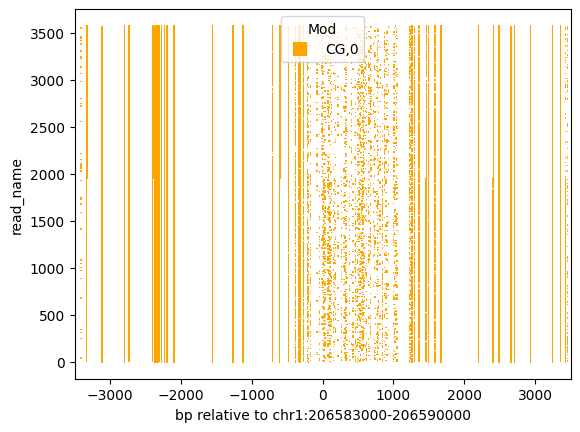

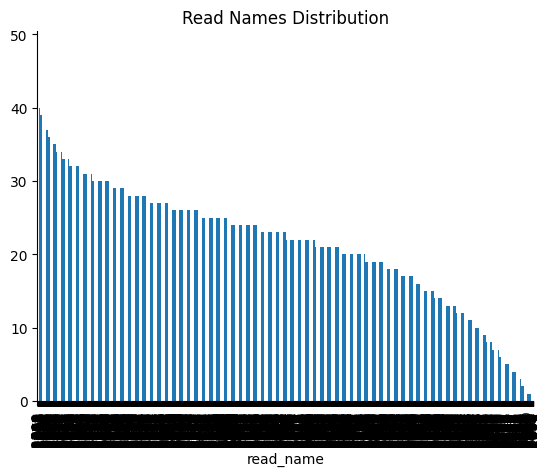

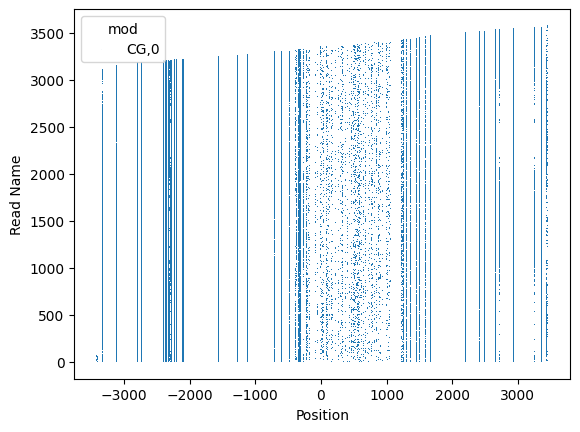

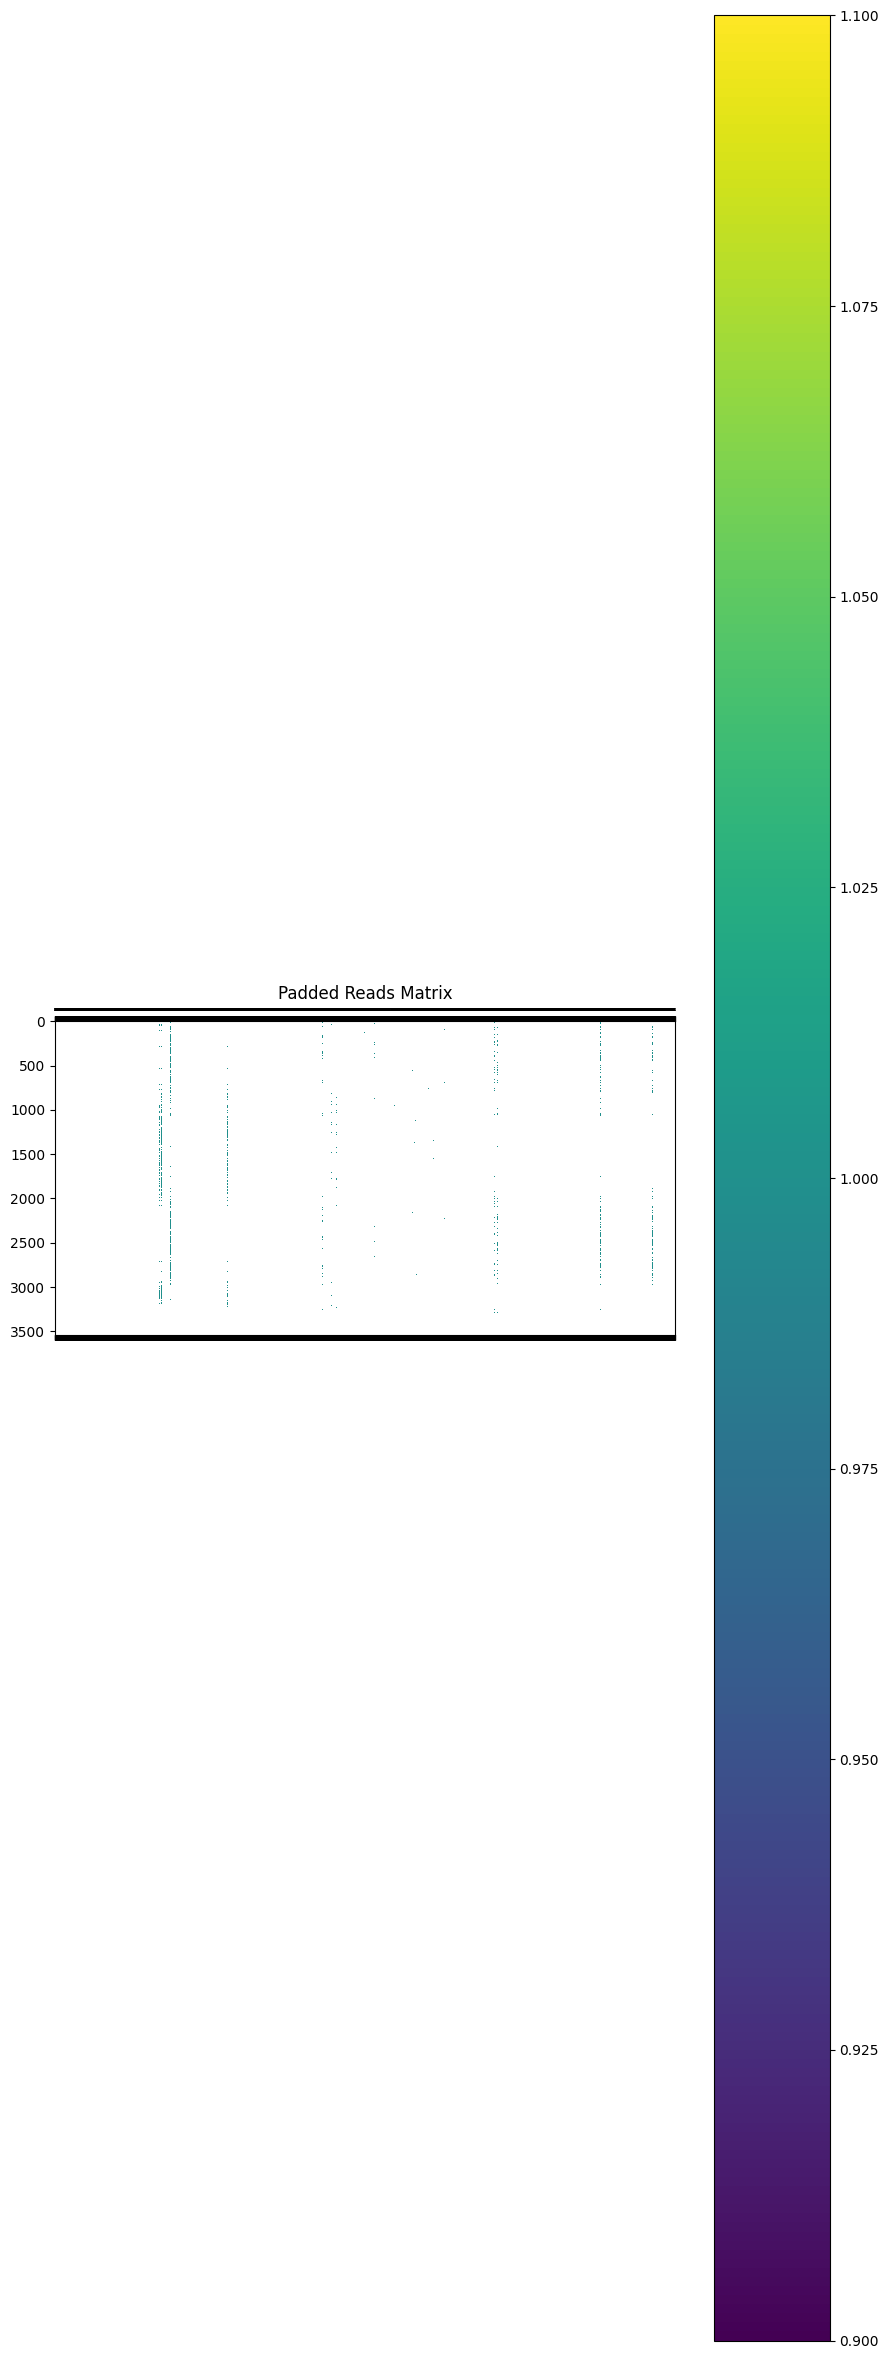

Padded reads saved to padded_reads_unedited_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy


In [20]:
system_info()


experiment_name = "unedited_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2"
threshold_mC =  0.9 #  0.9 #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')

# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# # t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

keep_unmethylated_reads = False

if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

Padded reads loaded successfully.


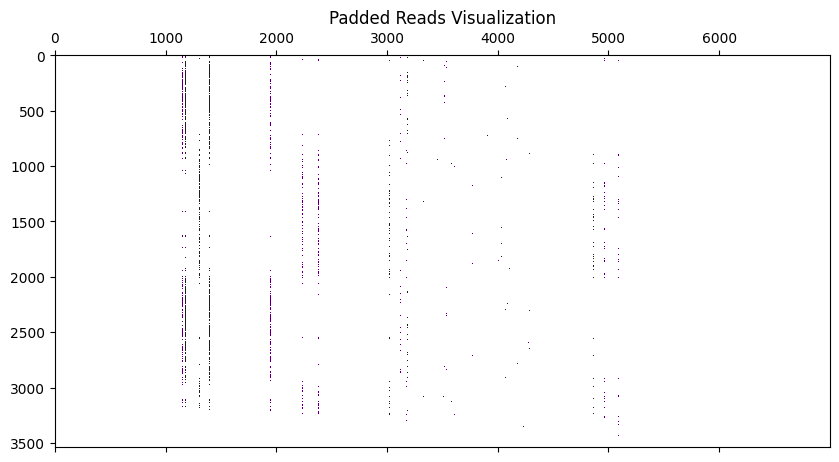

Visualization completed.
Region length: 7000
GCCATTGCCTCAATTCAGTTCTCCATACTCTCCCTAAACTAAACTCCTTACTATTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCATCTCTTTTCCTATTTTTGCCCTATTGCATTGACACTTGTCATATTTAGTTGAATCACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCCTTCTTTCCTTTCTGAAGCCCCATACCACTTTGGTTGTGATATTTGTATAGCATTTATCATGGAAAACCTCCCTACTAGATTGTAGATTCTCAAACACAAGTATTGACACTTAGTGGGTTTCTGTATACTAGGGAAGTTTATTAAACAGTCTTTGATTTAGTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATAT

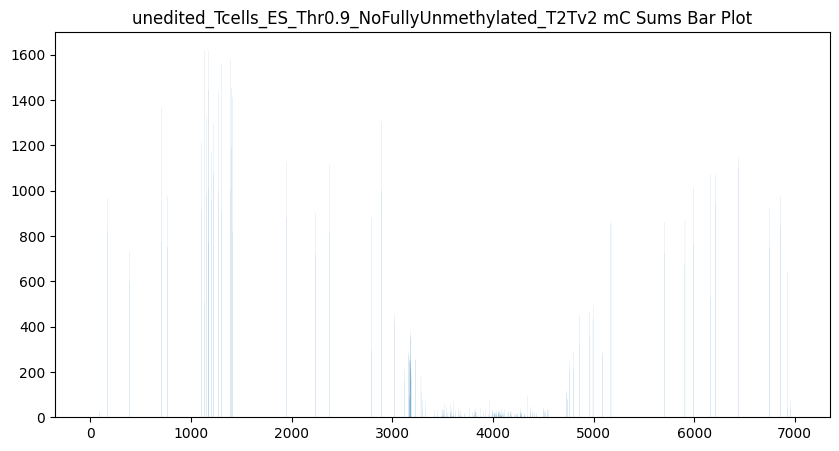

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


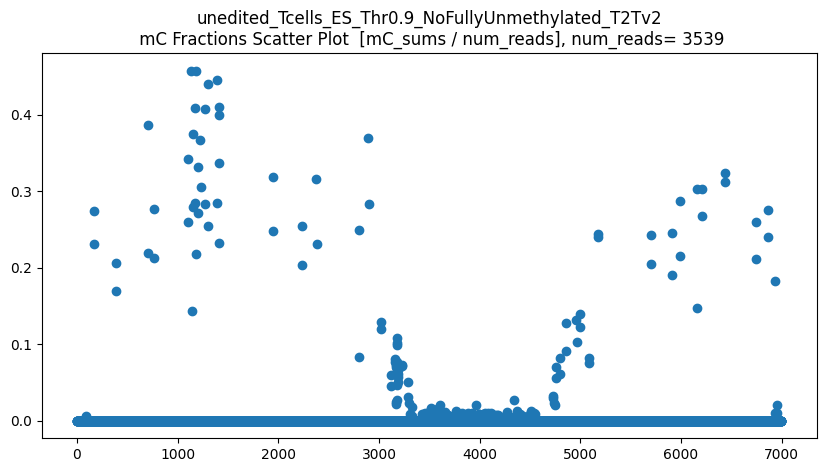

CGs_all_sums  = [  41. 1788. 1330. 2141. 1729. 2129. 2125. 2313. 2451. 2389. 2133. 2379.
 2441. 2460. 2585. 2643. 2234. 2006. 1619. 1931. 1177. 2307.  882.  373.
  558.  325.  346.  339.  438.  564.  633.  609.  441.  397.  511.  292.
  113.   88.   40.   41.   40.   46.   44.   28.   71.   62.   25.   77.
   34.   54.   12.   89.   15.   49.   50.   31.   15.   42.   34.   54.
   36.   46.   35.   59.   48.   13.   43.   38.   39.   14.   91.   14.
   37.   52.   32.   19.   29.   21.   32.   46.   19.   24.   51.   34.
   37.   25.   33.   37.   23.   22.   44.   17.   21.   34.   34.   52.
   24.   47.   47.   28.   34.   23.   31.   25.   18.   23.   38.   56.
   43.   27.   26.   25.  106.   53.   45.   46.   42.   33.   77.   49.
   39.   69.   44.  220.  156.  447.  504.  773.  828.  927.  558. 1714.
 1584. 1540. 1779. 1594. 2016. 2249. 1670. 1821.  681.  110.]


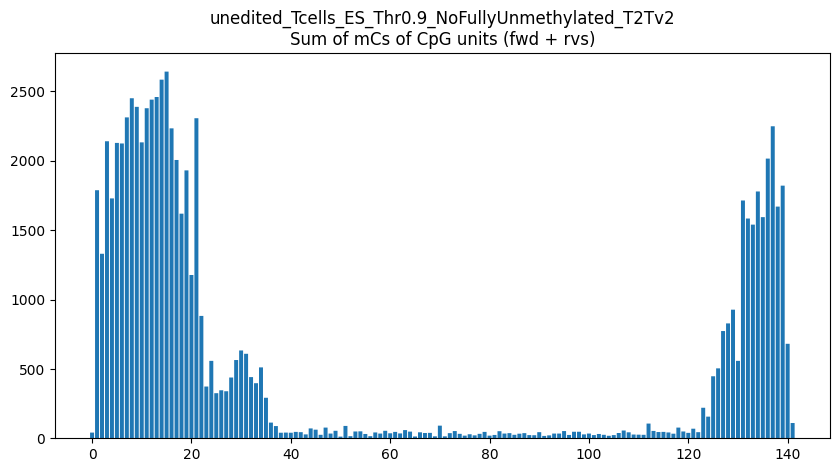

CGs_all_sums / len(CGs_all) = [0.01158519 0.50522747 0.37581238 0.60497316 0.48855609 0.60158237
 0.60045211 0.65357446 0.69256852 0.67504945 0.60271263 0.67222379
 0.68974287 0.69511161 0.73043233 0.74682114 0.63125177 0.56682679
 0.45747386 0.54563436 0.33257982 0.65187906 0.24922294 0.105397
 0.15767166 0.09183385 0.09776773 0.09578977 0.12376378 0.15936705
 0.17886409 0.17208251 0.12461147 0.11217858 0.14439107 0.08250918
 0.03192992 0.02486578 0.01130263 0.01158519 0.01130263 0.01299802
 0.01243289 0.00791184 0.02006216 0.01751907 0.00706414 0.02175756
 0.00960723 0.01525855 0.00339079 0.02514835 0.00423849 0.01384572
 0.01412828 0.00875954 0.00423849 0.01186776 0.00960723 0.01525855
 0.01017237 0.01299802 0.0098898  0.01667138 0.01356315 0.00367335
 0.01215032 0.0107375  0.01102006 0.00395592 0.02571348 0.00395592
 0.01045493 0.01469342 0.0090421  0.00536875 0.00819441 0.00593388
 0.0090421  0.01299802 0.00536875 0.00678158 0.01441085 0.00960723
 0.01045493 0.00706414 0.00932467 

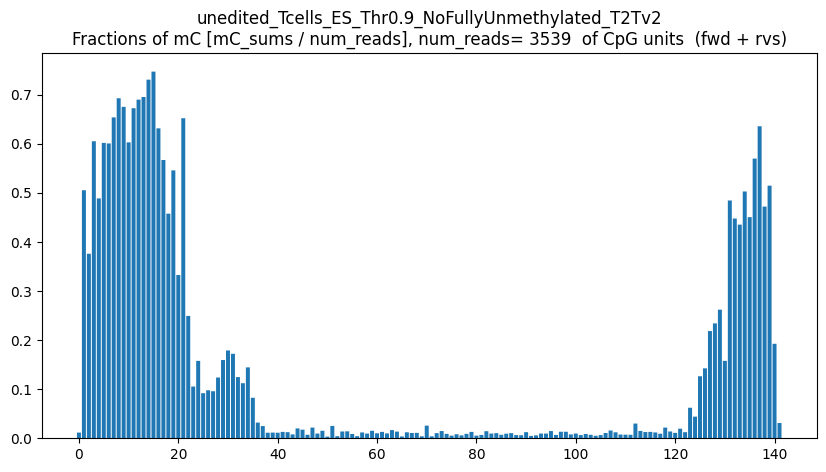

CGs_all_on_fwd_C_sums = [0. 0. 0. ... 0. 0. 0.]


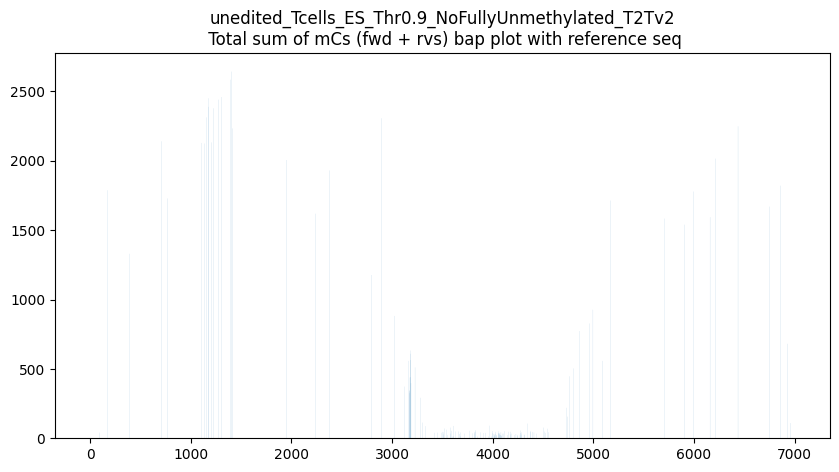

len(CGs_all) = 3539
CGs_all_on_fwd_C_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


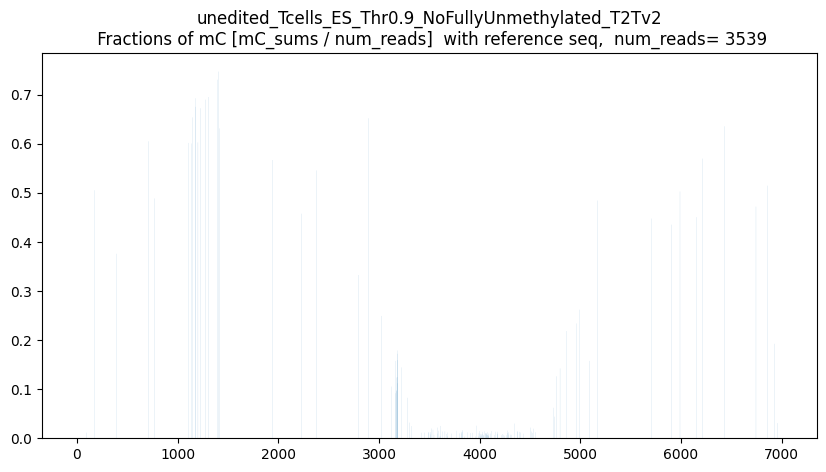

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



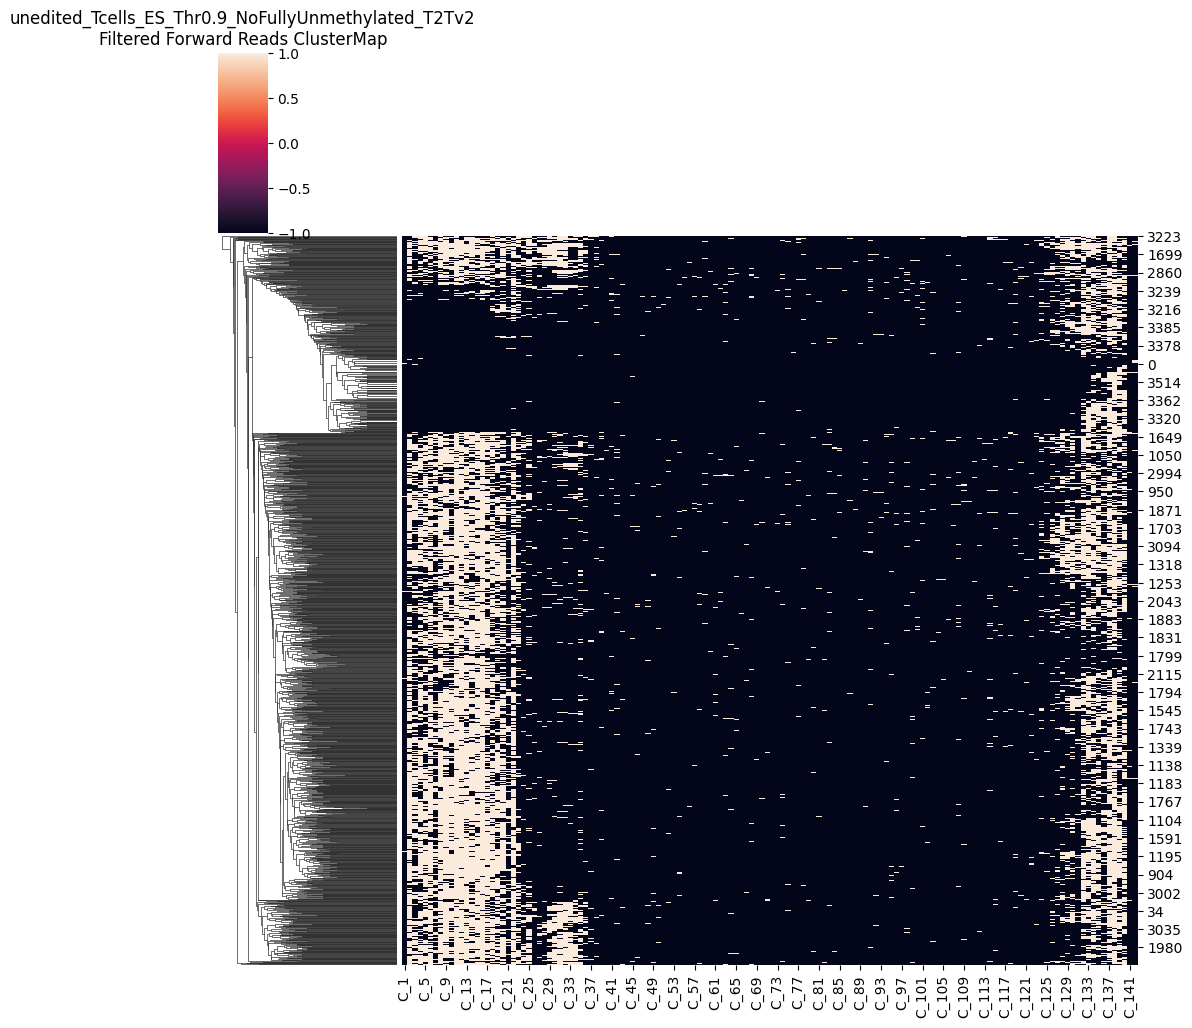

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



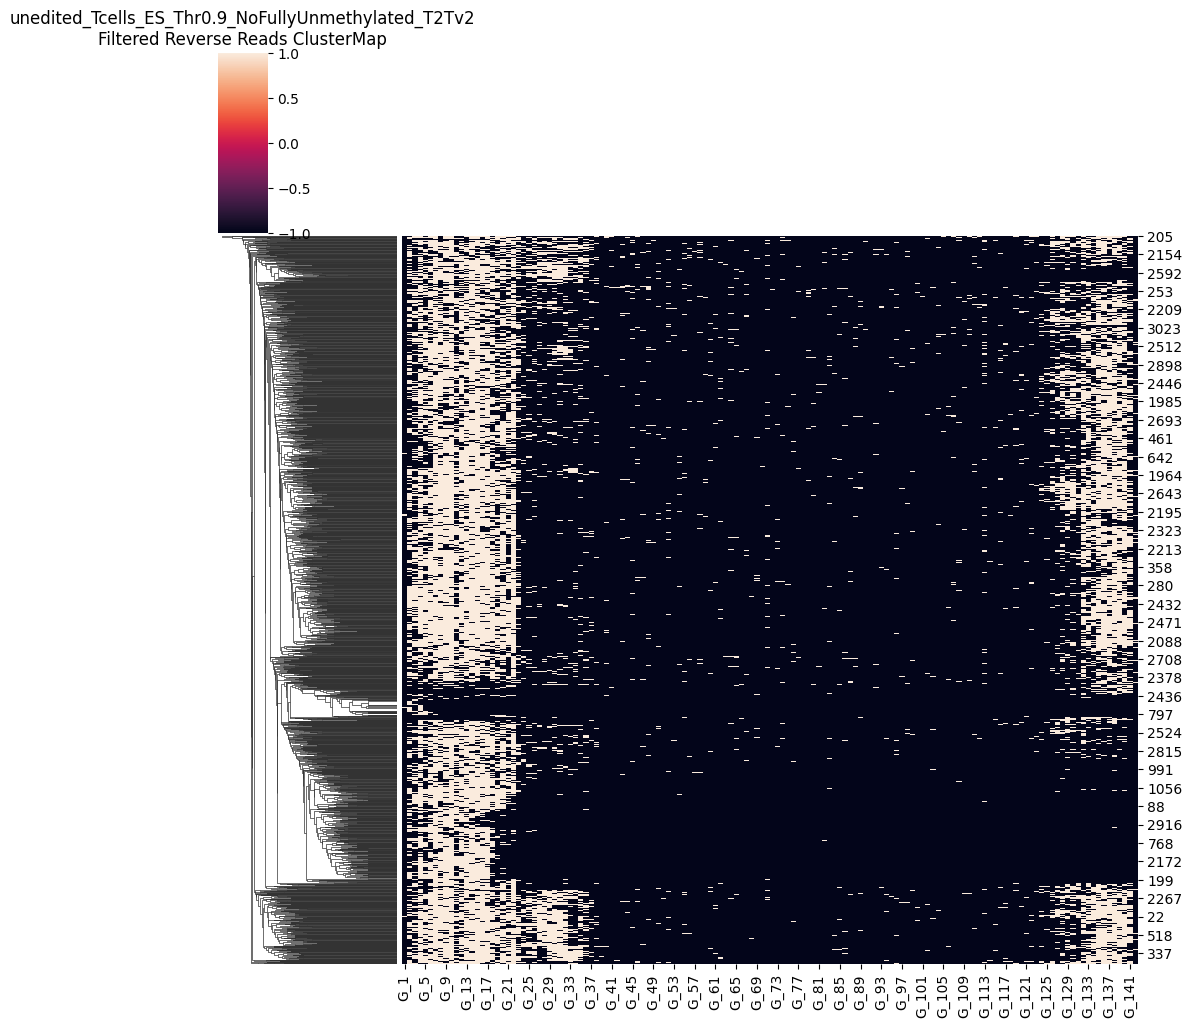

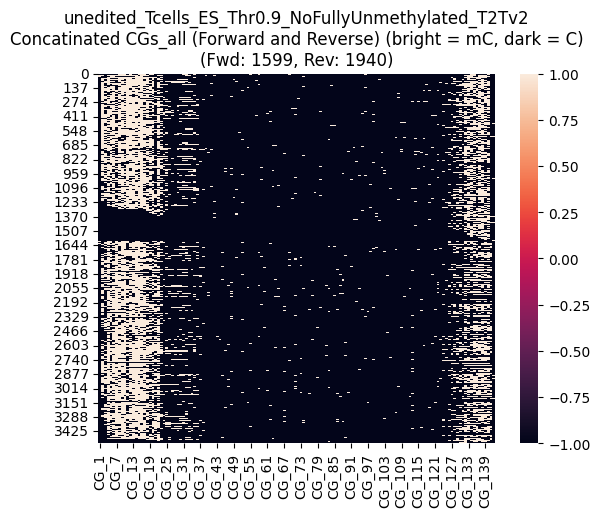

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



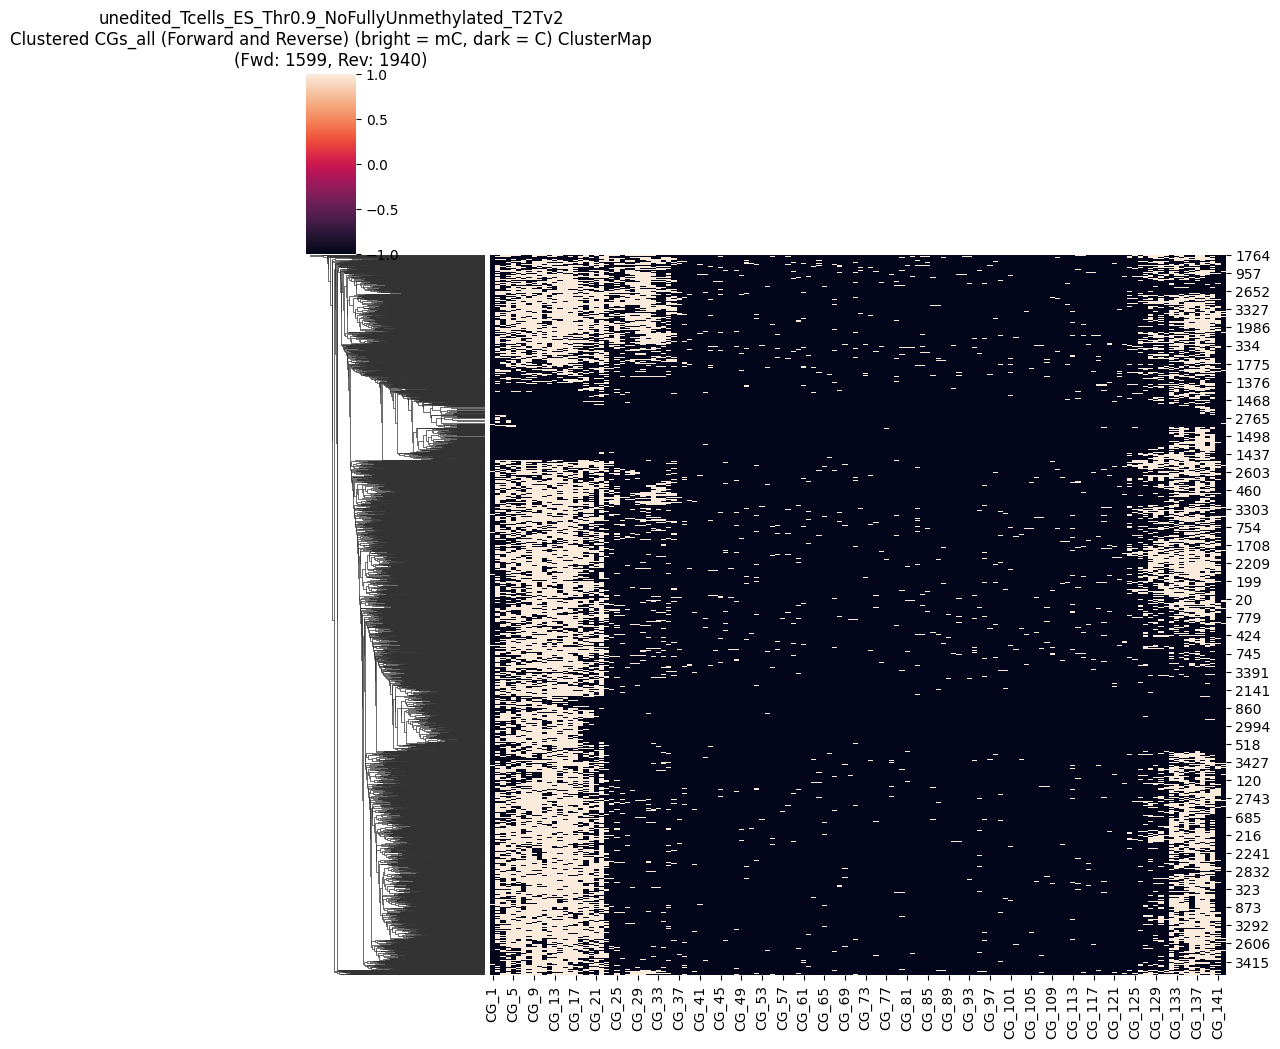

CGs_all saved as CG_142_units_combined_unedited_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD1599_numRVS1940_padded_reads_unedited_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [21]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### Results for ROI Extraction from Unedited T cells:
From around  reads located near the ROI, 

only  reads have non-zery mC

(with 90% confidance at least one methylated C  in the mC call) 

Forward reads:  

Reverse reads:   

# Analyze the Edited CRISPROff cells from the same T prime cells from Elaine ES

System: Linux
Release: 6.8.0-52-generic
Version: #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.9 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.…

          |    0%

          | Transferring 10199 from reads.CG,0.txt into reads.combined_basemods.h5, new size 10199   0% | 00:0…

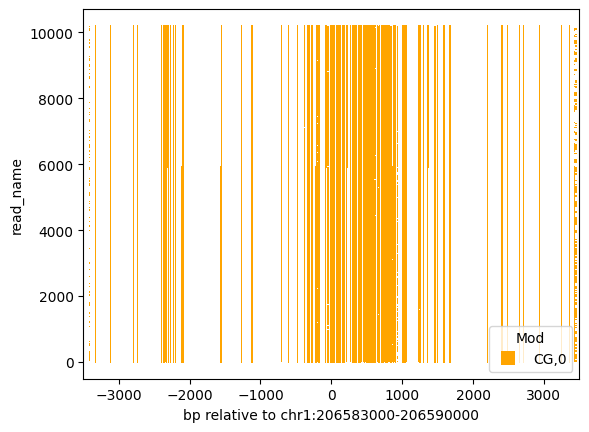

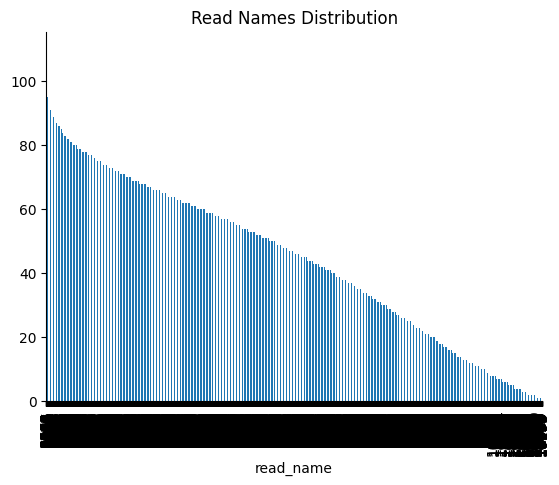

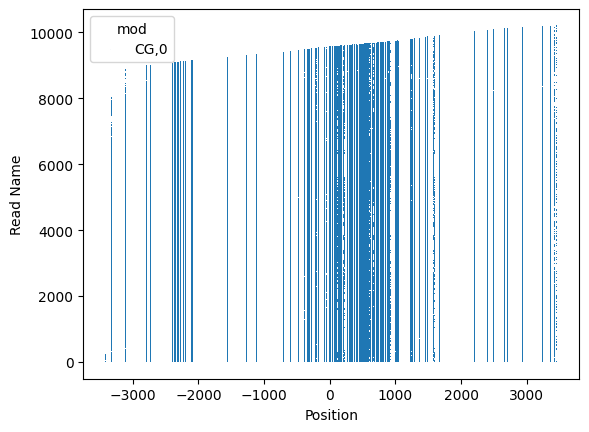

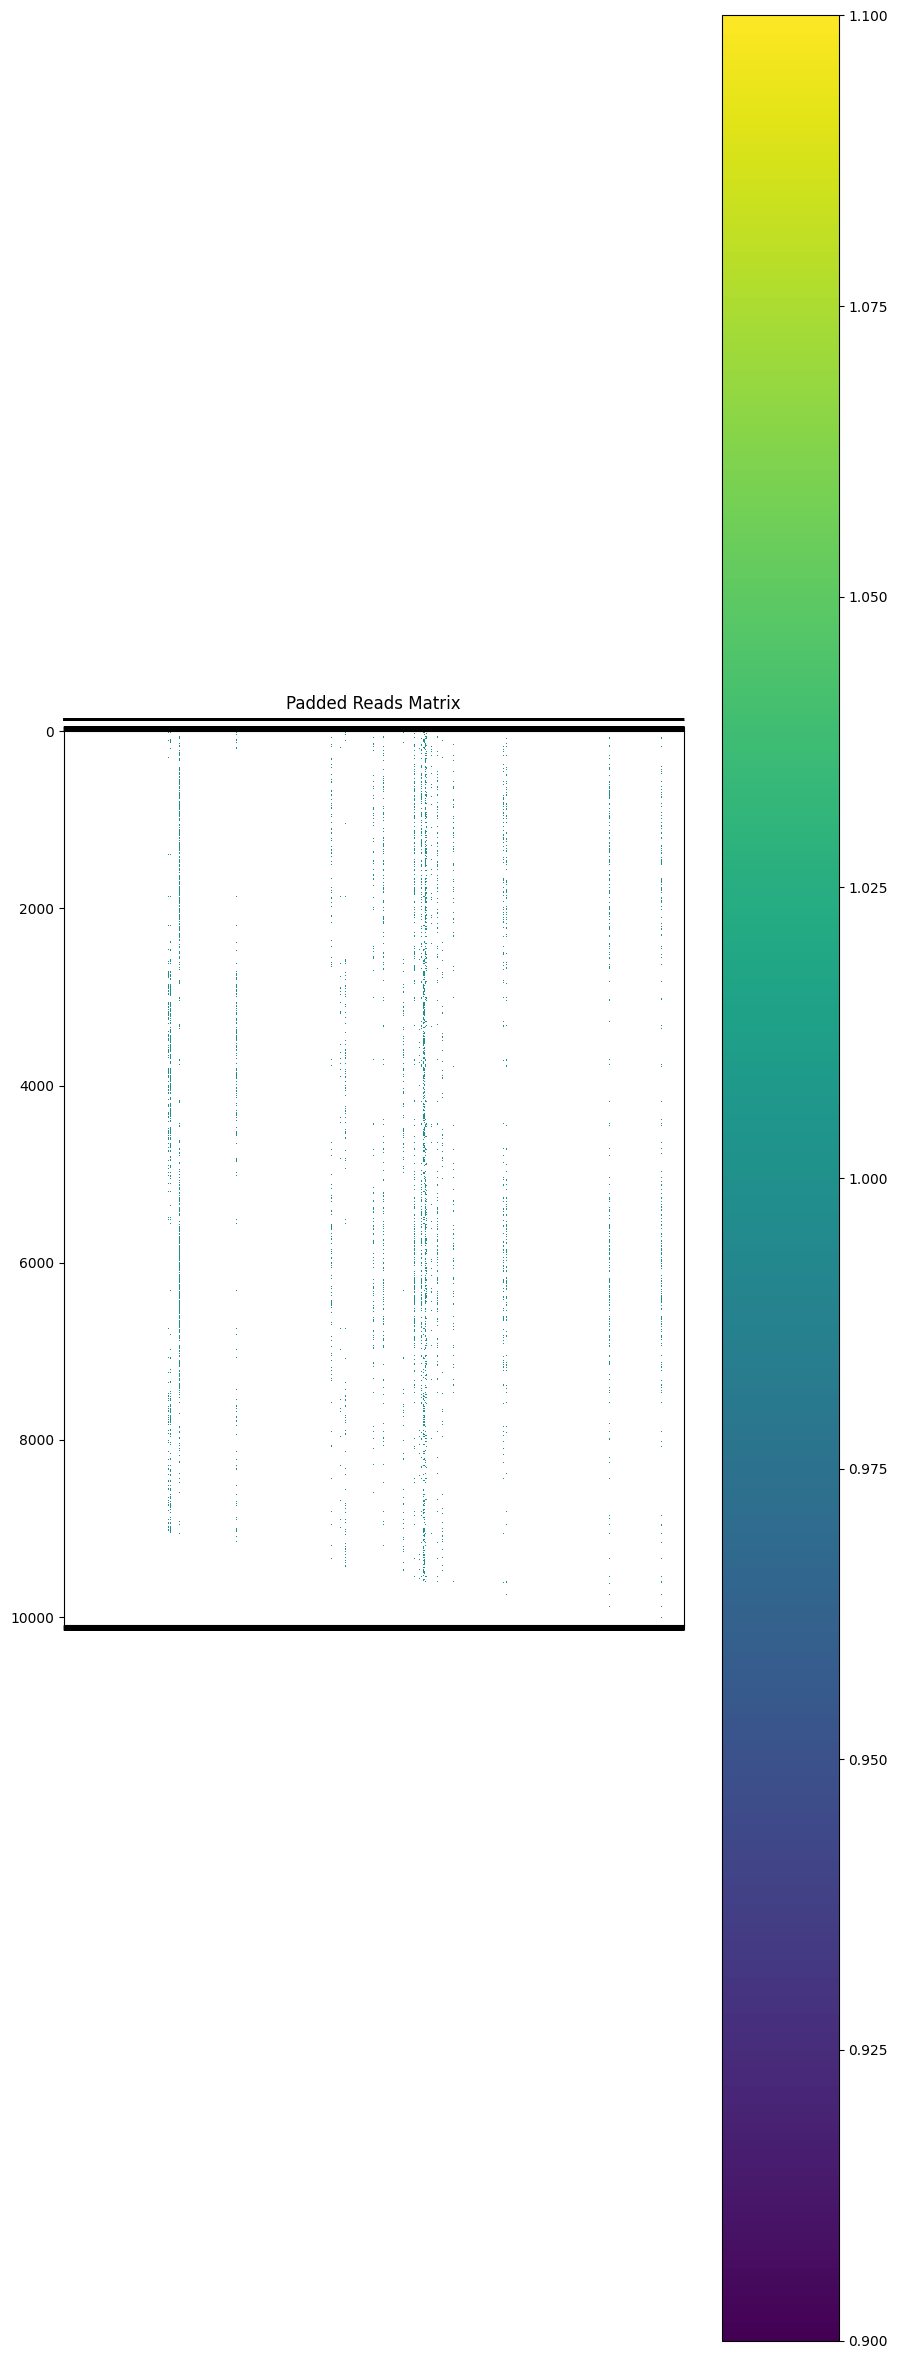

Padded reads saved to padded_reads_CROFF90prD6_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy


In [22]:
system_info()

experiment_name = "CROFF90prD6_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2" 
# threshold_mC = 0.9 # 0.75 # 0.99
bam_path ="/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# # 
# experiment_name = "K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_T2Tv2"
# # threshold_mC = 0.9 # 0.75 # 0.99
# bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# date_today = datetime.today().strftime('%Y-%m-%d')
# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# # region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
# print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

keep_unmethylated_reads = False
if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

In [23]:
save_padded_reads_name_np

'padded_reads_CROFF90prD6_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy'

Padded reads loaded successfully.


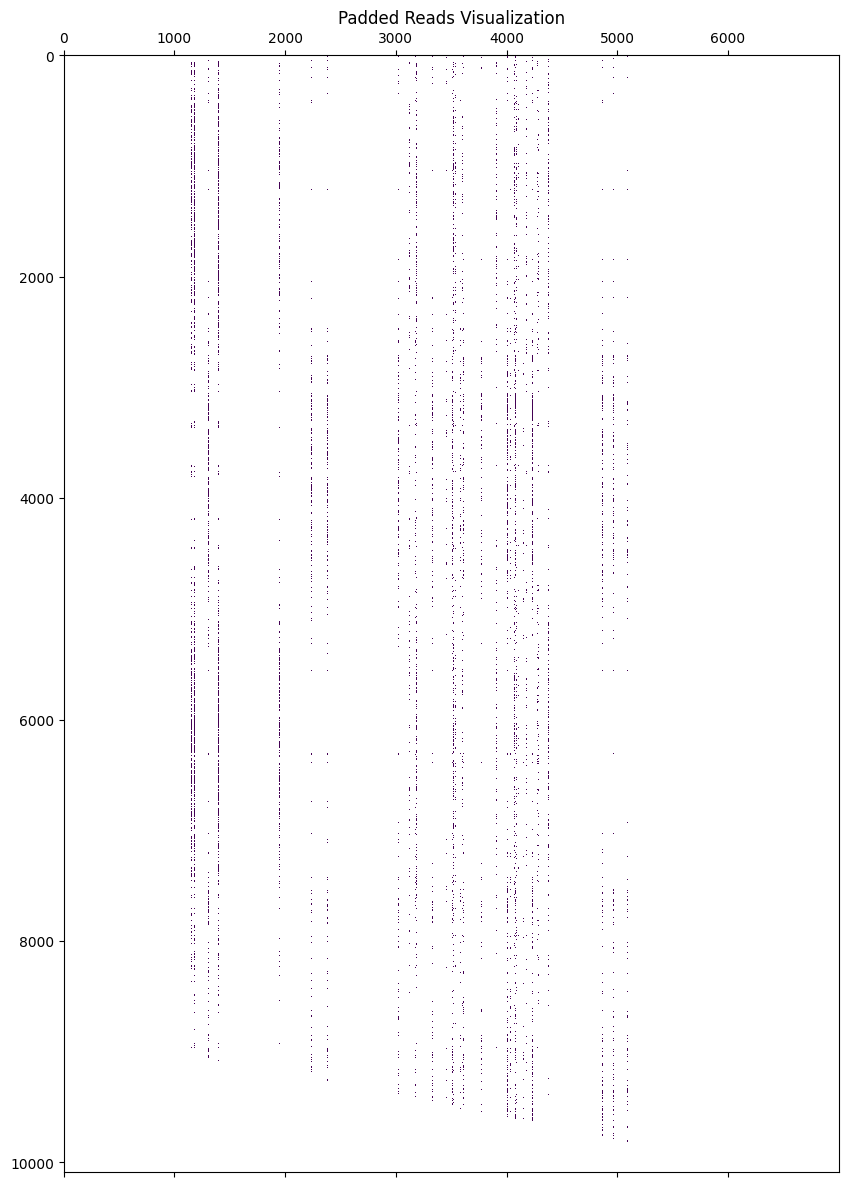

Visualization completed.
Region length: 7000
GCCATTGCCTCAATTCAGTTCTCCATACTCTCCCTAAACTAAACTCCTTACTATTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCATCTCTTTTCCTATTTTTGCCCTATTGCATTGACACTTGTCATATTTAGTTGAATCACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCCTTCTTTCCTTTCTGAAGCCCCATACCACTTTGGTTGTGATATTTGTATAGCATTTATCATGGAAAACCTCCCTACTAGATTGTAGATTCTCAAACACAAGTATTGACACTTAGTGGGTTTCTGTATACTAGGGAAGTTTATTAAACAGTCTTTGATTTAGTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATAT

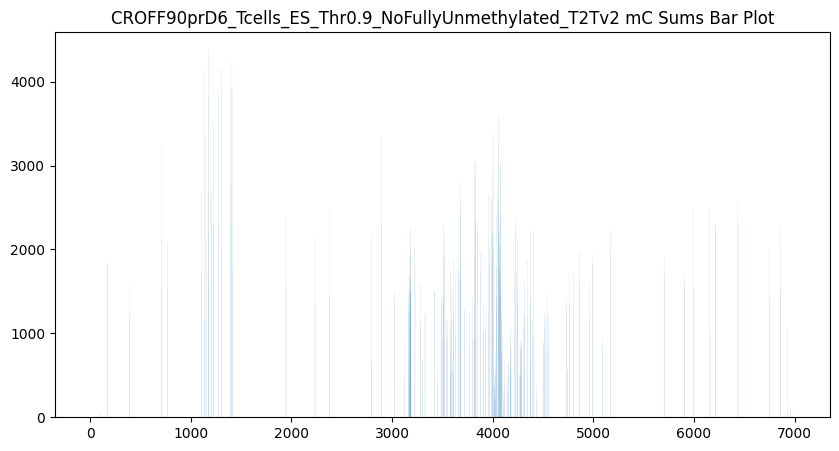

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


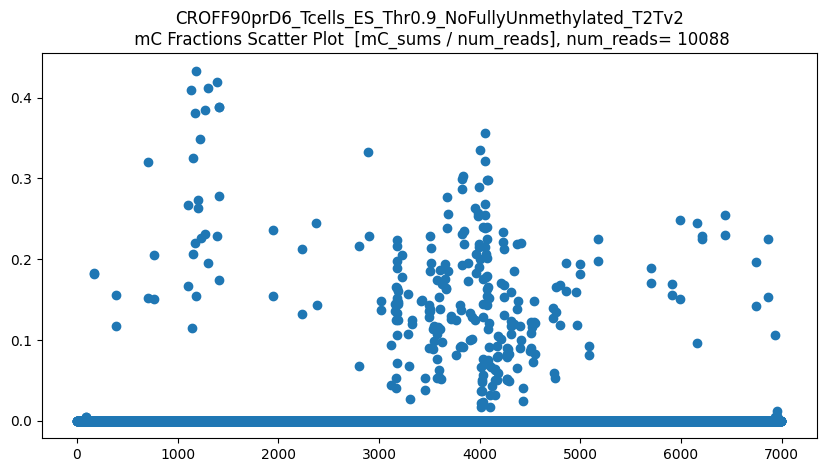

CGs_all_sums  = [  88. 3683. 2746. 4768. 3591. 4382. 5289. 5363. 6064. 5932. 5413. 5797.
 6215. 6126. 6530. 6727. 5669. 3938. 3477. 3914. 2862. 5664. 2874. 1392.
 2838. 1667. 2214. 2371. 2976. 3529. 3793. 3484. 3071. 2750. 3860. 2670.
  960. 2466. 3006.  920. 2666. 2351. 3255. 3677. 4120. 2043. 2181. 2531.
 1622. 2713. 1175. 3033. 1917. 2690. 3733. 3303. 5193. 4448. 2587. 2078.
 2362. 2311. 4960. 5224. 3984. 4579. 3712. 2361. 2327. 3909. 3924. 5143.
 4086. 5122. 5390.  835.  596.  844.  743. 1337. 2747. 4195. 5112. 5817.
 5772. 3867. 3842. 3922. 4443. 3978. 4677. 1906. 1926. 2447.  497. 1110.
  829. 1289. 1300. 1526. 1864. 2750. 4587. 3020. 3685. 1035. 1420. 1632.
 1734. 1321. 2262. 2854. 3075. 2047. 3705. 2088. 3228.  649. 1786. 2328.
 1900. 2724. 2047. 2694. 1130. 3028. 2893. 3582. 2804. 3792. 1751. 4263.
 3620. 3274. 4023. 3450. 4576. 4892. 3416. 3805. 1117.  181.]


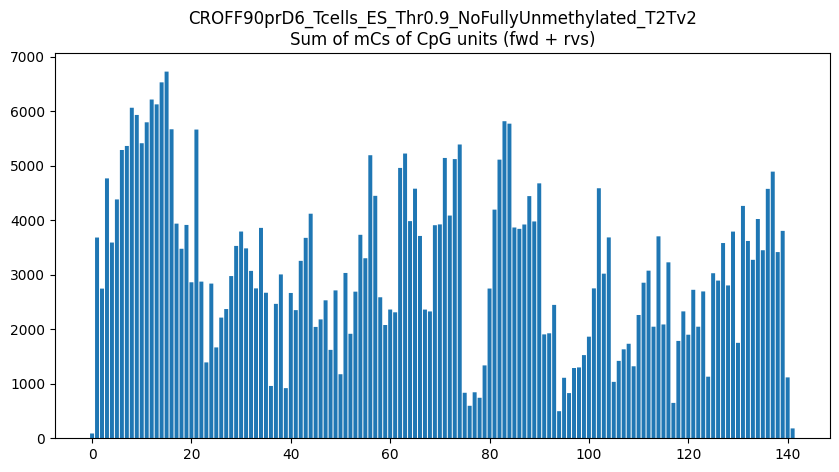

CGs_all_sums / len(CGs_all) = [0.00872324 0.36508723 0.2722046  0.47264076 0.35596749 0.43437748
 0.52428628 0.53162173 0.60111023 0.58802538 0.53657811 0.57464314
 0.61607851 0.60725615 0.64730373 0.66683188 0.5619548  0.39036479
 0.34466693 0.38798573 0.28370341 0.56145916 0.28489294 0.13798573
 0.28132435 0.16524584 0.21946868 0.23503172 0.29500397 0.34982157
 0.37599128 0.34536082 0.30442109 0.27260111 0.38263283 0.2646709
 0.09516257 0.24444885 0.2979778  0.09119746 0.26427439 0.23304917
 0.32266059 0.36449247 0.40840603 0.20251784 0.21619746 0.25089215
 0.16078509 0.26893339 0.11647502 0.30065424 0.19002776 0.26665345
 0.37004362 0.32741872 0.51477002 0.4409199  0.2564433  0.20598731
 0.23413957 0.22908406 0.49167328 0.51784298 0.39492466 0.45390563
 0.36796193 0.23404044 0.2306701  0.38749009 0.388977   0.50981364
 0.40503569 0.50773196 0.53429818 0.08277161 0.0590801  0.08366376
 0.07365186 0.1325337  0.27230373 0.4158406  0.50674068 0.57662569
 0.57216495 0.38332672 0.38084853

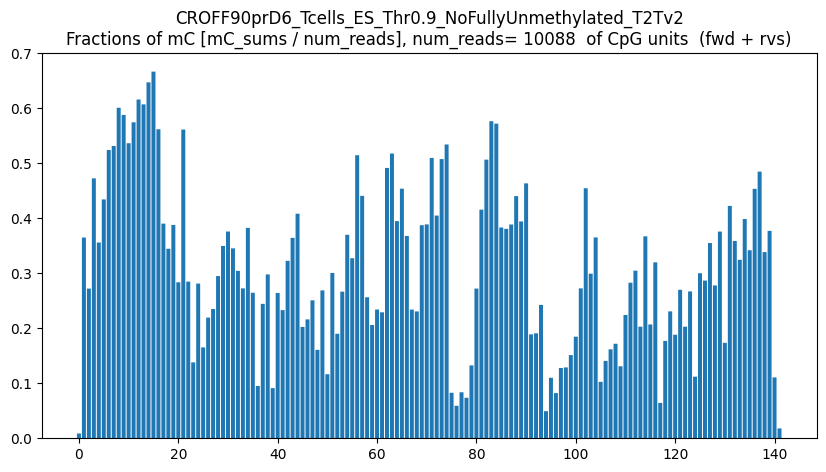

CGs_all_on_fwd_C_sums = [0. 0. 0. ... 0. 0. 0.]


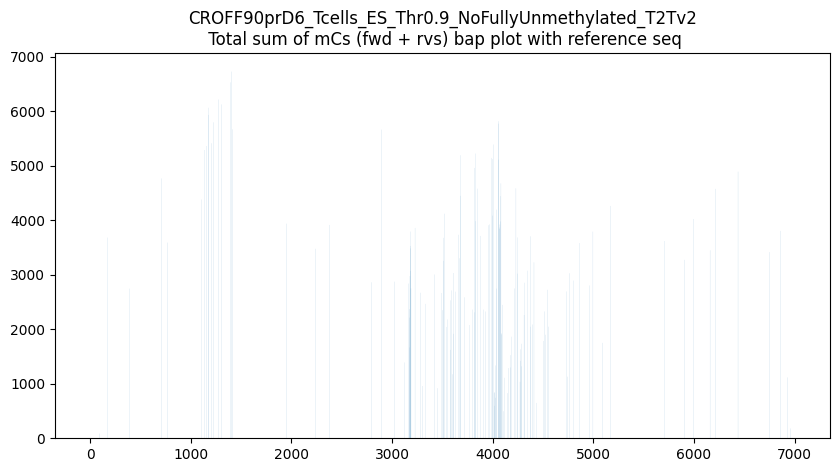

len(CGs_all) = 10088
CGs_all_on_fwd_C_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


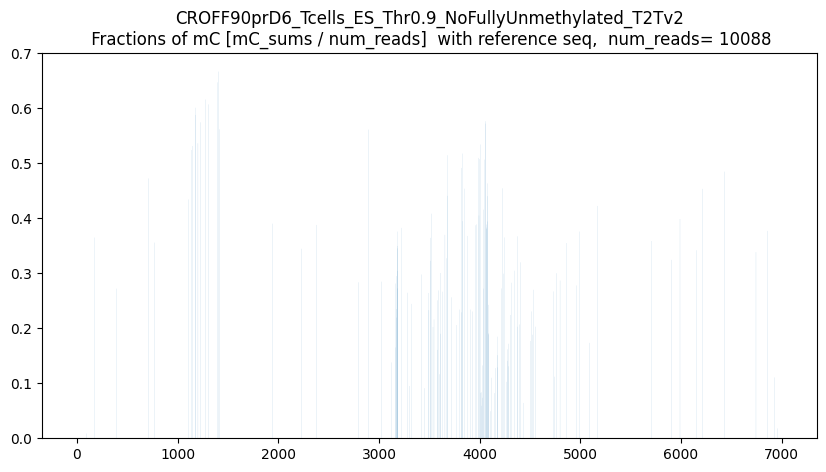

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



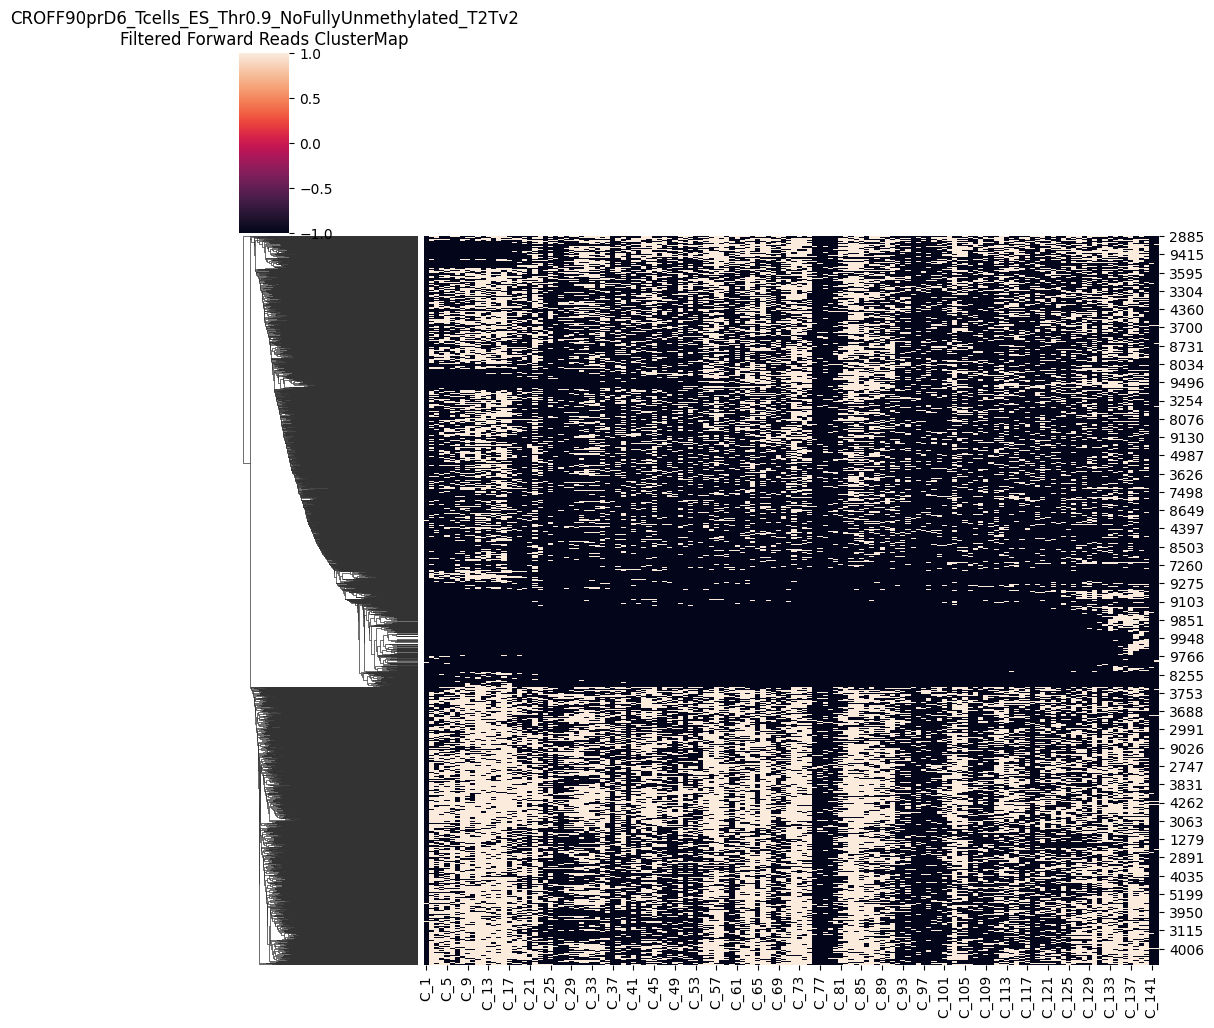

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



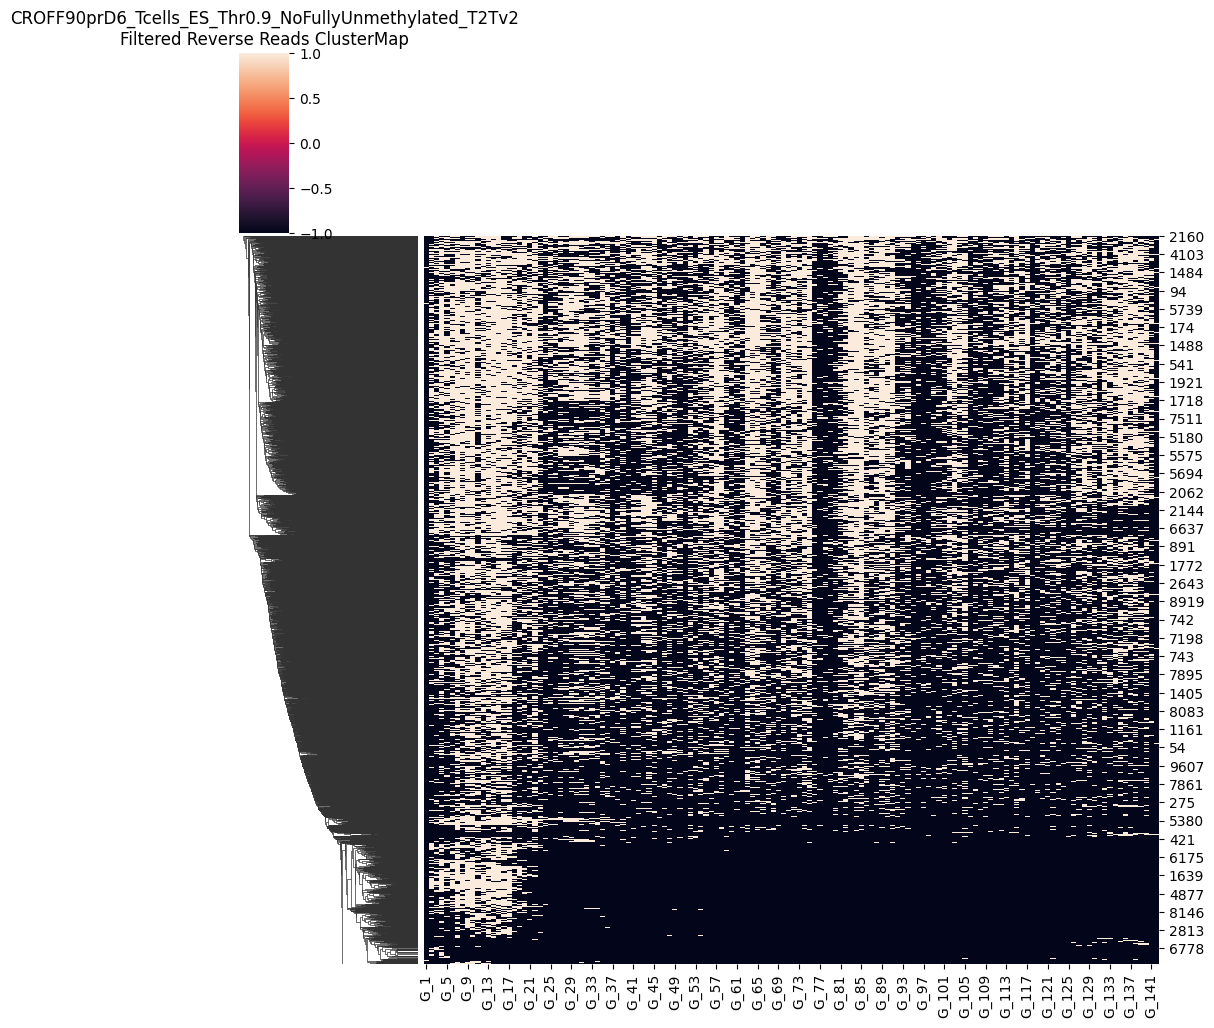

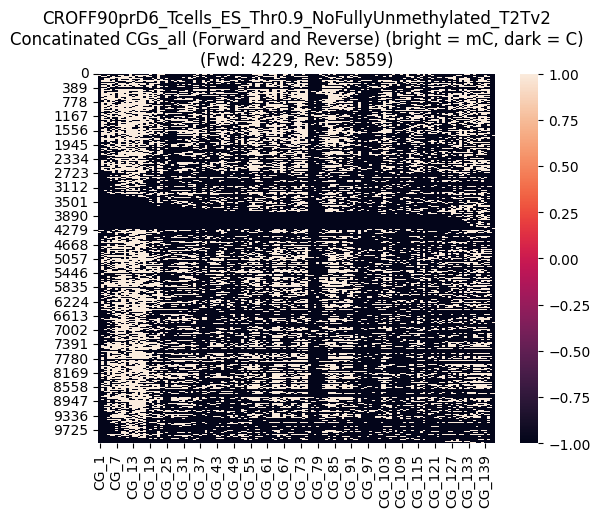

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



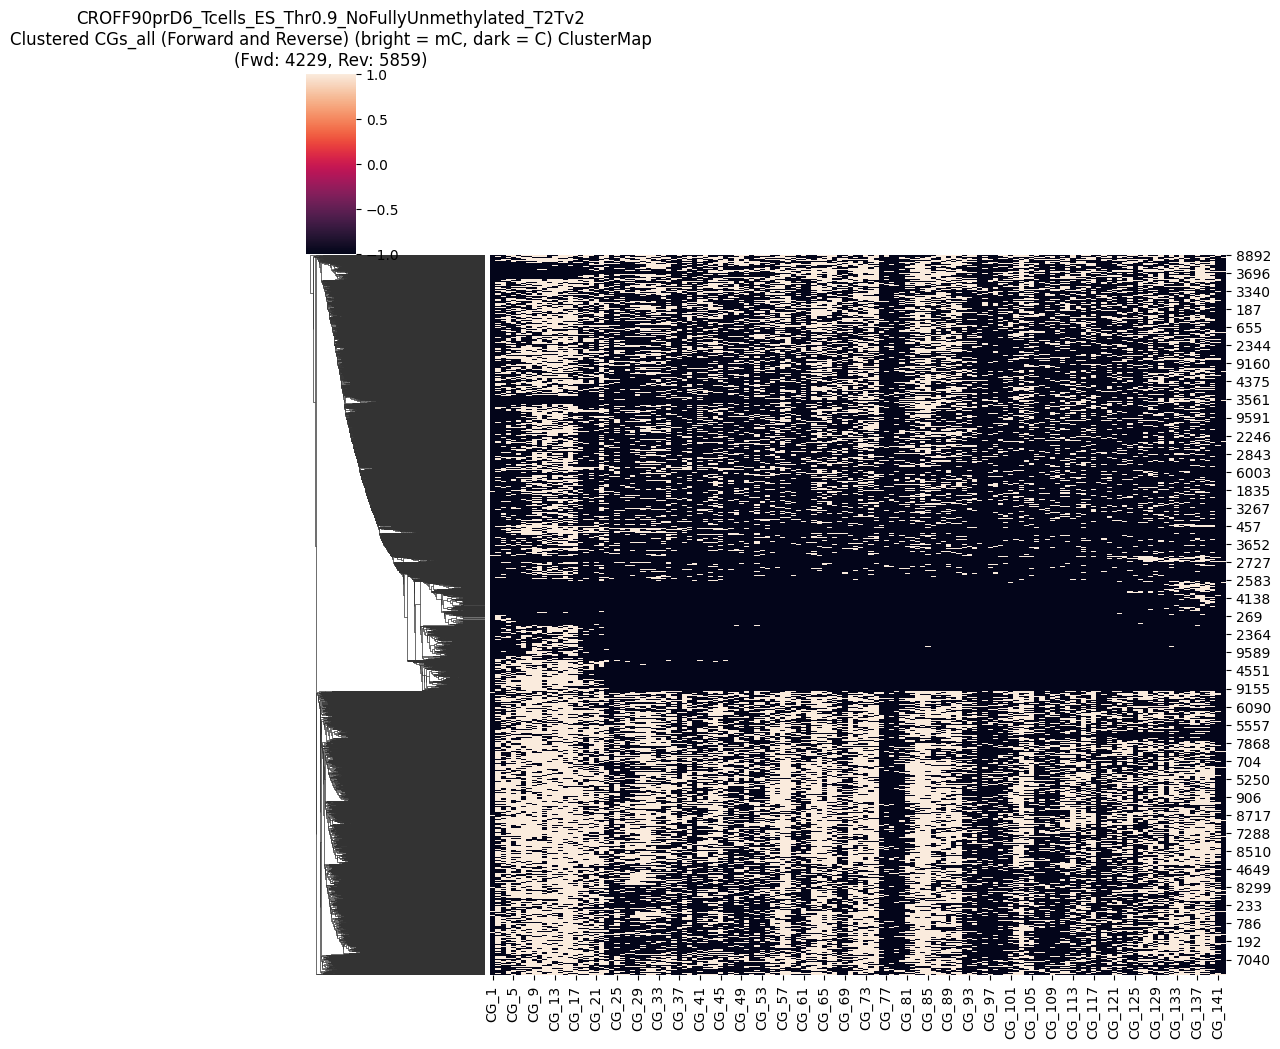

CGs_all saved as CG_142_units_combined_CROFF90prD6_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_numFWD4229_numRVS5859_padded_reads_CROFF90prD6_Tcells_ES_Thr0.9_NoFullyUnmethylated_T2Tv2_mCthresh0.9_t2t_v2_0_chr1:206583000-206590000_2025-03-18.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [24]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    # CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


Padded reads loaded successfully.


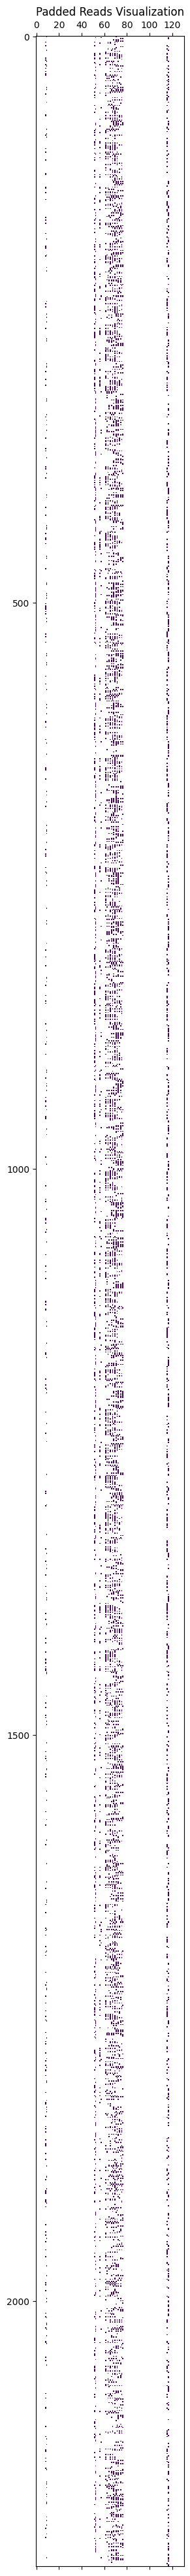

Visualization completed.
Region length: 131
CCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [8, 51, 56, 61, 63, 65, 67, 69, 71, 73, 75, 115]
Forward reads: 1234
Reverse reads: 1001
DataFrame shape: (2235, 131)
         C    C    A    T    T    C    A    G      C      G  ...    C    T  \
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  224.0  171.0  ...  0.0  0.0   
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    0.0    0.0  ...  NaN  NaN   
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   

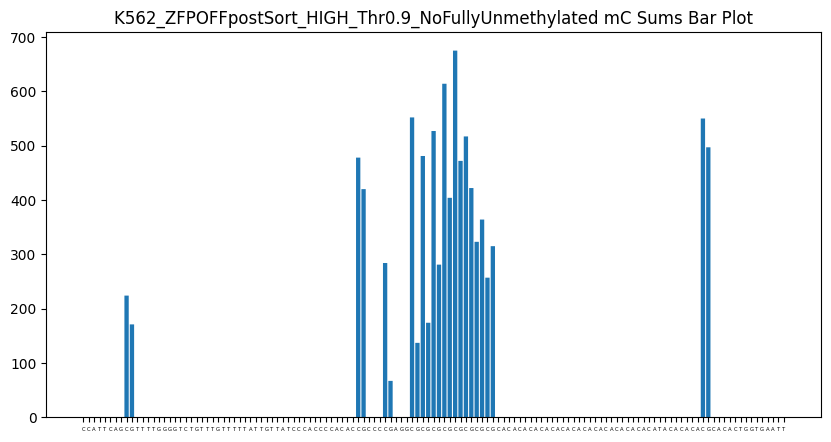

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.10022371 0.07651007 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.21387025 0.18791946 0.
 0.         0.         0.12706935 0.02997763 0.         0.
 0.         0.24697987 0.06129754 0.21521253 0.07785235 0.23579418
 0.12572707 0.27472036 0.18076063 0.30201342 0.21118568 0.23131991
 0.18881432 0.14451902 0.16286353 0.11498881 0.1409396  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.

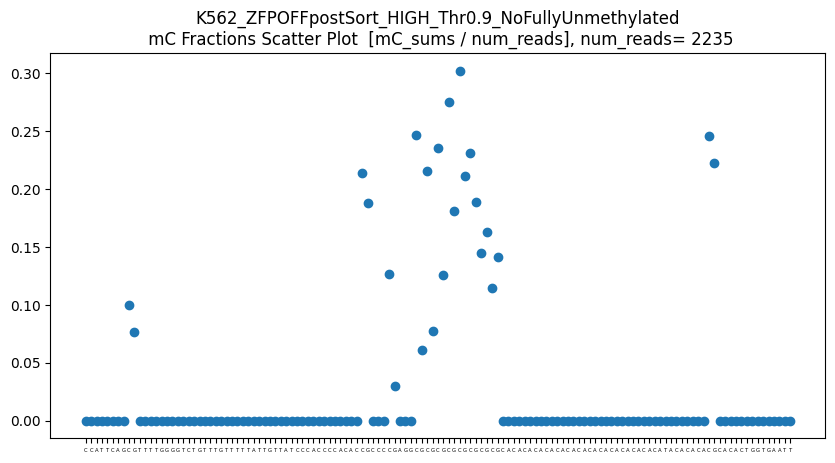

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums  = [ 395.  898.  351.  689.  655.  808. 1018. 1147.  939.  687.  572. 1047.]


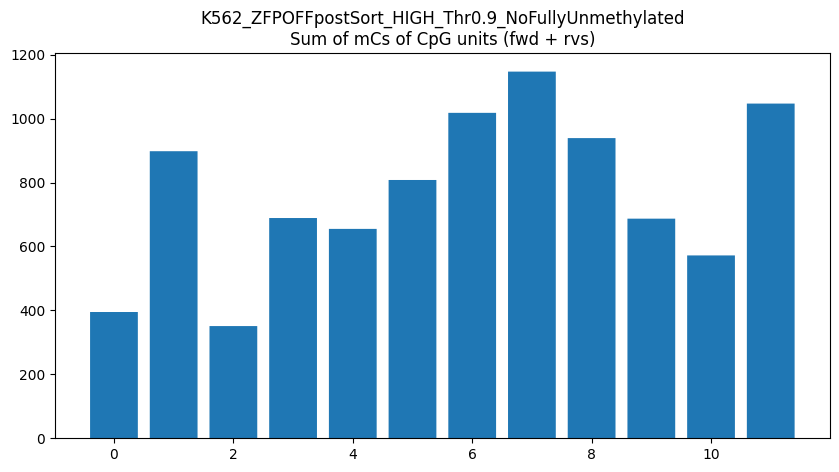

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums / len(CGs_all) = [0.17673378 0.40178971 0.15704698 0.3082774  0.29306488 0.36152125
 0.45548098 0.51319911 0.42013423 0.30738255 0.25592841 0.46845638]


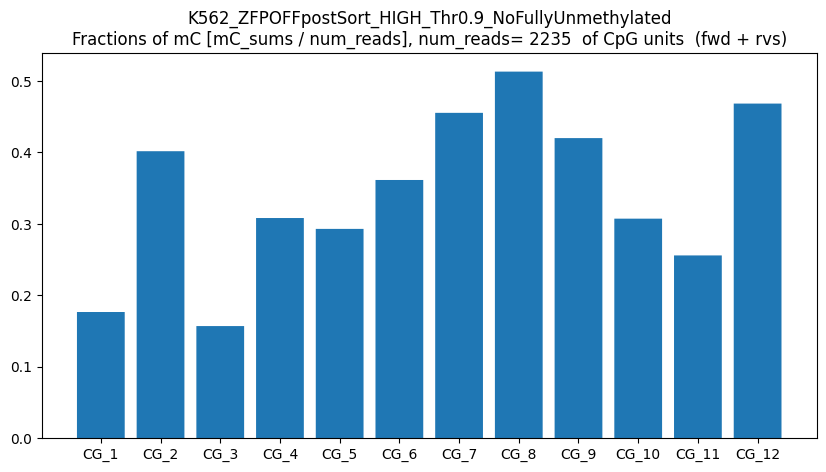

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_on_fwd_C_sums = [   0.    0.    0.    0.    0.    0.    0.    0.  395.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.  898.    0.    0.    0.    0.  351.    0.    0.    0.
    0.  689.    0.  655.    0.  808.    0. 1018.    0. 1147.    0.  939.
    0.  687.    0.  572.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0. 1047.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]


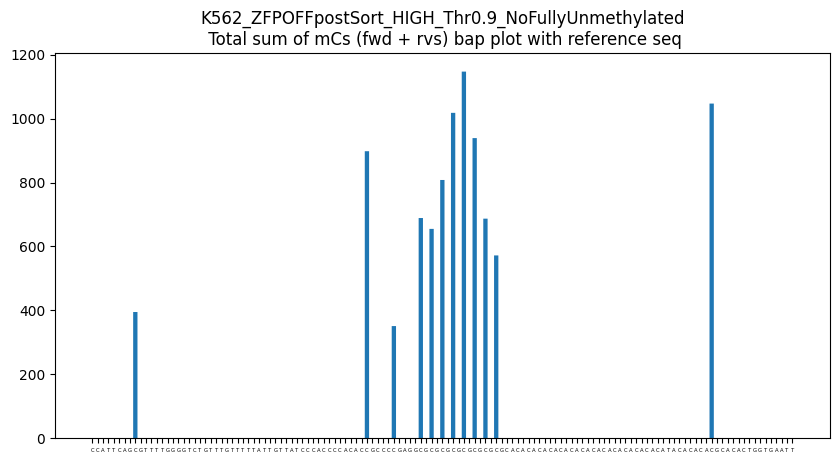

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


len(CGs_all) = 2235
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.17673378 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.40178971 0.         0.
 0.         0.         0.15704698 0.         0.         0.
 0.         0.3082774  0.         0.29306488 0.         0.36152125
 0.         0.45548098 0.         0.51319911 0.         0.42013423
 0.         0.30738255 0.         0.25592841 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

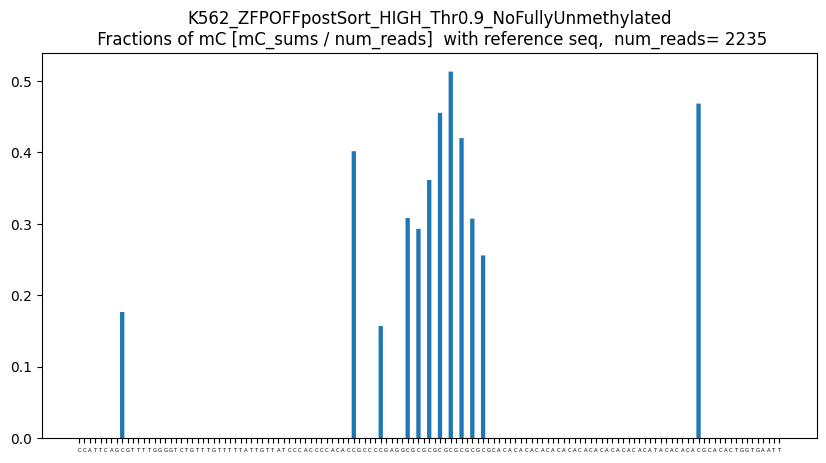

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



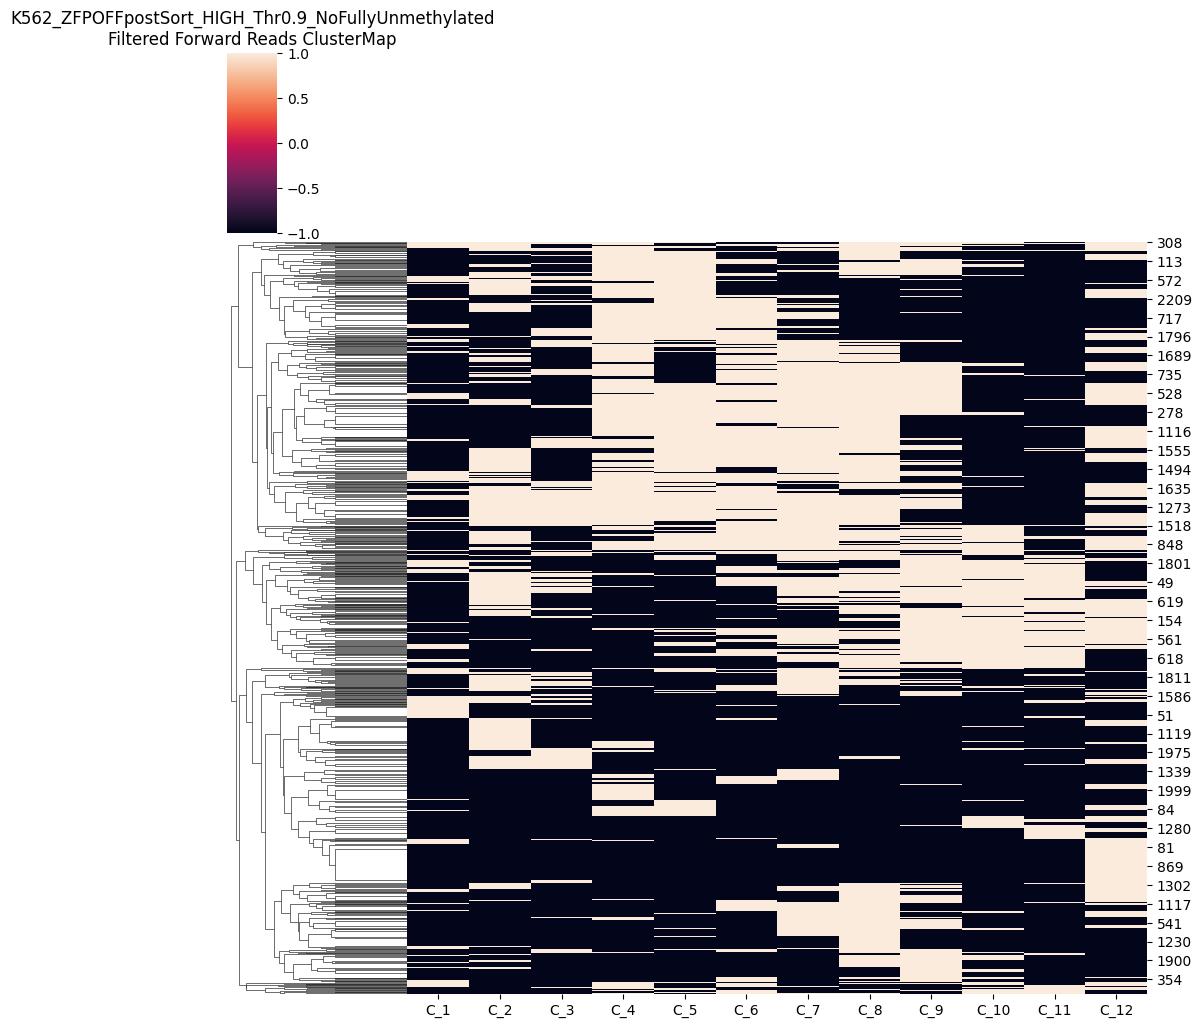

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



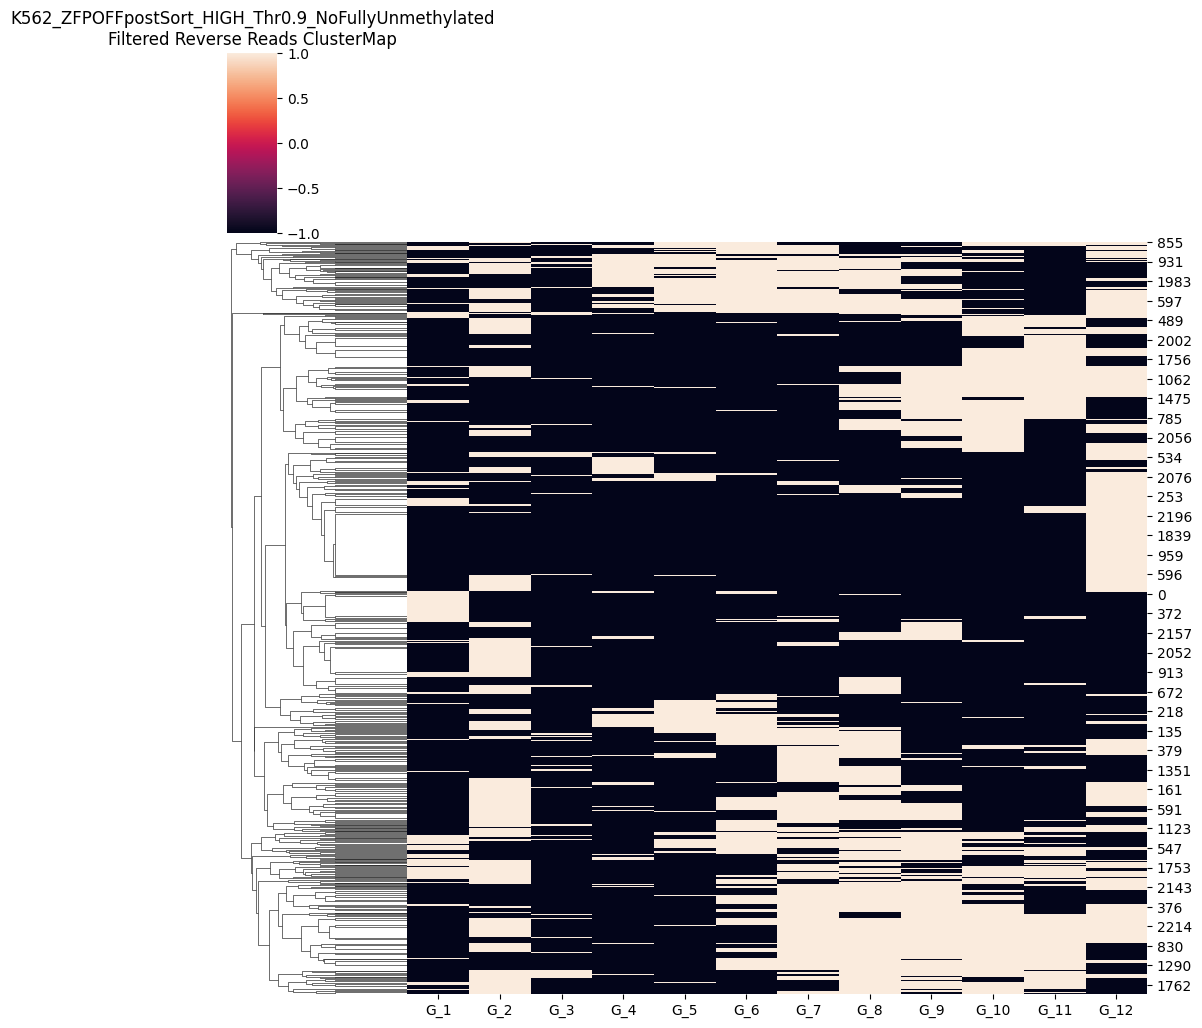

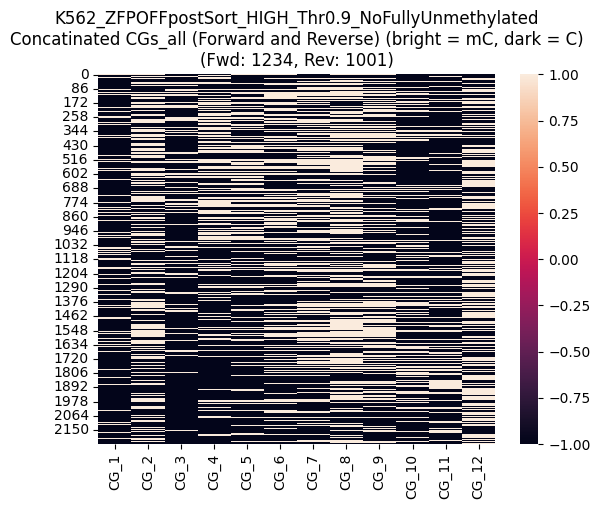

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



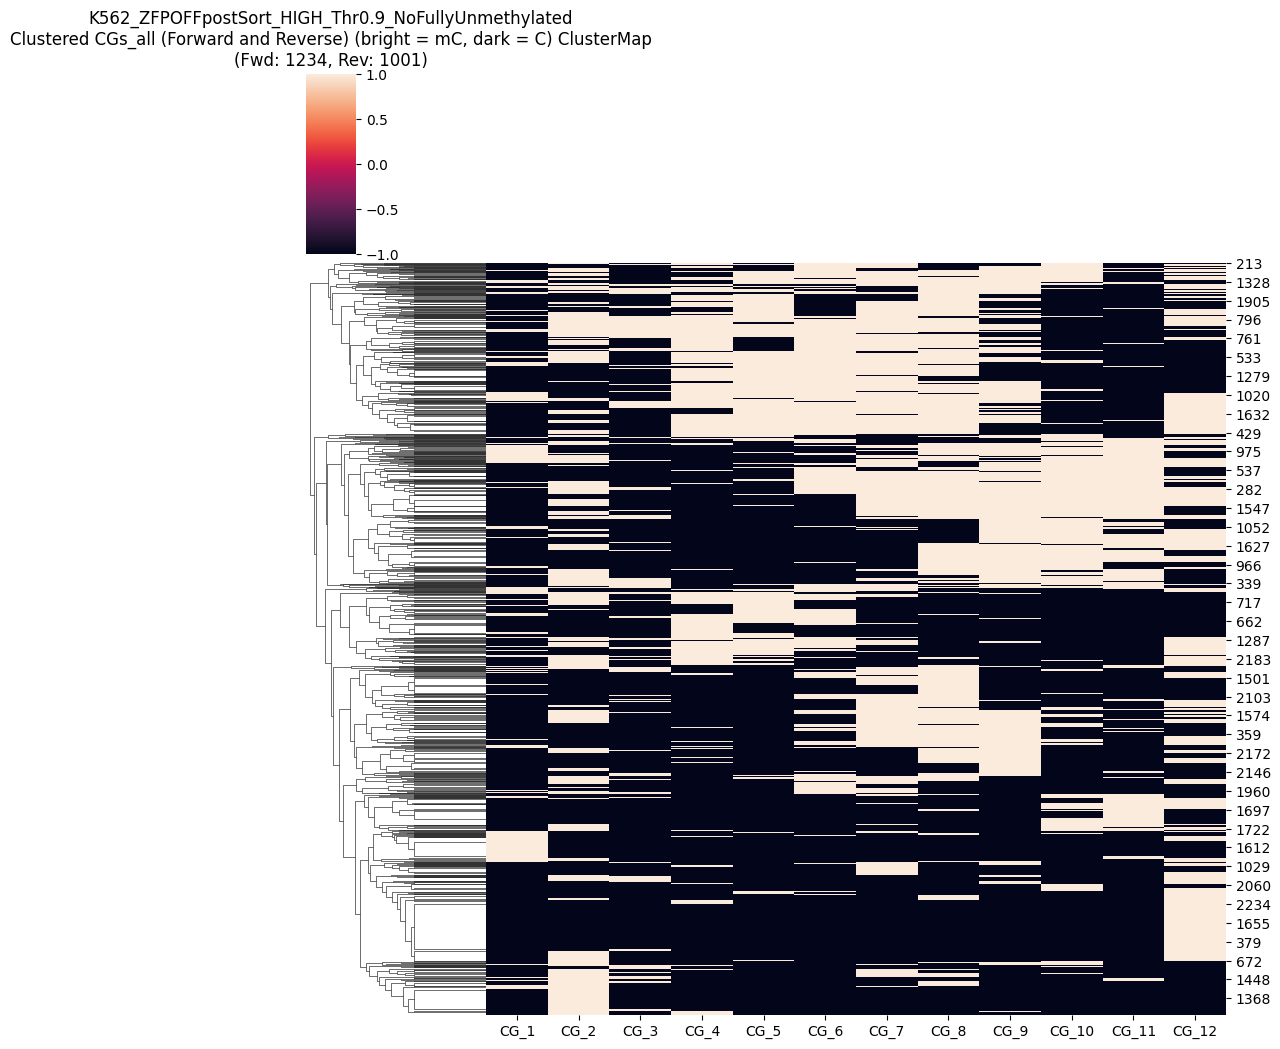

CGs_all saved as CG_12_units_combined_K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_numFWD1234_numRVS1001_padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [ ]:
# """
# Main pipeline for processing and visualizing CpG units on forward and reverse strands 
# """
# try:
#     # Define constants
#     # experiment_name = "unedited_T_primerES_nCATS"
#     # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
#     # save_padded_reads_name_np = "padded_reads.npy"
#     # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
#     # region_chr = "chr1"
#     # region_start = 206586162
#     # region_end = 206586192

#     # Process pipeline
#     CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced = analize_forward_reverse_CGs_pipeline(
#         experiment_name=experiment_name, save_folder_path=output_dir, 
#         save_padded_reads_name_np=save_padded_reads_name_np, 
#         ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
#     )

#     print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
#     # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

# except Exception as e:
#     print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### ROI Extraction Results from  Silence  cells from ES:
From around 7644 reads located near the ROI, 

 ~7097 reads have non-zery mC 
 
 (with 90% confidance in at least one methylated C the mC calls ) 


Forward reads:  

Reverse reads:  

~ 90% of those Day 6 CRISPROff cells are silenced according to Elaines Flow data

# #TODOs / Ideas
- look through each dataset
- try various confidence in mC thresholds [0.7 and 0.9 - done]
- try extanding to londer regions than my 30 bps [Done!]


In [25]:
# Calculate the genomic coordinates of the CGs
cg_coordinates = [(region_start + idx) for idx in CG_pair_idx]

# Print the genomic coordinates with CG order number
for order, (idx, coord) in enumerate(zip(CG_pair_idx, cg_coordinates), start=1):
    print(f"CG_{order} at index {idx} has genomic coordinate: {region_chr}:{coord}")

CG_1 at index 90 has genomic coordinate: chr1:206583090
CG_2 at index 174 has genomic coordinate: chr1:206583174
CG_3 at index 388 has genomic coordinate: chr1:206583388
CG_4 at index 708 has genomic coordinate: chr1:206583708
CG_5 at index 767 has genomic coordinate: chr1:206583767
CG_6 at index 1105 has genomic coordinate: chr1:206584105
CG_7 at index 1138 has genomic coordinate: chr1:206584138
CG_8 at index 1152 has genomic coordinate: chr1:206584152
CG_9 at index 1177 has genomic coordinate: chr1:206584177
CG_10 at index 1179 has genomic coordinate: chr1:206584179
CG_11 at index 1202 has genomic coordinate: chr1:206584202
CG_12 at index 1228 has genomic coordinate: chr1:206584228
CG_13 at index 1273 has genomic coordinate: chr1:206584273
CG_14 at index 1305 has genomic coordinate: chr1:206584305
CG_15 at index 1396 has genomic coordinate: chr1:206584396
CG_16 at index 1408 has genomic coordinate: chr1:206584408
CG_17 at index 1412 has genomic coordinate: chr1:206584412
CG_18 at ind

In [33]:
import pandas as pd

# Create a DataFrame with the CG index, position in the region, chromosome, and coordinate
CG_info_df = pd.DataFrame({
    'Position_in_region': CG_pair_idx,
    'Chromosome': [region_chr] * len(CG_pair_idx),
    'Coordinate': cg_coordinates
})
CG_info_df['CG_number'] = CG_info_df.index + 1

print(CG_info_df)

     Position_in_region Chromosome  Coordinate  CG_number
0                    90       chr1   206583090          1
1                   174       chr1   206583174          2
2                   388       chr1   206583388          3
3                   708       chr1   206583708          4
4                   767       chr1   206583767          5
..                  ...        ...         ...        ...
137                6437       chr1   206589437        138
138                6746       chr1   206589746        139
139                6862       chr1   206589862        140
140                6931       chr1   206589931        141
141                6956       chr1   206589956        142

[142 rows x 4 columns]


In [34]:
CG_info_df

Position_in_region Chromosome  Coordinate  CG_number
0                    90       chr1   206583090          1
1                   174       chr1   206583174          2
2                   388       chr1   206583388          3
3                   708       chr1   206583708          4
4                   767       chr1   206583767          5
..                  ...        ...         ...        ...
137                6437       chr1   206589437        138
138                6746       chr1   206589746        139
139                6862       chr1   206589862        140
140                6931       chr1   206589931        141
141                6956       chr1   206589956        142

[142 rows x 4 columns]

In [ ]:
print(cg_info_df)

In [26]:
# Calculate the genomic coordinates of the CGs
cg_coordinates = [(region_start + idx) for idx in CG_pair_idx]

# Print the genomic coordinates with CG order number
for order, (idx, coord) in enumerate(zip(CG_pair_idx, cg_coordinates), start=1):
    print(f"CG_{order} at index {idx} has genomic coordinate: {region_chr}:{coord}")

CG_1 at index 90 has genomic coordinate: chr1:206583090
CG_2 at index 174 has genomic coordinate: chr1:206583174
CG_3 at index 388 has genomic coordinate: chr1:206583388
CG_4 at index 708 has genomic coordinate: chr1:206583708
CG_5 at index 767 has genomic coordinate: chr1:206583767
CG_6 at index 1105 has genomic coordinate: chr1:206584105
CG_7 at index 1138 has genomic coordinate: chr1:206584138
CG_8 at index 1152 has genomic coordinate: chr1:206584152
CG_9 at index 1177 has genomic coordinate: chr1:206584177
CG_10 at index 1179 has genomic coordinate: chr1:206584179
CG_11 at index 1202 has genomic coordinate: chr1:206584202
CG_12 at index 1228 has genomic coordinate: chr1:206584228
CG_13 at index 1273 has genomic coordinate: chr1:206584273
CG_14 at index 1305 has genomic coordinate: chr1:206584305
CG_15 at index 1396 has genomic coordinate: chr1:206584396
CG_16 at index 1408 has genomic coordinate: chr1:206584408
CG_17 at index 1412 has genomic coordinate: chr1:206584412
CG_18 at ind